# Data Loading and visualization

In [5]:
CSV_path = 'ai4i2020.csv'

## Pre-Processing

In [3]:
def plot_data_bar(Y_train, Y_test):
  import matplotlib.pyplot as plt
  data = {'Non-Failure':'maroon', 'Failure':'red'}         
  labels = list(data.keys())
  handles = [plt.Rectangle((0,0),1,1, color=data[label]) for label in labels]
  values_train = list(Y_train.value_counts())
  values_test = list(Y_test.value_counts())

  plt.rcParams['figure.figsize'] = 8, 8

  # plot training and validation history
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.bar(labels, values_train, color = list(data.values()), width = 0.9)
  ax1.set_xlabel("Training data Machine Status")
  ax1.set_ylabel("No. of training samples")
  ax1.set_title("Training Data")

  ax2.bar(labels, values_test, color = list(data.values()), width = 0.9)
  ax2.set_xlabel("Test data Machine Status")
  ax2.set_ylabel("No. of test samples")
  ax2.set_title("Test Data")

  count_class_0, count_class_1 = Y_train.value_counts()
  ax1.legend(handles, values_train, loc='best')

  count_class_0, count_class_1 = Y_test.value_counts()
  ax2.legend(handles, values_test, loc='best')

  plt.tight_layout()
  return plt

In [4]:
import pandas as pd
import numpy as np

df_data = pd.read_csv(CSV_path)
df_data.sample(frac=0.0001, replace=True, random_state=1)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
235,236,M15095,M,298.1,308.3,1680,33.7,185,0,0,0,0,0,0


In [ ]:
df_data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [ ]:
df_data = df_data.iloc[:, 2:-1]
df_data.sample(frac=0.0001, replace=True, random_state=1)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF
235,M,298.1,308.3,1680,33.7,185,0,0,0,0,0


In [ ]:
df_data.iloc[:, -5:-4]

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df_data = df_data.reset_index(drop=True)

#One Hote Encoding for machine 'Type'
type_cols_scaled = pd.get_dummies(df_data['Type'])
type_cols_scaled.columns = ['High', 'Low', 'Medium']

#scaling
scaler = StandardScaler()
num_cols = df_data.iloc[:, 1:-5]
nums_cols = scaler.fit_transform(num_cols)
num_cols_scaled = pd.DataFrame(nums_cols)
num_cols_scaled.columns = df_data.columns[1:-5]

# concate them in a new dataframe

df_data_scaled = pd.concat([type_cols_scaled, num_cols_scaled, df_data.iloc[:, -5:-4]], axis = 1)

#df_data_scaled = df_data_scaled.iloc[:,:-4]

df_data_scaled.sample(frac=0.0001, replace=True, random_state=1)

,High,Low,Medium,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
235,0,0,1,-0.952389,-1.149563,0.78775,-0.630682,1.210492,0


In [ ]:
df_data_scaled.shape

(10000, 9)

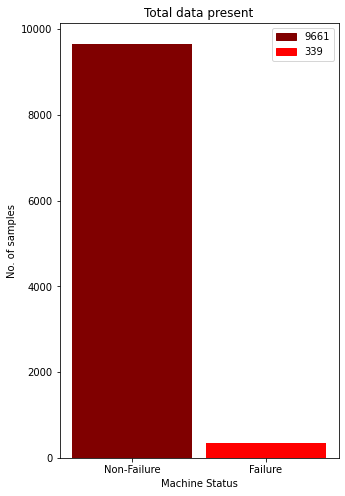

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


#Extracting all the input and output data

x_all = df_data_scaled.iloc[:,:-1]
y_all = df_data_scaled['Machine failure']

data = {'Non-Failure':'maroon', 'Failure':'red'}         
labels = list(data.keys())
handles = [plt.Rectangle((0,0),1,1, color=data[label]) for label in labels]
values = list(y_all.value_counts())

fig = plt.figure(figsize = (5, 8))
 
# creating the bar plot
plt.bar(labels, values, color = list(data.values()), width = 0.9)

plt.xlabel("Machine Status")
plt.ylabel("No. of samples")
plt.legend(handles, values)
plt.title("Total data present")
plt.show()

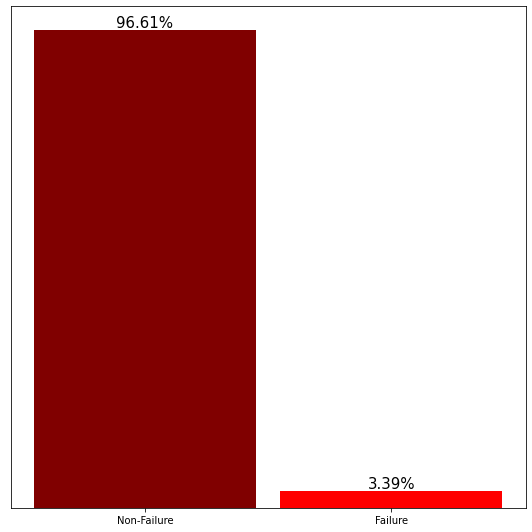

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


#Extracting all the input and output data

x_all = df_data_scaled.iloc[:,:-1]
y_all = df_data_scaled['Machine failure']

data = {'Non-Failure':'maroon', 'Failure':'red'}         
labels = list(data.keys())
handles = [plt.Rectangle((0,0),1,1, color=data[label]) for label in labels]
values = list(y_all.value_counts())

plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

width = 0.35
fig, ax = plt.subplots()

pps = ax.bar(labels, values, color = list(data.values()), width = 0.9)

for p in pps:
   height = p.get_height()
   plt.annotate( "{}%".format(height/100),(p.get_x() + p.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

ax.yaxis.set_visible(False)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data in training and validation dataset
X_train, X_test, Y_train, Y_test = train_test_split(x_all,y_all, train_size=0.8, random_state=15, stratify=y_all)

In [ ]:
Y_test.value_counts()

0    1932
1      68
Name: Machine failure, dtype: int64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

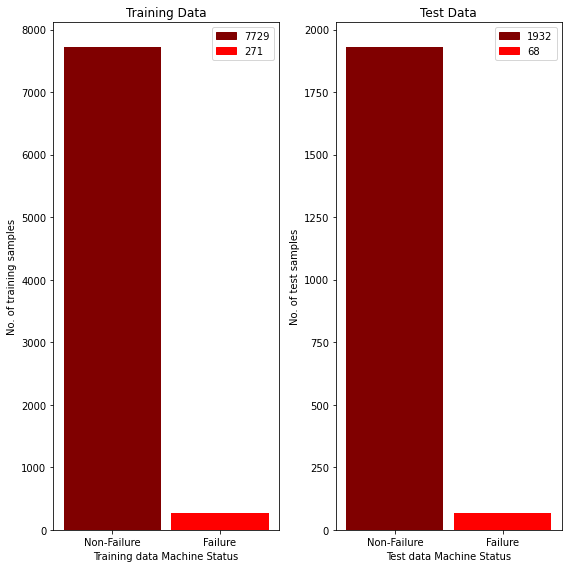

In [ ]:
plot_data_bar(Y_train, Y_test)

## Visualizing the imbalanced data

In [ ]:
count_class_0, count_class_1 = y_all.value_counts()

df_class_0 = df_data_scaled[df_data_scaled['Machine failure'] == 0]
df_class_1 = df_data_scaled[df_data_scaled['Machine failure'] == 1]

In [ ]:
initial_bias = np.log([count_class_1/count_class_0])
initial_bias

array([-3.34985233])

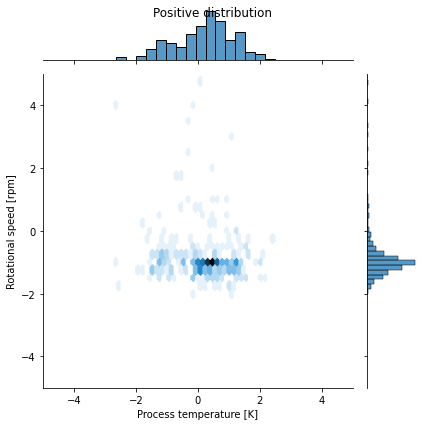

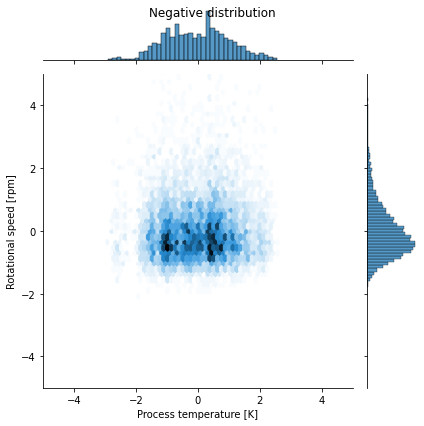

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x=df_class_1['Process temperature [K]'], y=df_class_1['Rotational speed [rpm]'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=df_class_0['Process temperature [K]'], y=df_class_0['Rotational speed [rpm]'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

## Under Sampling

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data in training and validation dataset
X_train, X_test, Y_train, Y_test = train_test_split(x_all,y_all, train_size=0.8, random_state=13, stratify=y_all)

#Checking data balance

count_class_0, count_class_1 = Y_train.value_counts()
count_class_0, count_class_1

(7729, 271)

In [ ]:
#Undersampling to provide balanced training data

train_data = pd.concat([X_train, Y_train], axis=1)

df_class_0 = train_data[train_data['Machine failure'] == 0]
df_class_1 = train_data[train_data['Machine failure'] == 1]

df_class_0 = df_class_0.sample(count_class_1)

print(df_class_0.shape)
print(df_class_1.shape)

df_data_under = pd.concat([df_class_0, df_class_1])

print(df_data_under.shape)

df_data_under.sample(frac=0.01, replace=True, random_state=1)

(271, 9)
(271, 9)
(542, 9)


,High,Low,Medium,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
6988,0,1,0,0.347507,0.737662,-0.339010,0.683466,0.896279,0
2087,0,1,0,-0.252445,-0.475554,0.213214,-0.339763,-1.476034,0
9702,0,1,0,-0.552421,-0.003747,0.525583,-0.881473,-0.501972,0
7032,0,1,0,0.347507,0.602860,1.027604,-0.901537,-0.549104,0
7711,0,1,0,0.197519,0.939865,-1.281695,1.556221,-0.580525,0


In [ ]:
#Extracting Undersampled Data

X_train = df_data_under.iloc[:,:-1]
Y_train = df_data_under['Machine failure']

print(X_train.shape)
print(Y_train.shape)
print(Y_train.value_counts())

(542, 8)
(542,)
0    271
1    271
Name: Machine failure, dtype: int64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

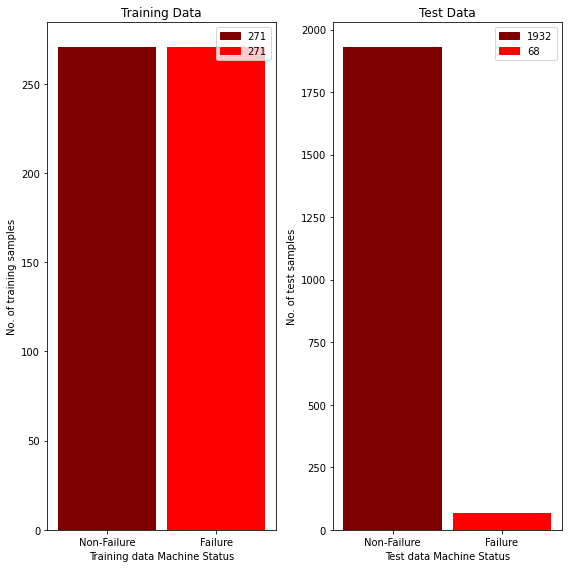

In [ ]:
plot_data_bar(Y_train, Y_test)

## Over Sampling

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data in training and validation dataset
X_train, X_test, Y_train, Y_test = train_test_split(x_all,y_all, train_size=0.8, random_state=13, stratify=y_all)

#Checking data balance

count_class_0, count_class_1 = Y_train.value_counts()
count_class_0, count_class_1

(7729, 271)

In [ ]:
#Oversampling to provide balanced training data

train_data = pd.concat([X_train, Y_train], axis=1)

df_class_0 = train_data[train_data['Machine failure'] == 0]
df_class_1 = train_data[train_data['Machine failure'] == 1]

df_class_1 = df_class_1.sample(count_class_0, replace = True)

print(df_class_0.shape)
print(df_class_1.shape)

df_data_over = pd.concat([df_class_0, df_class_1])

print(df_data_over.shape)

(7729, 9)
(7729, 9)
(15458, 9)


In [ ]:
#Extracting Oversampled Data

X_train = df_data_over.iloc[:,:-1]
Y_train = df_data_over['Machine failure']

#y_over = y_over.values.reshape(len(y_over), 1)

print(X_train.shape)
print(Y_train.shape)
print(Y_train.value_counts())

(15458, 8)
(15458,)
0    7729
1    7729
Name: Machine failure, dtype: int64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

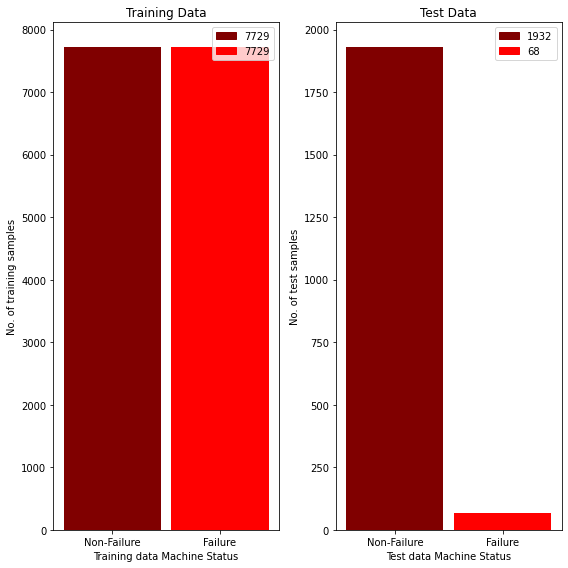

In [ ]:
plot_data_bar(Y_train, Y_test)

## GAN

### GAN Model Defintion

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_68 (Dense)            (None, 1024)              9216      
                                                                 
 dropout_14 (Dropout)        (None, 1024)              0         
                                                                 
 dense_69 (Dense)            (None, 512)               524800    
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_70 (Dense)            (None, 512)               262656    
                                                                 
 dense_71 (Dense)            (None, 1)                 513

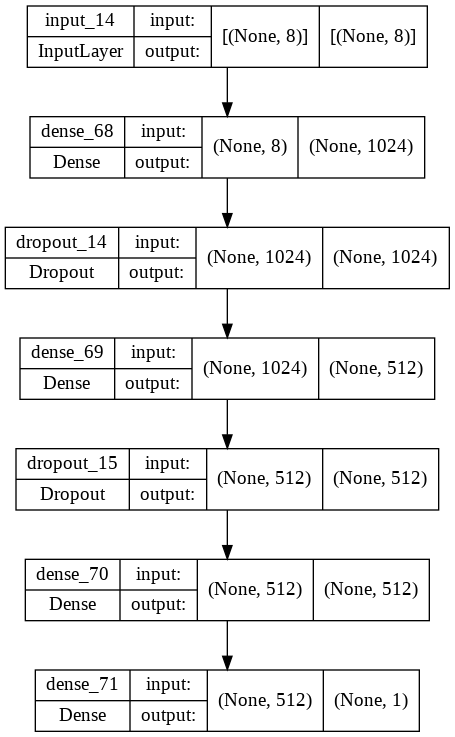

In [ ]:
from tensorflow.keras.datasets import mnist
import visualkeras
from collections import defaultdict
from PIL import ImageFont
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, LeakyReLU, Reshape, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils

def discriminator_dense():
    inp = Input(shape=8)
    
    #x = Flatten()(inp)
    #x = Dropout(0.4)(x)
    x = Dense(1024, activation=LeakyReLU(alpha=0.2))(inp)
    x = Dropout(0.4)(x)
    x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.4)(x)
    x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
    
    op = Dense(1, activation="sigmoid")(x)
    
    model = Model(inp, op)
    model.compile(
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5),
    loss="binary_crossentropy")
    
    return model
  
discrim  = discriminator_dense()
discrim .summary()

utils.plot_model(discrim , show_shapes=True, to_file="model_discriminator.png")

#font = ImageFont.load_default()
#visualkeras.layered_view(discrim, legend=True, font=font)

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_78 (Dense)            (None, 256)               25856     
                                                                 
 dense_79 (Dense)            (None, 512)               131584    
                                                                 
 dense_80 (Dense)            (None, 1024)              525312    
                                                                 
 dense_81 (Dense)            (None, 256)               262400    
                                                                 
 dense_82 (Dense)            (None, 64)                16448     
                                                                 
 dense_83 (Dense)            (None, 8)                 520

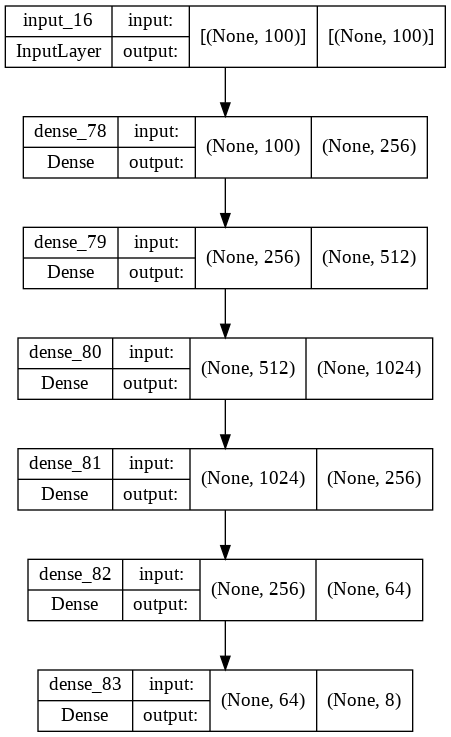

In [ ]:
def generator(n):
    inp = Input(shape=(n))
    
    x = Dense(256, activation=LeakyReLU(alpha=0.2))(inp)
    x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
    x = Dense(1024, activation=LeakyReLU(alpha=0.2))(x)
    x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
    x = Dense(64, activation=LeakyReLU(alpha=0.2))(x)
    #x = Dense(8, activation='tanh')(x)
    op = Dense(8, activation='tanh')(x)
    
    #op = Reshape((8, 1))(x)
    
    return Model(inp, op)

gener = generator(100)
gener.summary()

utils.plot_model(gener, show_shapes=True, to_file="model_generator.png")

#font = ImageFont.load_default()
#visualkeras.layered_view(gener, legend=True, font=font)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_15 (Functional)       (None, 8)                 962120    
                                                                 
 model_13 (Functional)       (None, 1)                 797185    
                                                                 
Total params: 1,759,305
Trainable params: 962,120
Non-trainable params: 797,185
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


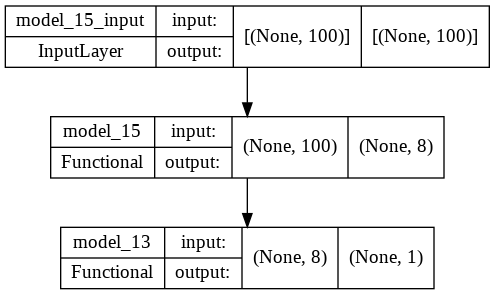

In [ ]:
def gan(discrim, gener):
    discrim.trainable = False
    
    model = Sequential()
    
    model.add(gener)
    model.add(discrim)
    
    model.compile(
    optimizer=Adam(lr=0.0002, beta_1=0.5),
    loss="binary_crossentropy")
    
    return model

gan_model = gan(discrim, gener)
gan_model .summary()

utils.plot_model(gan_model , show_shapes=True, to_file="model_discriminator.png")

### GAN Model Training

In [ ]:
df_class_0 = df_data_scaled[df_data_scaled['Machine failure'] == 0]
df_class_1 = df_data_scaled[df_data_scaled['Machine failure'] == 1]

df_class_1.shape

(339, 9)

In [ ]:
from tqdm import tqdm

df_class1 = df_class_1.iloc[:,:-1].to_numpy()
epochs = 3000
batch_size = 32
half_batch = batch_size//2
n = 100
losses = []
data_len = len(df_class1)

In [ ]:
import time
start = time.time()
for i in range(epochs):
    print("Epoch: ", i)
    for j in tqdm(range(data_len//batch_size)):
        #xreal, yreal = df_class1[np.random.randint(0, data_len, half_batch)].reshape(half_batch, 8 ,1), np.ones(half_batch).reshape(half_batch, 1)
        xreal, yreal = df_class1[np.random.randint(0, data_len, half_batch)].reshape(half_batch, 8), np.ones(half_batch).reshape(half_batch, 1)

        xfake, yfake = gener.predict(np.random.randn(half_batch, n)), np.zeros(half_batch).reshape(half_batch, 1)
        
        xfinal, yfinal = np.vstack((xreal, xfake)), np.vstack((yreal, yfake))
        
        dloss = discrim.train_on_batch(xfinal, yfinal)
        
        gloss = gan_model.train_on_batch(np.random.randn(batch_size, n), np.ones(batch_size).reshape(batch_size, 1))
        
        losses.append([dloss, gloss])
    
    print("losess --> ", dloss, "  ", gloss)
end = time.time()
print('Time taken: ', end-start)

Epoch:  0


100%|██████████| 10/10 [00:01<00:00,  5.15it/s]


losess -->  0.6203123927116394    0.6133962273597717
Epoch:  1


100%|██████████| 10/10 [00:00<00:00, 14.94it/s]


losess -->  0.5655913949012756    0.8854902982711792
Epoch:  2


100%|██████████| 10/10 [00:00<00:00, 15.22it/s]


losess -->  0.3929036259651184    1.3820327520370483
Epoch:  3


100%|██████████| 10/10 [00:00<00:00, 15.06it/s]


losess -->  0.540745735168457    0.7115621566772461
Epoch:  4


100%|██████████| 10/10 [00:00<00:00, 15.09it/s]


losess -->  0.37958356738090515    1.118234395980835
Epoch:  5


100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


losess -->  0.35507112741470337    1.7200729846954346
Epoch:  6


100%|██████████| 10/10 [00:00<00:00, 15.09it/s]


losess -->  0.22877156734466553    1.8978512287139893
Epoch:  7


100%|██████████| 10/10 [00:00<00:00, 14.68it/s]


losess -->  0.355453222990036    1.6211508512496948
Epoch:  8


100%|██████████| 10/10 [00:00<00:00, 14.93it/s]


losess -->  0.35656896233558655    1.42606782913208
Epoch:  9


100%|██████████| 10/10 [00:00<00:00, 14.94it/s]


losess -->  0.25692278146743774    2.584744453430176
Epoch:  10


100%|██████████| 10/10 [00:00<00:00, 14.77it/s]


losess -->  0.22809039056301117    2.3259634971618652
Epoch:  11


100%|██████████| 10/10 [00:00<00:00, 14.74it/s]


losess -->  0.2100401222705841    2.9126949310302734
Epoch:  12


100%|██████████| 10/10 [00:00<00:00, 14.70it/s]


losess -->  0.573091447353363    1.0211845636367798
Epoch:  13


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.27545809745788574    1.9092586040496826
Epoch:  14


100%|██████████| 10/10 [00:00<00:00, 14.77it/s]


losess -->  0.1824887990951538    2.1404123306274414
Epoch:  15


100%|██████████| 10/10 [00:00<00:00, 14.61it/s]


losess -->  0.07584179937839508    2.7304327487945557
Epoch:  16


100%|██████████| 10/10 [00:00<00:00, 14.72it/s]


losess -->  0.148928701877594    2.7358365058898926
Epoch:  17


100%|██████████| 10/10 [00:00<00:00, 15.18it/s]


losess -->  0.3300468921661377    1.8615049123764038
Epoch:  18


100%|██████████| 10/10 [00:00<00:00, 15.02it/s]


losess -->  0.47918274998664856    1.401749849319458
Epoch:  19


100%|██████████| 10/10 [00:00<00:00, 15.03it/s]


losess -->  0.3813095688819885    1.520688772201538
Epoch:  20


100%|██████████| 10/10 [00:00<00:00, 14.86it/s]


losess -->  0.30284106731414795    1.4318188428878784
Epoch:  21


100%|██████████| 10/10 [00:00<00:00, 14.94it/s]


losess -->  0.16978766024112701    1.6692414283752441
Epoch:  22


100%|██████████| 10/10 [00:00<00:00, 14.78it/s]


losess -->  0.672318160533905    1.4945430755615234
Epoch:  23


100%|██████████| 10/10 [00:00<00:00, 15.00it/s]


losess -->  0.26948636770248413    1.960326075553894
Epoch:  24


100%|██████████| 10/10 [00:00<00:00, 14.76it/s]


losess -->  0.6001404523849487    1.0640268325805664
Epoch:  25


100%|██████████| 10/10 [00:00<00:00, 14.72it/s]


losess -->  0.37504813075065613    1.3074705600738525
Epoch:  26


100%|██████████| 10/10 [00:00<00:00, 14.59it/s]


losess -->  0.22311252355575562    2.4656291007995605
Epoch:  27


100%|██████████| 10/10 [00:00<00:00, 14.48it/s]


losess -->  0.16426025331020355    2.3230350017547607
Epoch:  28


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.16275233030319214    2.0696516036987305
Epoch:  29


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.2642146348953247    1.9064363241195679
Epoch:  30


100%|██████████| 10/10 [00:00<00:00, 15.13it/s]


losess -->  0.2195296585559845    2.014972448348999
Epoch:  31


100%|██████████| 10/10 [00:00<00:00, 14.83it/s]


losess -->  0.24933212995529175    2.2239248752593994
Epoch:  32


100%|██████████| 10/10 [00:00<00:00, 14.63it/s]


losess -->  0.14019140601158142    2.8779196739196777
Epoch:  33


100%|██████████| 10/10 [00:00<00:00, 14.88it/s]


losess -->  0.26757287979125977    2.696150779724121
Epoch:  34


100%|██████████| 10/10 [00:00<00:00, 14.74it/s]


losess -->  0.5923774242401123    1.9722788333892822
Epoch:  35


100%|██████████| 10/10 [00:00<00:00, 14.95it/s]


losess -->  0.2784003019332886    1.9696683883666992
Epoch:  36


100%|██████████| 10/10 [00:00<00:00, 15.06it/s]


losess -->  0.15148700773715973    1.8141142129898071
Epoch:  37


100%|██████████| 10/10 [00:00<00:00, 14.78it/s]


losess -->  0.5942517518997192    2.1176795959472656
Epoch:  38


100%|██████████| 10/10 [00:00<00:00, 15.00it/s]


losess -->  0.2040840983390808    2.9946775436401367
Epoch:  39


100%|██████████| 10/10 [00:00<00:00, 15.07it/s]


losess -->  0.0812162235379219    2.864438056945801
Epoch:  40


100%|██████████| 10/10 [00:00<00:00, 12.34it/s]


losess -->  0.22864629328250885    2.4972190856933594
Epoch:  41


100%|██████████| 10/10 [00:00<00:00, 12.11it/s]


losess -->  0.33266985416412354    2.0252087116241455
Epoch:  42


100%|██████████| 10/10 [00:00<00:00, 11.67it/s]


losess -->  0.23488810658454895    1.890714168548584
Epoch:  43


100%|██████████| 10/10 [00:00<00:00, 14.63it/s]


losess -->  0.4434765577316284    2.2677440643310547
Epoch:  44


100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


losess -->  0.3940432369709015    2.1007981300354004
Epoch:  45


100%|██████████| 10/10 [00:00<00:00, 14.70it/s]


losess -->  0.235998272895813    2.382749080657959
Epoch:  46


100%|██████████| 10/10 [00:00<00:00, 15.16it/s]


losess -->  0.20569701492786407    1.8809268474578857
Epoch:  47


100%|██████████| 10/10 [00:00<00:00, 14.93it/s]


losess -->  0.1826755702495575    1.989824652671814
Epoch:  48


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


losess -->  0.17559701204299927    2.2924139499664307
Epoch:  49


100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


losess -->  0.22379060089588165    2.256852388381958
Epoch:  50


100%|██████████| 10/10 [00:00<00:00, 15.15it/s]


losess -->  0.1954919844865799    2.431640148162842
Epoch:  51


100%|██████████| 10/10 [00:00<00:00, 14.88it/s]


losess -->  0.05746728926897049    3.08199405670166
Epoch:  52


100%|██████████| 10/10 [00:00<00:00, 15.06it/s]


losess -->  0.09987373650074005    2.4503772258758545
Epoch:  53


100%|██████████| 10/10 [00:00<00:00, 14.85it/s]


losess -->  0.2634980082511902    2.157848358154297
Epoch:  54


100%|██████████| 10/10 [00:00<00:00, 14.93it/s]


losess -->  0.4775850176811218    1.9258345365524292
Epoch:  55


100%|██████████| 10/10 [00:00<00:00, 14.82it/s]


losess -->  0.1306195706129074    2.225958824157715
Epoch:  56


100%|██████████| 10/10 [00:00<00:00, 14.83it/s]


losess -->  0.06897959113121033    2.8693575859069824
Epoch:  57


100%|██████████| 10/10 [00:00<00:00, 14.89it/s]


losess -->  0.10807020962238312    2.6166977882385254
Epoch:  58


100%|██████████| 10/10 [00:00<00:00, 15.10it/s]


losess -->  0.05142797529697418    2.6850533485412598
Epoch:  59


100%|██████████| 10/10 [00:00<00:00, 14.53it/s]


losess -->  0.8049291372299194    2.357354164123535
Epoch:  60


100%|██████████| 10/10 [00:00<00:00, 14.74it/s]


losess -->  0.5494245290756226    2.019205093383789
Epoch:  61


100%|██████████| 10/10 [00:00<00:00, 14.67it/s]


losess -->  0.3175707459449768    2.025693416595459
Epoch:  62


100%|██████████| 10/10 [00:00<00:00, 14.95it/s]


losess -->  0.17274169623851776    2.914849281311035
Epoch:  63


100%|██████████| 10/10 [00:00<00:00, 14.77it/s]


losess -->  0.07199667394161224    3.163985252380371
Epoch:  64


100%|██████████| 10/10 [00:00<00:00, 14.67it/s]


losess -->  0.05393117666244507    3.351071357727051
Epoch:  65


100%|██████████| 10/10 [00:00<00:00, 14.55it/s]


losess -->  0.17356497049331665    2.62448787689209
Epoch:  66


100%|██████████| 10/10 [00:00<00:00, 15.06it/s]


losess -->  0.09354422986507416    2.8421120643615723
Epoch:  67


100%|██████████| 10/10 [00:00<00:00, 14.91it/s]


losess -->  0.0771816223859787    2.6820068359375
Epoch:  68


100%|██████████| 10/10 [00:00<00:00, 14.96it/s]


losess -->  0.1535595804452896    3.129408597946167
Epoch:  69


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.39142683148384094    2.3918275833129883
Epoch:  70


100%|██████████| 10/10 [00:00<00:00, 14.99it/s]


losess -->  0.0963549092411995    2.582329511642456
Epoch:  71


100%|██████████| 10/10 [00:00<00:00, 15.15it/s]


losess -->  0.1459774225950241    2.763939380645752
Epoch:  72


100%|██████████| 10/10 [00:00<00:00, 14.87it/s]


losess -->  0.12230925261974335    2.766880512237549
Epoch:  73


100%|██████████| 10/10 [00:00<00:00, 15.03it/s]


losess -->  0.22806227207183838    2.817488193511963
Epoch:  74


100%|██████████| 10/10 [00:00<00:00, 14.82it/s]


losess -->  0.20367412269115448    3.198899745941162
Epoch:  75


100%|██████████| 10/10 [00:00<00:00, 14.67it/s]


losess -->  0.16751722991466522    2.465022087097168
Epoch:  76


100%|██████████| 10/10 [00:00<00:00, 14.90it/s]


losess -->  0.26228511333465576    2.528810501098633
Epoch:  77


100%|██████████| 10/10 [00:00<00:00, 14.87it/s]


losess -->  0.02436741255223751    3.9088852405548096
Epoch:  78


100%|██████████| 10/10 [00:00<00:00, 15.01it/s]


losess -->  0.25630420446395874    2.8689680099487305
Epoch:  79


100%|██████████| 10/10 [00:00<00:00, 14.96it/s]


losess -->  0.03345142677426338    3.5071651935577393
Epoch:  80


100%|██████████| 10/10 [00:00<00:00, 15.09it/s]


losess -->  0.5565422773361206    2.9948482513427734
Epoch:  81


100%|██████████| 10/10 [00:00<00:00, 15.14it/s]


losess -->  0.235691100358963    2.782458782196045
Epoch:  82


100%|██████████| 10/10 [00:00<00:00, 14.83it/s]


losess -->  0.03672666847705841    3.282827138900757
Epoch:  83


100%|██████████| 10/10 [00:00<00:00, 14.95it/s]


losess -->  0.11733511090278625    3.0896596908569336
Epoch:  84


100%|██████████| 10/10 [00:00<00:00, 14.88it/s]


losess -->  0.4114757180213928    2.412044048309326
Epoch:  85


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.18986406922340393    2.445500373840332
Epoch:  86


100%|██████████| 10/10 [00:00<00:00, 14.36it/s]


losess -->  0.02064620703458786    3.757295846939087
Epoch:  87


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.20473164319992065    2.8930771350860596
Epoch:  88


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.06037754565477371    2.6577627658843994
Epoch:  89


100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


losess -->  0.07609588652849197    3.0179786682128906
Epoch:  90


100%|██████████| 10/10 [00:00<00:00, 14.18it/s]


losess -->  0.3148422837257385    2.7515220642089844
Epoch:  91


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.05872882157564163    3.2482821941375732
Epoch:  92


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.1937410831451416    2.849191188812256
Epoch:  93


100%|██████████| 10/10 [00:00<00:00, 14.18it/s]


losess -->  0.08603661507368088    2.8091793060302734
Epoch:  94


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.1179649829864502    2.7752816677093506
Epoch:  95


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.10375893115997314    2.7783169746398926
Epoch:  96


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.13911816477775574    2.940809726715088
Epoch:  97


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.07753278315067291    2.1780474185943604
Epoch:  98


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.15503208339214325    2.811919689178467
Epoch:  99


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.05970824882388115    2.7985239028930664
Epoch:  100


100%|██████████| 10/10 [00:00<00:00, 14.12it/s]


losess -->  0.142145037651062    2.7776103019714355
Epoch:  101


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.2370523065328598    3.3014955520629883
Epoch:  102


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.16437022387981415    2.5307044982910156
Epoch:  103


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.1224151998758316    3.3491883277893066
Epoch:  104


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.04328273609280586    3.5462565422058105
Epoch:  105


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.06874747574329376    3.149811267852783
Epoch:  106


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.09520299732685089    3.5348551273345947
Epoch:  107


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.0676041916012764    3.4981942176818848
Epoch:  108


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.11195343732833862    3.3391876220703125
Epoch:  109


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.3388923406600952    2.8722383975982666
Epoch:  110


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.05822646617889404    3.048898696899414
Epoch:  111


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.15897905826568604    2.7426576614379883
Epoch:  112


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.05130842700600624    2.9839696884155273
Epoch:  113


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.17465004324913025    3.520831823348999
Epoch:  114


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.2939479649066925    2.8829269409179688
Epoch:  115


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.1390150934457779    3.6626052856445312
Epoch:  116


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.03062862902879715    3.410862684249878
Epoch:  117


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.06840575486421585    3.7676191329956055
Epoch:  118


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.02808844856917858    3.598388671875
Epoch:  119


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.06584697961807251    3.454827308654785
Epoch:  120


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.02928389422595501    3.7085788249969482
Epoch:  121


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.15634480118751526    4.272960662841797
Epoch:  122


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.017492882907390594    3.7702431678771973
Epoch:  123


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.07399174571037292    2.880201816558838
Epoch:  124


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.0712466835975647    3.5092830657958984
Epoch:  125


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.027928875759243965    3.488163471221924
Epoch:  126


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.17198102176189423    3.16261625289917
Epoch:  127


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.09738789498806    3.2833611965179443
Epoch:  128


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.03946663811802864    3.5063302516937256
Epoch:  129


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.14653323590755463    2.9863693714141846
Epoch:  130


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.07627150416374207    3.074519634246826
Epoch:  131


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.17555077373981476    3.2085258960723877
Epoch:  132


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.05978640913963318    3.1565470695495605
Epoch:  133


100%|██████████| 10/10 [00:01<00:00,  9.83it/s]


losess -->  0.011074787937104702    3.905017852783203
Epoch:  134


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.12320862710475922    2.9892303943634033
Epoch:  135


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.039552539587020874    3.8876636028289795
Epoch:  136


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.027766721323132515    3.907336711883545
Epoch:  137


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.1215365082025528    3.9888455867767334
Epoch:  138


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.011891165748238564    3.8870604038238525
Epoch:  139


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.07040096819400787    3.0706400871276855
Epoch:  140


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.0452352836728096    3.160888195037842
Epoch:  141


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.10398831218481064    3.6685938835144043
Epoch:  142


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.017646757885813713    4.036932945251465
Epoch:  143


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.08265462517738342    3.3577401638031006
Epoch:  144


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.2825685739517212    3.705303430557251
Epoch:  145


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.042980749160051346    4.014965534210205
Epoch:  146


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.030086779966950417    4.120758533477783
Epoch:  147


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.021860618144273758    3.788909673690796
Epoch:  148


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.21318909525871277    3.06945538520813
Epoch:  149


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.049730878323316574    3.3946032524108887
Epoch:  150


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.018818475306034088    3.852619171142578
Epoch:  151


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.5931447148323059    3.326892852783203
Epoch:  152


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.4172669053077698    6.961325645446777
Epoch:  153


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.006792319007217884    5.438469886779785
Epoch:  154


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.03941234201192856    6.293970108032227
Epoch:  155


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.11219781637191772    5.635382652282715
Epoch:  156


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  4.4952898025512695    5.564007759094238
Epoch:  157


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.6359438896179199    7.192597389221191
Epoch:  158


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.3256266117095947    2.8224222660064697
Epoch:  159


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.08819209039211273    2.2413439750671387
Epoch:  160


100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


losess -->  0.11852176487445831    2.311523199081421
Epoch:  161


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.058827146887779236    2.6529343128204346
Epoch:  162


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.4613957703113556    2.385486125946045
Epoch:  163


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.12990829348564148    2.5518345832824707
Epoch:  164


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.11418618261814117    3.179375410079956
Epoch:  165


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.08560307323932648    3.272395133972168
Epoch:  166


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.08820679783821106    3.03277587890625
Epoch:  167


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.03940439596772194    2.9514145851135254
Epoch:  168


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.12377628684043884    3.620278835296631
Epoch:  169


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.060204651206731796    3.1071057319641113
Epoch:  170


100%|██████████| 10/10 [00:00<00:00, 14.48it/s]


losess -->  0.04145557060837746    3.6989269256591797
Epoch:  171


100%|██████████| 10/10 [00:00<00:00, 14.39it/s]


losess -->  0.04726996272802353    3.3791556358337402
Epoch:  172


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.1517886519432068    3.066741943359375
Epoch:  173


100%|██████████| 10/10 [00:00<00:00, 14.13it/s]


losess -->  0.1955583691596985    3.5024425983428955
Epoch:  174


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.018922265619039536    4.189969062805176
Epoch:  175


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.09762967377901077    2.9321398735046387
Epoch:  176


100%|██████████| 10/10 [00:00<00:00, 14.13it/s]


losess -->  0.0995035246014595    3.742367744445801
Epoch:  177


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.10041233152151108    4.092012405395508
Epoch:  178


100%|██████████| 10/10 [00:00<00:00, 14.18it/s]


losess -->  0.0769398957490921    3.2339162826538086
Epoch:  179


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.29127222299575806    2.55893611907959
Epoch:  180


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.04382652789354324    3.1117594242095947
Epoch:  181


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.2953343391418457    2.847433567047119
Epoch:  182


100%|██████████| 10/10 [00:00<00:00, 14.34it/s]


losess -->  0.08553316444158554    2.441288709640503
Epoch:  183


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.2124512493610382    4.39820671081543
Epoch:  184


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.21065236628055573    4.7403764724731445
Epoch:  185


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.10099659860134125    4.7218337059021
Epoch:  186


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.0072819883935153484    4.847318649291992
Epoch:  187


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.0460318960249424    4.39273738861084
Epoch:  188


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.0153430150821805    4.455815315246582
Epoch:  189


100%|██████████| 10/10 [00:00<00:00, 14.29it/s]


losess -->  0.01364368386566639    5.17074728012085
Epoch:  190


100%|██████████| 10/10 [00:00<00:00, 14.18it/s]


losess -->  0.016128838062286377    4.448321342468262
Epoch:  191


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.18854635953903198    4.610206604003906
Epoch:  192


100%|██████████| 10/10 [00:00<00:00, 14.44it/s]


losess -->  0.3140624463558197    2.1800014972686768
Epoch:  193


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.1489553153514862    3.3556289672851562
Epoch:  194


100%|██████████| 10/10 [00:00<00:00, 14.08it/s]


losess -->  0.09874337911605835    4.234844207763672
Epoch:  195


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.040152549743652344    4.590959548950195
Epoch:  196


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.09517323970794678    3.913879632949829
Epoch:  197


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.027431108057498932    4.361289024353027
Epoch:  198


100%|██████████| 10/10 [00:00<00:00, 14.26it/s]


losess -->  0.018496092408895493    4.669441223144531
Epoch:  199


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.028802575543522835    4.206236839294434
Epoch:  200


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.03829865902662277    4.00412654876709
Epoch:  201


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.133037269115448    3.952122449874878
Epoch:  202


100%|██████████| 10/10 [00:00<00:00, 14.33it/s]


losess -->  0.031736381351947784    4.9436354637146
Epoch:  203


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.019264642149209976    3.889925956726074
Epoch:  204


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.031324081122875214    4.52945613861084
Epoch:  205


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.05694328248500824    3.872403144836426
Epoch:  206


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.02772703766822815    5.219933032989502
Epoch:  207


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.02385777235031128    4.221513748168945
Epoch:  208


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.021104294806718826    4.198296070098877
Epoch:  209


100%|██████████| 10/10 [00:00<00:00, 14.12it/s]


losess -->  0.024414271116256714    3.8189735412597656
Epoch:  210


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.03596093878149986    3.8782033920288086
Epoch:  211


100%|██████████| 10/10 [00:00<00:00, 14.20it/s]


losess -->  0.09104644507169724    3.5555405616760254
Epoch:  212


100%|██████████| 10/10 [00:00<00:00, 14.47it/s]


losess -->  0.15745346248149872    4.179765701293945
Epoch:  213


100%|██████████| 10/10 [00:00<00:00, 14.19it/s]


losess -->  0.03241301327943802    4.3800153732299805
Epoch:  214


100%|██████████| 10/10 [00:00<00:00, 14.29it/s]


losess -->  0.012535718269646168    4.769732475280762
Epoch:  215


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.02255300059914589    4.817121982574463
Epoch:  216


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.03511744365096092    3.7961015701293945
Epoch:  217


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.046117961406707764    4.019987106323242
Epoch:  218


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.02396795153617859    5.563360691070557
Epoch:  219


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.03062991239130497    4.558974266052246
Epoch:  220


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.16337771713733673    4.1146440505981445
Epoch:  221


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.028231313452124596    4.250824928283691
Epoch:  222


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.03722298517823219    4.811012268066406
Epoch:  223


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.014907116070389748    4.3740997314453125
Epoch:  224


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.014276140369474888    4.650454521179199
Epoch:  225


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.013929681852459908    4.768585205078125
Epoch:  226


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.030587423592805862    4.966890335083008
Epoch:  227


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.15085023641586304    5.000699043273926
Epoch:  228


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.03444848954677582    3.604285955429077
Epoch:  229


100%|██████████| 10/10 [00:00<00:00, 10.08it/s]


losess -->  0.18343620002269745    3.613773822784424
Epoch:  230


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.009877503849565983    4.357469081878662
Epoch:  231


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.15509048104286194    5.575318813323975
Epoch:  232


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.013978629373013973    5.8271331787109375
Epoch:  233


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.004869507625699043    5.649067401885986
Epoch:  234


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.012840675190091133    4.899840354919434
Epoch:  235


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.011182178743183613    4.799171447753906
Epoch:  236


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.36930784583091736    4.386294364929199
Epoch:  237


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.010404682718217373    5.465612411499023
Epoch:  238


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.005866588093340397    4.411089897155762
Epoch:  239


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.006331101059913635    4.58493709564209
Epoch:  240


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.01962442696094513    5.538010597229004
Epoch:  241


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.23512013256549835    4.047897815704346
Epoch:  242


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.028726287186145782    4.92210054397583
Epoch:  243


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.03238208591938019    5.447249412536621
Epoch:  244


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.02190745621919632    4.569118499755859
Epoch:  245


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.10827121138572693    5.172442436218262
Epoch:  246


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.008254364132881165    6.128362655639648
Epoch:  247


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.16955341398715973    4.571537494659424
Epoch:  248


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.008995642885565758    4.609351634979248
Epoch:  249


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.01068298239260912    5.208207130432129
Epoch:  250


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.011137159541249275    4.785125732421875
Epoch:  251


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.0037739332765340805    5.159719467163086
Epoch:  252


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.008729401975870132    4.350513458251953
Epoch:  253


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.007553798612207174    5.7494425773620605
Epoch:  254


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.16930508613586426    4.486093521118164
Epoch:  255


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.10561461746692657    5.666970252990723
Epoch:  256


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.01693514548242092    4.615312576293945
Epoch:  257


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.002576746977865696    5.096836090087891
Epoch:  258


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.4459154009819031    5.503812789916992
Epoch:  259


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.02662951685488224    3.5850608348846436
Epoch:  260


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.3399112820625305    2.5075812339782715
Epoch:  261


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.03510664030909538    3.280592918395996
Epoch:  262


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.014725122600793839    3.464784622192383
Epoch:  263


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.08621372282505035    3.5652122497558594
Epoch:  264


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.03700047358870506    3.5344579219818115
Epoch:  265


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.026785872876644135    3.6559898853302
Epoch:  266


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.010218547657132149    3.920767307281494
Epoch:  267


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.12934690713882446    4.021748065948486
Epoch:  268


100%|██████████| 10/10 [00:00<00:00, 14.12it/s]


losess -->  0.0564037449657917    3.876513957977295
Epoch:  269


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.5754936337471008    2.094910144805908
Epoch:  270


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.20384401082992554    3.0032546520233154
Epoch:  271


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.1370840221643448    2.949463367462158
Epoch:  272


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.07007638365030289    2.7966549396514893
Epoch:  273


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.03635578975081444    3.827591896057129
Epoch:  274


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.05942642688751221    3.4158060550689697
Epoch:  275


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.02796095982193947    3.71197772026062
Epoch:  276


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.2843013405799866    2.8655762672424316
Epoch:  277


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.2954810857772827    4.4889678955078125
Epoch:  278


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.08928165584802628    4.269331932067871
Epoch:  279


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.024144552648067474    5.123097896575928
Epoch:  280


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.02905087172985077    3.9518558979034424
Epoch:  281


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.004263244103640318    5.235165596008301
Epoch:  282


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.01105678640305996    5.696974754333496
Epoch:  283


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.13759498298168182    5.213784217834473
Epoch:  284


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.15919281542301178    4.731382369995117
Epoch:  285


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.03685992583632469    4.5198073387146
Epoch:  286


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.17960040271282196    4.734525680541992
Epoch:  287


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.020632337778806686    5.4944257736206055
Epoch:  288


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.08554571121931076    4.718531131744385
Epoch:  289


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.11126962304115295    4.09574031829834
Epoch:  290


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.006313927471637726    5.341530799865723
Epoch:  291


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.030762579292058945    4.8054304122924805
Epoch:  292


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.018429163843393326    5.426738739013672
Epoch:  293


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.009902261197566986    4.556813716888428
Epoch:  294


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.0283415075391531    5.128952503204346
Epoch:  295


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.012263121083378792    5.138419151306152
Epoch:  296


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.009756362065672874    4.762148857116699
Epoch:  297


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.007909923791885376    5.749693393707275
Epoch:  298


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.005862672813236713    5.715320110321045
Epoch:  299


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.0048599219880998135    5.46858549118042
Epoch:  300


100%|██████████| 10/10 [00:00<00:00, 14.18it/s]


losess -->  0.0036336134653538465    5.471259117126465
Epoch:  301


100%|██████████| 10/10 [00:00<00:00, 14.67it/s]


losess -->  0.027438784018158913    5.513439655303955
Epoch:  302


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.0031278226524591446    6.1356916427612305
Epoch:  303


100%|██████████| 10/10 [00:00<00:00, 14.48it/s]


losess -->  0.09881903231143951    6.210000991821289
Epoch:  304


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.0023667244240641594    6.589260101318359
Epoch:  305


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.003669277997687459    5.651197910308838
Epoch:  306


100%|██████████| 10/10 [00:00<00:00, 14.08it/s]


losess -->  0.012921623885631561    5.726528167724609
Epoch:  307


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.004057635087519884    5.817336559295654
Epoch:  308


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.014858286827802658    5.482133388519287
Epoch:  309


100%|██████████| 10/10 [00:00<00:00, 14.20it/s]


losess -->  0.007475703023374081    5.724921226501465
Epoch:  310


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.020458683371543884    3.8603873252868652
Epoch:  311


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  0.024265501648187637    4.822746276855469
Epoch:  312


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.024662822484970093    5.211740493774414
Epoch:  313


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.002682158723473549    6.66969633102417
Epoch:  314


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.0023701023310422897    5.862790107727051
Epoch:  315


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  1.6501113176345825    2.5979700088500977
Epoch:  316


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.0929897129535675    4.760239124298096
Epoch:  317


100%|██████████| 10/10 [00:00<00:00, 14.20it/s]


losess -->  0.05261550843715668    3.4975790977478027
Epoch:  318


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.08683296293020248    3.26078200340271
Epoch:  319


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.13601623475551605    2.448481559753418
Epoch:  320


100%|██████████| 10/10 [00:00<00:00, 14.49it/s]


losess -->  0.09973520040512085    2.5455236434936523
Epoch:  321


100%|██████████| 10/10 [00:00<00:00, 10.03it/s]


losess -->  0.06550563871860504    2.5752222537994385
Epoch:  322


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.14205637574195862    3.1845932006835938
Epoch:  323


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.2247001677751541    1.9524060487747192
Epoch:  324


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.14973631501197815    2.388577938079834
Epoch:  325


100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


losess -->  0.2005624622106552    2.714036703109741
Epoch:  326


100%|██████████| 10/10 [00:00<00:00, 14.37it/s]


losess -->  0.09664228558540344    2.872145891189575
Epoch:  327


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.07779008895158768    3.3354740142822266
Epoch:  328


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.29325249791145325    2.2970962524414062
Epoch:  329


100%|██████████| 10/10 [00:00<00:00, 14.08it/s]


losess -->  0.195328027009964    2.8346099853515625
Epoch:  330


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.10470911860466003    2.841437339782715
Epoch:  331


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.0861147865653038    2.9721508026123047
Epoch:  332


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.12867870926856995    3.23720121383667
Epoch:  333


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.12341764569282532    2.8214378356933594
Epoch:  334


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.11045985668897629    3.7272491455078125
Epoch:  335


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  0.19149665534496307    3.3044800758361816
Epoch:  336


100%|██████████| 10/10 [00:00<00:00, 14.26it/s]


losess -->  0.08225643634796143    3.5055880546569824
Epoch:  337


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.12068131566047668    3.254136562347412
Epoch:  338


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.06760150194168091    3.1546335220336914
Epoch:  339


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.13455429673194885    2.943408966064453
Epoch:  340


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.22982504963874817    3.349515438079834
Epoch:  341


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.060626305639743805    3.278501033782959
Epoch:  342


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.06260325014591217    3.9142813682556152
Epoch:  343


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.022468533366918564    3.7071008682250977
Epoch:  344


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.03556843101978302    4.114883899688721
Epoch:  345


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.03363852575421333    4.56588077545166
Epoch:  346


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.05078878253698349    3.5080599784851074
Epoch:  347


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.16693881154060364    3.615011215209961
Epoch:  348


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.07764500379562378    3.7188868522644043
Epoch:  349


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.17666032910346985    3.2074947357177734
Epoch:  350


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.19232764840126038    1.9726686477661133
Epoch:  351


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.023651061579585075    3.3087337017059326
Epoch:  352


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.16811294853687286    3.4538140296936035
Epoch:  353


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.01777075044810772    4.222161293029785
Epoch:  354


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.027601299807429314    3.6838796138763428
Epoch:  355


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.017519323155283928    3.5386438369750977
Epoch:  356


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.09815246611833572    4.108118057250977
Epoch:  357


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.14079229533672333    3.965831756591797
Epoch:  358


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.22539396584033966    2.021374464035034
Epoch:  359


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.03268512710928917    5.808483123779297
Epoch:  360


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.04397258162498474    3.9361836910247803
Epoch:  361


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.024139687418937683    4.654790878295898
Epoch:  362


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.01193125732243061    5.18382453918457
Epoch:  363


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.012480673380196095    4.91586971282959
Epoch:  364


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.003679264336824417    5.676186561584473
Epoch:  365


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.20230716466903687    4.392515659332275
Epoch:  366


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.13262787461280823    3.591923475265503
Epoch:  367


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.26859596371650696    4.353463172912598
Epoch:  368


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.11905993521213531    3.85400652885437
Epoch:  369


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.19472257792949677    3.2966794967651367
Epoch:  370


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.2487899363040924    3.442716121673584
Epoch:  371


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.05686306208372116    2.8795347213745117
Epoch:  372


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.09231268614530563    3.911332607269287
Epoch:  373


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.009715509600937366    4.32071590423584
Epoch:  374


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.029830660670995712    3.4782357215881348
Epoch:  375


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.0407550223171711    3.482626438140869
Epoch:  376


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.08398257195949554    3.885836601257324
Epoch:  377


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.039404381066560745    3.75760555267334
Epoch:  378


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.21844619512557983    3.903994083404541
Epoch:  379


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.034323837608098984    3.2833147048950195
Epoch:  380


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.05872919410467148    3.5852184295654297
Epoch:  381


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.14231061935424805    3.5742318630218506
Epoch:  382


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.06032290309667587    3.8138203620910645
Epoch:  383


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.14781680703163147    3.3434810638427734
Epoch:  384


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.25025251507759094    4.207764625549316
Epoch:  385


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.0616607591509819    3.969470500946045
Epoch:  386


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.08968614041805267    3.7435359954833984
Epoch:  387


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.14790180325508118    3.1529886722564697
Epoch:  388


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.16089123487472534    4.303780555725098
Epoch:  389


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.13368633389472961    3.3336095809936523
Epoch:  390


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.2369840145111084    3.1674532890319824
Epoch:  391


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.19439665973186493    2.9416329860687256
Epoch:  392


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.08143052458763123    3.4838225841522217
Epoch:  393


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.07575517147779465    3.528268337249756
Epoch:  394


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.05643559619784355    3.6468772888183594
Epoch:  395


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.06204042211174965    3.502744197845459
Epoch:  396


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.026027558371424675    4.306049823760986
Epoch:  397


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.044590793550014496    2.803758144378662
Epoch:  398


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.024386364966630936    3.877041816711426
Epoch:  399


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.06306450814008713    3.334965705871582
Epoch:  400


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.04182545468211174    4.302050590515137
Epoch:  401


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.037252459675073624    3.8650553226470947
Epoch:  402


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.05925828963518143    3.951992988586426
Epoch:  403


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.05494942516088486    3.647901773452759
Epoch:  404


100%|██████████| 10/10 [00:00<00:00, 14.13it/s]


losess -->  0.013378220610320568    4.344793319702148
Epoch:  405


100%|██████████| 10/10 [00:00<00:00, 14.74it/s]


losess -->  0.22655089199543    3.7455949783325195
Epoch:  406


100%|██████████| 10/10 [00:00<00:00, 14.86it/s]


losess -->  0.06746107339859009    4.095820903778076
Epoch:  407


100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


losess -->  0.027660422027111053    3.5334770679473877
Epoch:  408


100%|██████████| 10/10 [00:00<00:00, 14.75it/s]


losess -->  0.1726371794939041    3.6191768646240234
Epoch:  409


100%|██████████| 10/10 [00:00<00:00, 14.84it/s]


losess -->  0.018448468297719955    3.6471633911132812
Epoch:  410


100%|██████████| 10/10 [00:00<00:00, 14.72it/s]


losess -->  0.2328423112630844    3.319711685180664
Epoch:  411


100%|██████████| 10/10 [00:00<00:00, 14.88it/s]


losess -->  0.08759889751672745    3.738117218017578
Epoch:  412


100%|██████████| 10/10 [00:00<00:00, 14.53it/s]


losess -->  0.1951068788766861    3.86767315864563
Epoch:  413


100%|██████████| 10/10 [00:00<00:00, 14.89it/s]


losess -->  0.17556600272655487    3.7743988037109375
Epoch:  414


100%|██████████| 10/10 [00:00<00:00, 15.12it/s]


losess -->  0.01887378841638565    4.178093910217285
Epoch:  415


100%|██████████| 10/10 [00:00<00:00, 10.52it/s]


losess -->  0.06116844341158867    3.060840368270874
Epoch:  416


100%|██████████| 10/10 [00:00<00:00, 14.75it/s]


losess -->  0.141846165060997    3.1307482719421387
Epoch:  417


100%|██████████| 10/10 [00:00<00:00, 14.50it/s]


losess -->  0.02338564582169056    3.5296969413757324
Epoch:  418


100%|██████████| 10/10 [00:00<00:00, 14.85it/s]


losess -->  0.2172704041004181    3.6486287117004395
Epoch:  419


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.06441004574298859    3.401252508163452
Epoch:  420


100%|██████████| 10/10 [00:00<00:00, 14.71it/s]


losess -->  0.02823738567531109    4.459183692932129
Epoch:  421


100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


losess -->  0.0801466554403305    3.0767176151275635
Epoch:  422


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.06671846657991409    2.9410650730133057
Epoch:  423


100%|██████████| 10/10 [00:00<00:00, 14.63it/s]


losess -->  0.10280340909957886    3.772960901260376
Epoch:  424


100%|██████████| 10/10 [00:00<00:00, 14.58it/s]


losess -->  0.08476245403289795    3.6979565620422363
Epoch:  425


100%|██████████| 10/10 [00:00<00:00, 14.81it/s]


losess -->  0.13057518005371094    3.414454460144043
Epoch:  426


100%|██████████| 10/10 [00:00<00:00, 14.70it/s]


losess -->  0.11996494978666306    4.345664024353027
Epoch:  427


100%|██████████| 10/10 [00:00<00:00, 14.69it/s]


losess -->  0.02800535224378109    3.356393337249756
Epoch:  428


100%|██████████| 10/10 [00:00<00:00, 14.93it/s]


losess -->  0.1404348611831665    3.447592258453369
Epoch:  429


100%|██████████| 10/10 [00:00<00:00, 14.65it/s]


losess -->  0.2458202987909317    4.128509521484375
Epoch:  430


100%|██████████| 10/10 [00:00<00:00, 14.75it/s]


losess -->  0.03711874037981033    2.927400588989258
Epoch:  431


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.030237622559070587    3.374579906463623
Epoch:  432


100%|██████████| 10/10 [00:00<00:00, 14.59it/s]


losess -->  0.06890784949064255    3.7791707515716553
Epoch:  433


100%|██████████| 10/10 [00:00<00:00, 14.53it/s]


losess -->  0.17101973295211792    3.3997385501861572
Epoch:  434


100%|██████████| 10/10 [00:00<00:00, 14.72it/s]


losess -->  0.1534387171268463    3.6070752143859863
Epoch:  435


100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


losess -->  0.031196705996990204    3.729224920272827
Epoch:  436


100%|██████████| 10/10 [00:00<00:00, 14.78it/s]


losess -->  0.13566751778125763    3.085146188735962
Epoch:  437


100%|██████████| 10/10 [00:00<00:00, 14.74it/s]


losess -->  0.01190561056137085    3.5517144203186035
Epoch:  438


100%|██████████| 10/10 [00:00<00:00, 14.38it/s]


losess -->  0.2977628707885742    3.350360870361328
Epoch:  439


100%|██████████| 10/10 [00:00<00:00, 14.19it/s]


losess -->  0.02956712245941162    3.5476021766662598
Epoch:  440


100%|██████████| 10/10 [00:00<00:00, 14.55it/s]


losess -->  0.04718220978975296    3.803720474243164
Epoch:  441


100%|██████████| 10/10 [00:00<00:00, 14.69it/s]


losess -->  0.036952823400497437    3.7732176780700684
Epoch:  442


100%|██████████| 10/10 [00:00<00:00, 14.65it/s]


losess -->  0.19735875725746155    2.8505678176879883
Epoch:  443


100%|██████████| 10/10 [00:00<00:00, 14.67it/s]


losess -->  0.06202045828104019    3.4727604389190674
Epoch:  444


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.2574232816696167    2.50386118888855
Epoch:  445


100%|██████████| 10/10 [00:00<00:00, 14.37it/s]


losess -->  0.1650460809469223    3.6184608936309814
Epoch:  446


100%|██████████| 10/10 [00:00<00:00, 14.43it/s]


losess -->  0.018863888457417488    4.020482540130615
Epoch:  447


100%|██████████| 10/10 [00:00<00:00, 14.56it/s]


losess -->  0.10434558987617493    3.450340747833252
Epoch:  448


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.030632181093096733    3.5653669834136963
Epoch:  449


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.025231437757611275    3.672537326812744
Epoch:  450


100%|██████████| 10/10 [00:00<00:00, 14.70it/s]


losess -->  0.11654826998710632    3.3174099922180176
Epoch:  451


100%|██████████| 10/10 [00:00<00:00, 14.46it/s]


losess -->  0.04794307053089142    4.052084922790527
Epoch:  452


100%|██████████| 10/10 [00:00<00:00, 14.47it/s]


losess -->  0.020904645323753357    4.106999397277832
Epoch:  453


100%|██████████| 10/10 [00:00<00:00, 14.46it/s]


losess -->  0.04258200526237488    3.8200998306274414
Epoch:  454


100%|██████████| 10/10 [00:00<00:00, 14.77it/s]


losess -->  0.05161215737462044    3.4542999267578125
Epoch:  455


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.04976024851202965    3.527064800262451
Epoch:  456


100%|██████████| 10/10 [00:00<00:00, 14.71it/s]


losess -->  0.06312301754951477    3.916032314300537
Epoch:  457


100%|██████████| 10/10 [00:00<00:00, 14.90it/s]


losess -->  0.05477181449532509    3.878558397293091
Epoch:  458


100%|██████████| 10/10 [00:00<00:00, 14.56it/s]


losess -->  0.016672320663928986    3.5794599056243896
Epoch:  459


100%|██████████| 10/10 [00:00<00:00, 14.52it/s]


losess -->  0.05135549604892731    3.5151991844177246
Epoch:  460


100%|██████████| 10/10 [00:00<00:00, 14.80it/s]


losess -->  0.03623265027999878    3.804028034210205
Epoch:  461


100%|██████████| 10/10 [00:00<00:00, 14.63it/s]


losess -->  0.02830217406153679    3.1927459239959717
Epoch:  462


100%|██████████| 10/10 [00:00<00:00, 14.43it/s]


losess -->  0.209531769156456    3.0674710273742676
Epoch:  463


100%|██████████| 10/10 [00:00<00:00, 14.74it/s]


losess -->  0.06646525859832764    3.970252513885498
Epoch:  464


100%|██████████| 10/10 [00:00<00:00, 14.39it/s]


losess -->  0.025527704507112503    4.199385643005371
Epoch:  465


100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


losess -->  0.2294556051492691    3.4457597732543945
Epoch:  466


100%|██████████| 10/10 [00:00<00:00, 14.69it/s]


losess -->  0.0418027825653553    3.786811113357544
Epoch:  467


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.028419381007552147    3.6159911155700684
Epoch:  468


100%|██████████| 10/10 [00:00<00:00, 14.95it/s]


losess -->  0.09792554378509521    3.170042037963867
Epoch:  469


100%|██████████| 10/10 [00:00<00:00, 14.65it/s]


losess -->  0.10261997580528259    3.7574219703674316
Epoch:  470


100%|██████████| 10/10 [00:00<00:00, 14.85it/s]


losess -->  0.19100967049598694    3.9695920944213867
Epoch:  471


100%|██████████| 10/10 [00:00<00:00, 14.94it/s]


losess -->  0.06840904802083969    3.8146166801452637
Epoch:  472


100%|██████████| 10/10 [00:00<00:00, 14.54it/s]


losess -->  0.030336156487464905    3.592951774597168
Epoch:  473


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.03290219232439995    3.6318206787109375
Epoch:  474


100%|██████████| 10/10 [00:00<00:00, 14.61it/s]


losess -->  0.10896177589893341    3.419529438018799
Epoch:  475


100%|██████████| 10/10 [00:00<00:00, 14.70it/s]


losess -->  0.1103770062327385    3.6445021629333496
Epoch:  476


100%|██████████| 10/10 [00:00<00:00, 14.64it/s]


losess -->  0.14772236347198486    3.6715047359466553
Epoch:  477


100%|██████████| 10/10 [00:00<00:00, 14.53it/s]


losess -->  0.047412388026714325    3.6831278800964355
Epoch:  478


100%|██████████| 10/10 [00:00<00:00, 14.72it/s]


losess -->  0.06454502046108246    3.6987528800964355
Epoch:  479


100%|██████████| 10/10 [00:00<00:00, 14.49it/s]


losess -->  0.020390676334500313    3.8463234901428223
Epoch:  480


100%|██████████| 10/10 [00:00<00:00, 14.93it/s]


losess -->  0.029579272493720055    3.7610840797424316
Epoch:  481


100%|██████████| 10/10 [00:00<00:00, 14.99it/s]


losess -->  0.07900360971689224    3.274463176727295
Epoch:  482


100%|██████████| 10/10 [00:00<00:00, 14.47it/s]


losess -->  0.2427477091550827    3.4306986331939697
Epoch:  483


100%|██████████| 10/10 [00:00<00:00, 14.90it/s]


losess -->  0.06950808316469193    3.719921588897705
Epoch:  484


100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


losess -->  0.0876295194029808    4.763945579528809
Epoch:  485


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.40075162053108215    4.802982330322266
Epoch:  486


100%|██████████| 10/10 [00:00<00:00, 14.82it/s]


losess -->  0.1939476877450943    4.053494453430176
Epoch:  487


100%|██████████| 10/10 [00:00<00:00, 14.93it/s]


losess -->  0.031055772677063942    3.383949041366577
Epoch:  488


100%|██████████| 10/10 [00:00<00:00, 14.96it/s]


losess -->  0.03758180886507034    3.3504228591918945
Epoch:  489


100%|██████████| 10/10 [00:00<00:00, 14.78it/s]


losess -->  0.07446181774139404    4.046099662780762
Epoch:  490


100%|██████████| 10/10 [00:00<00:00, 14.87it/s]


losess -->  0.05437234044075012    4.0163702964782715
Epoch:  491


100%|██████████| 10/10 [00:00<00:00, 14.83it/s]


losess -->  0.040259670466184616    3.778508186340332
Epoch:  492


100%|██████████| 10/10 [00:00<00:00, 14.78it/s]


losess -->  0.09001323580741882    3.79227352142334
Epoch:  493


100%|██████████| 10/10 [00:00<00:00, 15.12it/s]


losess -->  0.1999320089817047    3.748540163040161
Epoch:  494


100%|██████████| 10/10 [00:00<00:00, 14.61it/s]


losess -->  0.07141813635826111    3.835733652114868
Epoch:  495


100%|██████████| 10/10 [00:00<00:00, 14.69it/s]


losess -->  0.05774682015180588    3.5270824432373047
Epoch:  496


100%|██████████| 10/10 [00:00<00:00, 15.36it/s]


losess -->  0.047262851148843765    3.1118085384368896
Epoch:  497


100%|██████████| 10/10 [00:00<00:00, 14.92it/s]


losess -->  0.057998429983854294    4.5437469482421875
Epoch:  498


100%|██████████| 10/10 [00:00<00:00, 15.16it/s]


losess -->  0.08540651202201843    3.654322385787964
Epoch:  499


100%|██████████| 10/10 [00:00<00:00, 14.91it/s]


losess -->  0.11004003137350082    3.7674412727355957
Epoch:  500


100%|██████████| 10/10 [00:00<00:00, 14.96it/s]


losess -->  0.07969242334365845    3.177633762359619
Epoch:  501


100%|██████████| 10/10 [00:00<00:00, 14.98it/s]


losess -->  0.13998062908649445    3.4452247619628906
Epoch:  502


100%|██████████| 10/10 [00:00<00:00, 14.95it/s]


losess -->  0.09339374303817749    3.5743556022644043
Epoch:  503


100%|██████████| 10/10 [00:00<00:00, 14.94it/s]


losess -->  0.12021195888519287    3.614027976989746
Epoch:  504


100%|██████████| 10/10 [00:00<00:00, 15.09it/s]


losess -->  0.022055070847272873    4.3582234382629395
Epoch:  505


100%|██████████| 10/10 [00:00<00:00, 14.70it/s]


losess -->  0.012843136675655842    3.4403204917907715
Epoch:  506


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.12398748844861984    3.741326332092285
Epoch:  507


100%|██████████| 10/10 [00:01<00:00,  9.75it/s]


losess -->  0.022950388491153717    4.22752571105957
Epoch:  508


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.05529487133026123    3.5908422470092773
Epoch:  509


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.20065522193908691    3.5709972381591797
Epoch:  510


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.24760203063488007    3.564370632171631
Epoch:  511


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.033567171543836594    3.313284397125244
Epoch:  512


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.01860918663442135    3.936694383621216
Epoch:  513


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.15565389394760132    4.2165608406066895
Epoch:  514


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.07313139736652374    4.057263374328613
Epoch:  515


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.07758088409900665    3.726637840270996
Epoch:  516


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.12221608310937881    3.381380081176758
Epoch:  517


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.04861906170845032    3.6198413372039795
Epoch:  518


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.033084720373153687    3.2477543354034424
Epoch:  519


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.03158516436815262    3.310417652130127
Epoch:  520


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.019583001732826233    3.5433382987976074
Epoch:  521


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.05093628913164139    3.5851144790649414
Epoch:  522


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.30041295289993286    3.3850460052490234
Epoch:  523


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.07861917465925217    3.584336280822754
Epoch:  524


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.014240460470318794    3.7278597354888916
Epoch:  525


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.1263122260570526    3.5296831130981445
Epoch:  526


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.02417755126953125    3.621854305267334
Epoch:  527


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.028470996767282486    4.231447219848633
Epoch:  528


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.09283258020877838    3.604212760925293
Epoch:  529


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.07822096347808838    3.8426342010498047
Epoch:  530


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.05227433517575264    4.36298942565918
Epoch:  531


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.2186596393585205    3.9593825340270996
Epoch:  532


100%|██████████| 10/10 [00:00<00:00, 14.37it/s]


losess -->  0.036239057779312134    4.170352935791016
Epoch:  533


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.037764884531497955    3.882664680480957
Epoch:  534


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.010542061179876328    4.159584999084473
Epoch:  535


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.014030900783836842    4.822187423706055
Epoch:  536


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.05925785005092621    3.893545627593994
Epoch:  537


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.09385226666927338    4.102376937866211
Epoch:  538


100%|██████████| 10/10 [00:00<00:00, 14.12it/s]


losess -->  0.23730091750621796    3.9881339073181152
Epoch:  539


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.04707144945859909    3.6897354125976562
Epoch:  540


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.009226362220942974    4.568195343017578
Epoch:  541


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.2440117448568344    2.902219295501709
Epoch:  542


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.11336997896432877    3.586599349975586
Epoch:  543


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.21717284619808197    3.4783105850219727
Epoch:  544


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.022879349067807198    4.338665962219238
Epoch:  545


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.1382352113723755    3.4342503547668457
Epoch:  546


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.0365351103246212    4.239657402038574
Epoch:  547


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.2820320725440979    3.512948989868164
Epoch:  548


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.043091971427202225    3.665884256362915
Epoch:  549


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.2922070324420929    3.1846981048583984
Epoch:  550


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.0387469157576561    3.506533145904541
Epoch:  551


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.023271210491657257    3.5544753074645996
Epoch:  552


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.023863624781370163    3.87514066696167
Epoch:  553


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.07119065523147583    3.878688335418701
Epoch:  554


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.02112000808119774    3.9678070545196533
Epoch:  555


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.13328547775745392    4.107687473297119
Epoch:  556


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.10618732869625092    3.5253424644470215
Epoch:  557


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.226262629032135    3.7860970497131348
Epoch:  558


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.021769694983959198    3.3832950592041016
Epoch:  559


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.01777099072933197    3.594156503677368
Epoch:  560


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.13332127034664154    3.4689102172851562
Epoch:  561


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.027090996503829956    3.567901372909546
Epoch:  562


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.08659736812114716    3.0883994102478027
Epoch:  563


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.023425253108143806    4.2424139976501465
Epoch:  564


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.14807264506816864    4.641610145568848
Epoch:  565


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.15096671879291534    3.91585111618042
Epoch:  566


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.015700962394475937    4.000997543334961
Epoch:  567


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.0501653328537941    4.2210845947265625
Epoch:  568


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.02014673501253128    3.9373526573181152
Epoch:  569


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.07429838925600052    3.7614359855651855
Epoch:  570


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.016766902059316635    4.115374565124512
Epoch:  571


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.1488279104232788    3.526475429534912
Epoch:  572


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.0726642832159996    3.6323962211608887
Epoch:  573


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.11317765712738037    3.8486618995666504
Epoch:  574


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.016402840614318848    3.322451114654541
Epoch:  575


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.07461653649806976    3.6624927520751953
Epoch:  576


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.09274990111589432    3.4581260681152344
Epoch:  577


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.038466304540634155    3.6812117099761963
Epoch:  578


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.1559029221534729    3.134793281555176
Epoch:  579


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.011159379035234451    4.044417381286621
Epoch:  580


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.036782726645469666    3.576575994491577
Epoch:  581


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.05211065337061882    3.1431095600128174
Epoch:  582


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.1697622388601303    3.7176010608673096
Epoch:  583


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.040237151086330414    3.7771637439727783
Epoch:  584


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.231506809592247    3.324458122253418
Epoch:  585


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.02838185243308544    3.6122145652770996
Epoch:  586


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.09663746505975723    3.761448860168457
Epoch:  587


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.01607084646821022    3.7173168659210205
Epoch:  588


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.024551179260015488    3.7427120208740234
Epoch:  589


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.008362372405827045    4.444368362426758
Epoch:  590


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.010761291719973087    3.5162761211395264
Epoch:  591


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.04347151890397072    3.5550179481506348
Epoch:  592


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.1834498792886734    4.100404262542725
Epoch:  593


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.02831820771098137    3.8643569946289062
Epoch:  594


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.015332966111600399    4.253924369812012
Epoch:  595


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.04197171702980995    4.548428058624268
Epoch:  596


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.02494802698493004    4.327534198760986
Epoch:  597


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.013743212446570396    4.386403560638428
Epoch:  598


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.17731934785842896    3.4805259704589844
Epoch:  599


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.12350136786699295    3.5694966316223145
Epoch:  600


100%|██████████| 10/10 [00:01<00:00,  9.85it/s]


losess -->  0.11930502951145172    3.176302433013916
Epoch:  601


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.020537378266453743    3.8890411853790283
Epoch:  602


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.01748014986515045    4.11414909362793
Epoch:  603


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.21215862035751343    4.157655239105225
Epoch:  604


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.0633285790681839    4.094640731811523
Epoch:  605


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.020408648997545242    3.5036025047302246
Epoch:  606


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.11345270276069641    4.456234931945801
Epoch:  607


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.16359946131706238    3.893104076385498
Epoch:  608


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.0448598675429821    4.070339202880859
Epoch:  609


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.029945440590381622    4.053243637084961
Epoch:  610


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.05062950402498245    4.025918960571289
Epoch:  611


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.0068315682001411915    4.388888359069824
Epoch:  612


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.008269106037914753    3.6993207931518555
Epoch:  613


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.02055216021835804    3.8844199180603027
Epoch:  614


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.07602807134389877    3.774824380874634
Epoch:  615


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.174668088555336    4.515895843505859
Epoch:  616


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.012689980678260326    4.505013465881348
Epoch:  617


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.07661694288253784    4.030004978179932
Epoch:  618


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.0850762203335762    4.081978797912598
Epoch:  619


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.1403181403875351    3.4778623580932617
Epoch:  620


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.026355553418397903    3.8544838428497314
Epoch:  621


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.019004439935088158    4.722243785858154
Epoch:  622


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.079257532954216    4.161984443664551
Epoch:  623


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.07463517785072327    3.806788206100464
Epoch:  624


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.21335774660110474    3.746454954147339
Epoch:  625


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.03317355364561081    3.8911688327789307
Epoch:  626


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.017283303663134575    3.8185219764709473
Epoch:  627


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.06013282388448715    3.874009847640991
Epoch:  628


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.10117102414369583    3.5004093647003174
Epoch:  629


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.07815627753734589    4.651627063751221
Epoch:  630


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.32696813344955444    4.12882661819458
Epoch:  631


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.07875069230794907    3.6595380306243896
Epoch:  632


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.02162463590502739    3.681440830230713
Epoch:  633


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.12329770624637604    3.6604220867156982
Epoch:  634


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.2105768769979477    3.8660757541656494
Epoch:  635


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.11144910752773285    2.680023431777954
Epoch:  636


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.011544529348611832    3.8175148963928223
Epoch:  637


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.022510573267936707    4.168792247772217
Epoch:  638


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.018933387473225594    3.811802387237549
Epoch:  639


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.06967505812644958    4.347891807556152
Epoch:  640


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.07266673445701599    4.179188251495361
Epoch:  641


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.02084783837199211    4.011445999145508
Epoch:  642


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.031557485461235046    3.7844431400299072
Epoch:  643


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.05044122040271759    3.5967979431152344
Epoch:  644


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.017071081325411797    3.9286937713623047
Epoch:  645


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.13868670165538788    3.901397705078125
Epoch:  646


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.019665848463773727    3.8353464603424072
Epoch:  647


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.14934152364730835    3.795163154602051
Epoch:  648


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.13268694281578064    4.194258213043213
Epoch:  649


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.01528132613748312    4.076052188873291
Epoch:  650


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.01590217836201191    4.258851051330566
Epoch:  651


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.009317978285253048    4.335818767547607
Epoch:  652


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.030756646767258644    4.758859634399414
Epoch:  653


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.010891362093389034    4.230525970458984
Epoch:  654


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.01900862716138363    3.976780414581299
Epoch:  655


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.07299387454986572    4.512130260467529
Epoch:  656


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.101313017308712    4.402749061584473
Epoch:  657


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.01376829482614994    4.107077598571777
Epoch:  658


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.061229899525642395    3.9859752655029297
Epoch:  659


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.053953882306814194    4.333045482635498
Epoch:  660


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.014870050363242626    3.8368663787841797
Epoch:  661


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.08042977005243301    4.212737560272217
Epoch:  662


100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


losess -->  0.026577241718769073    4.527078628540039
Epoch:  663


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.15915390849113464    4.219574451446533
Epoch:  664


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.05311659350991249    4.222137451171875
Epoch:  665


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.03271910548210144    5.108050346374512
Epoch:  666


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.14952640235424042    4.026604175567627
Epoch:  667


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.03725552186369896    4.447491645812988
Epoch:  668


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.02916068211197853    5.758542537689209
Epoch:  669


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.014078513719141483    4.508965015411377
Epoch:  670


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.19531375169754028    3.493103504180908
Epoch:  671


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.1085280179977417    4.865989685058594
Epoch:  672


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.12807154655456543    3.7818405628204346
Epoch:  673


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.08816908299922943    3.504652738571167
Epoch:  674


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.10682830959558487    4.090885162353516
Epoch:  675


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.020123742520809174    4.2329888343811035
Epoch:  676


100%|██████████| 10/10 [00:00<00:00, 14.29it/s]


losess -->  0.03700881451368332    3.811821937561035
Epoch:  677


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.09800112247467041    4.367656707763672
Epoch:  678


100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


losess -->  0.008926833048462868    4.295548439025879
Epoch:  679


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.03950144350528717    4.185816287994385
Epoch:  680


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.13464105129241943    3.890777111053467
Epoch:  681


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.2707194983959198    3.6889331340789795
Epoch:  682


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.019839370623230934    3.6124398708343506
Epoch:  683


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.034438133239746094    3.2326884269714355
Epoch:  684


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.02410844713449478    3.885312080383301
Epoch:  685


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.1956855058670044    4.222361087799072
Epoch:  686


100%|██████████| 10/10 [00:00<00:00, 14.19it/s]


losess -->  0.12997117638587952    3.9726152420043945
Epoch:  687


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.018169395625591278    4.137956619262695
Epoch:  688


100%|██████████| 10/10 [00:00<00:00, 14.08it/s]


losess -->  0.015369700267910957    4.39363956451416
Epoch:  689


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.01885822042822838    4.351174354553223
Epoch:  690


100%|██████████| 10/10 [00:00<00:00, 10.07it/s]


losess -->  0.1149861142039299    3.8917396068573
Epoch:  691


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.01688377372920513    3.878136157989502
Epoch:  692


100%|██████████| 10/10 [00:00<00:00, 14.20it/s]


losess -->  0.09404020011425018    4.27642297744751
Epoch:  693


100%|██████████| 10/10 [00:00<00:00, 14.12it/s]


losess -->  0.08832673728466034    4.294069766998291
Epoch:  694


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.020467238500714302    4.534816741943359
Epoch:  695


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.19694657623767853    4.707463264465332
Epoch:  696


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.015279666520655155    4.363816261291504
Epoch:  697


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.01557686273008585    3.9815773963928223
Epoch:  698


100%|██████████| 10/10 [00:00<00:00, 14.32it/s]


losess -->  0.23037119209766388    4.121683120727539
Epoch:  699


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.045158036053180695    3.8875536918640137
Epoch:  700


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.03351166099309921    4.001838207244873
Epoch:  701


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.01423715427517891    3.7281880378723145
Epoch:  702


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.025640759617090225    3.6441593170166016
Epoch:  703


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.1879587471485138    3.5419559478759766
Epoch:  704


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.04395732656121254    4.109520435333252
Epoch:  705


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.06564968079328537    3.590175151824951
Epoch:  706


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.009729810990393162    4.31756067276001
Epoch:  707


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.01765665039420128    3.8793721199035645
Epoch:  708


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.07059133052825928    3.5393948554992676
Epoch:  709


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.08331954479217529    3.807827949523926
Epoch:  710


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.027935389429330826    3.7568886280059814
Epoch:  711


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.037615008652210236    4.197810173034668
Epoch:  712


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.2334904968738556    4.5945634841918945
Epoch:  713


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.019042424857616425    4.324644088745117
Epoch:  714


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.13209301233291626    3.4763236045837402
Epoch:  715


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.09907931834459305    3.478111743927002
Epoch:  716


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.03284289315342903    4.078445911407471
Epoch:  717


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.04589372128248215    4.092353820800781
Epoch:  718


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.028905319049954414    4.662449836730957
Epoch:  719


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.021731823682785034    4.562247276306152
Epoch:  720


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.08685538917779922    4.10325813293457
Epoch:  721


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.0318634919822216    4.307037353515625
Epoch:  722


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.022379731759428978    4.4040937423706055
Epoch:  723


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.009274216368794441    4.218012809753418
Epoch:  724


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.10632649064064026    4.65806245803833
Epoch:  725


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.006271608639508486    4.417608737945557
Epoch:  726


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.04837806522846222    5.0961222648620605
Epoch:  727


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.10741109400987625    3.9865026473999023
Epoch:  728


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.14322124421596527    4.655116081237793
Epoch:  729


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.29014596343040466    4.627025604248047
Epoch:  730


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.020155180245637894    3.9995055198669434
Epoch:  731


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.03460964187979698    3.9781556129455566
Epoch:  732


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.0048449235036969185    4.733227252960205
Epoch:  733


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.020861279219388962    4.542325019836426
Epoch:  734


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.11680000275373459    4.284224033355713
Epoch:  735


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.006966540589928627    4.44075870513916
Epoch:  736


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.013289648108184338    4.60880708694458
Epoch:  737


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.08283089101314545    3.4407413005828857
Epoch:  738


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.018981870263814926    4.046103000640869
Epoch:  739


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.031507279723882675    3.8157973289489746
Epoch:  740


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.12100479751825333    4.258342742919922
Epoch:  741


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.09237264096736908    4.038027286529541
Epoch:  742


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.09931748360395432    3.860414505004883
Epoch:  743


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.0282767154276371    3.7928454875946045
Epoch:  744


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.016792478039860725    4.855618953704834
Epoch:  745


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.23390962183475494    3.7497782707214355
Epoch:  746


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.054898250848054886    4.634957313537598
Epoch:  747


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.003497892990708351    4.552636623382568
Epoch:  748


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.05671417713165283    3.9578657150268555
Epoch:  749


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.16041402518749237    3.7592906951904297
Epoch:  750


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.1618867963552475    4.432520866394043
Epoch:  751


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.01827651634812355    4.545788764953613
Epoch:  752


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.012915601953864098    4.2990288734436035
Epoch:  753


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.00797429122030735    4.422417640686035
Epoch:  754


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.08048088848590851    4.135416030883789
Epoch:  755


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.007081966381520033    4.30408239364624
Epoch:  756


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.03322140872478485    4.130800247192383
Epoch:  757


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.012298802845180035    4.2630205154418945
Epoch:  758


100%|██████████| 10/10 [00:00<00:00, 13.05it/s]


losess -->  0.07748798280954361    3.8211584091186523
Epoch:  759


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.043031416833400726    4.317086219787598
Epoch:  760


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.06094830855727196    3.8254127502441406
Epoch:  761


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.026246337220072746    4.554662704467773
Epoch:  762


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.009584342129528522    4.876861572265625
Epoch:  763


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.013336630538105965    4.957969665527344
Epoch:  764


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.056694623082876205    4.597456932067871
Epoch:  765


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.006909550167620182    4.893000602722168
Epoch:  766


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.03627786412835121    4.420734405517578
Epoch:  767


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.13640379905700684    3.852576971054077
Epoch:  768


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.025942742824554443    4.143555641174316
Epoch:  769


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.03523077443242073    4.196826934814453
Epoch:  770


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.010612891055643559    4.108651638031006
Epoch:  771


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.16820591688156128    3.377436399459839
Epoch:  772


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.055130161345005035    3.2805769443511963
Epoch:  773


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.010071463882923126    4.944192886352539
Epoch:  774


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.08796840906143188    3.8050827980041504
Epoch:  775


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.028248583897948265    3.7933340072631836
Epoch:  776


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.05120820552110672    3.8839619159698486
Epoch:  777


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.040042199194431305    3.9944324493408203
Epoch:  778


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.11877511441707611    4.644316673278809
Epoch:  779


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.01046945434063673    4.36472225189209
Epoch:  780


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.0570184551179409    3.8247013092041016
Epoch:  781


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.1651087999343872    3.1436703205108643
Epoch:  782


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.04709547013044357    4.179488182067871
Epoch:  783


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.1425541788339615    4.42557954788208
Epoch:  784


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.13069896399974823    4.326101303100586
Epoch:  785


100%|██████████| 10/10 [00:01<00:00,  9.77it/s]


losess -->  0.0613265186548233    4.014617919921875
Epoch:  786


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.11122987419366837    3.9068470001220703
Epoch:  787


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.1770690679550171    3.757111072540283
Epoch:  788


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.05828237161040306    3.8802847862243652
Epoch:  789


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.03676526993513107    3.882826805114746
Epoch:  790


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.014331068843603134    4.107794761657715
Epoch:  791


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.03871149197220802    4.122434616088867
Epoch:  792


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.05544080585241318    5.1650238037109375
Epoch:  793


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.2472466230392456    3.0979204177856445
Epoch:  794


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.020162029191851616    3.8702476024627686
Epoch:  795


100%|██████████| 10/10 [00:00<00:00, 14.26it/s]


losess -->  0.03076203167438507    4.680121421813965
Epoch:  796


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.026918863877654076    4.452607154846191
Epoch:  797


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.0372077077627182    4.533398628234863
Epoch:  798


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.043453991413116455    4.1365156173706055
Epoch:  799


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.04557240754365921    3.6674387454986572
Epoch:  800


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.06927751004695892    4.149114608764648
Epoch:  801


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.09853014349937439    4.019004821777344
Epoch:  802


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.029733750969171524    4.323984622955322
Epoch:  803


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.07739946246147156    5.079735279083252
Epoch:  804


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.16874553263187408    4.281772613525391
Epoch:  805


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.016484875231981277    4.419042110443115
Epoch:  806


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.013518361374735832    4.126582145690918
Epoch:  807


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.01602553389966488    3.9334118366241455
Epoch:  808


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.05870665982365608    4.26591682434082
Epoch:  809


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.05922152101993561    4.413372039794922
Epoch:  810


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.009998241439461708    5.0423173904418945
Epoch:  811


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.03288979083299637    3.9698877334594727
Epoch:  812


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.13806742429733276    3.578859329223633
Epoch:  813


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.06659242510795593    4.071955680847168
Epoch:  814


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.033303771167993546    4.239329814910889
Epoch:  815


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.03405613452196121    4.522111892700195
Epoch:  816


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.10151737928390503    3.6432552337646484
Epoch:  817


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.1130397841334343    4.004080295562744
Epoch:  818


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.009868992492556572    4.036776542663574
Epoch:  819


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.10978174209594727    3.71634578704834
Epoch:  820


100%|██████████| 10/10 [00:00<00:00, 14.08it/s]


losess -->  0.0563969761133194    3.7140283584594727
Epoch:  821


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.023023203015327454    3.8615355491638184
Epoch:  822


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.13866586983203888    4.081520080566406
Epoch:  823


100%|██████████| 10/10 [00:00<00:00, 14.65it/s]


losess -->  0.032116491347551346    3.452249050140381
Epoch:  824


100%|██████████| 10/10 [00:00<00:00, 14.76it/s]


losess -->  0.009998319670557976    3.959747791290283
Epoch:  825


100%|██████████| 10/10 [00:00<00:00, 14.58it/s]


losess -->  0.02111302874982357    4.28104829788208
Epoch:  826


100%|██████████| 10/10 [00:00<00:00, 14.55it/s]


losess -->  0.04936322942376137    5.057791709899902
Epoch:  827


100%|██████████| 10/10 [00:00<00:00, 14.46it/s]


losess -->  0.009664496406912804    4.315025806427002
Epoch:  828


100%|██████████| 10/10 [00:00<00:00, 14.56it/s]


losess -->  0.09407608211040497    4.902494430541992
Epoch:  829


100%|██████████| 10/10 [00:00<00:00, 14.98it/s]


losess -->  0.08102307468652725    4.927534103393555
Epoch:  830


100%|██████████| 10/10 [00:00<00:00, 14.71it/s]


losess -->  0.007394957356154919    4.109539031982422
Epoch:  831


100%|██████████| 10/10 [00:00<00:00, 14.73it/s]


losess -->  0.011884885840117931    4.513997554779053
Epoch:  832


100%|██████████| 10/10 [00:00<00:00, 14.87it/s]


losess -->  0.06136050820350647    4.1404876708984375
Epoch:  833


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.01229118276387453    4.336127281188965
Epoch:  834


100%|██████████| 10/10 [00:00<00:00, 14.63it/s]


losess -->  0.015230059623718262    3.926238775253296
Epoch:  835


100%|██████████| 10/10 [00:00<00:00, 14.64it/s]


losess -->  0.14667826890945435    4.679679870605469
Epoch:  836


100%|██████████| 10/10 [00:00<00:00, 14.49it/s]


losess -->  0.050622180104255676    3.544651985168457
Epoch:  837


100%|██████████| 10/10 [00:00<00:00, 14.55it/s]


losess -->  0.009372711181640625    4.6433234214782715
Epoch:  838


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.02254807949066162    4.390202045440674
Epoch:  839


100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


losess -->  0.009951025247573853    4.02880859375
Epoch:  840


100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


losess -->  0.022685518488287926    4.002044677734375
Epoch:  841


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.02174137905240059    3.5467381477355957
Epoch:  842


100%|██████████| 10/10 [00:00<00:00, 14.82it/s]


losess -->  0.008954830467700958    4.644855976104736
Epoch:  843


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.13763469457626343    3.6957428455352783
Epoch:  844


100%|██████████| 10/10 [00:00<00:00, 14.68it/s]


losess -->  0.03364434093236923    4.031484603881836
Epoch:  845


100%|██████████| 10/10 [00:00<00:00, 14.85it/s]


losess -->  0.010699525475502014    4.932149410247803
Epoch:  846


100%|██████████| 10/10 [00:00<00:00, 14.65it/s]


losess -->  0.009706251323223114    4.245724201202393
Epoch:  847


100%|██████████| 10/10 [00:00<00:00, 14.50it/s]


losess -->  0.031447071582078934    4.702145576477051
Epoch:  848


100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


losess -->  0.12296909838914871    4.983513355255127
Epoch:  849


100%|██████████| 10/10 [00:00<00:00, 14.68it/s]


losess -->  0.023636071011424065    4.299878120422363
Epoch:  850


100%|██████████| 10/10 [00:00<00:00, 14.68it/s]


losess -->  0.009237099438905716    4.222812652587891
Epoch:  851


100%|██████████| 10/10 [00:00<00:00, 15.09it/s]


losess -->  0.01824132539331913    4.318149089813232
Epoch:  852


100%|██████████| 10/10 [00:00<00:00, 14.26it/s]


losess -->  0.26156339049339294    3.662032127380371
Epoch:  853


100%|██████████| 10/10 [00:00<00:00, 14.84it/s]


losess -->  0.03128711134195328    4.262468338012695
Epoch:  854


100%|██████████| 10/10 [00:00<00:00, 14.78it/s]


losess -->  0.008076861500740051    4.44240665435791
Epoch:  855


100%|██████████| 10/10 [00:00<00:00, 14.42it/s]


losess -->  0.1518932282924652    3.4866225719451904
Epoch:  856


100%|██████████| 10/10 [00:00<00:00, 14.37it/s]


losess -->  0.015347352251410484    4.467879772186279
Epoch:  857


100%|██████████| 10/10 [00:00<00:00, 14.56it/s]


losess -->  0.01141914539039135    4.192434310913086
Epoch:  858


100%|██████████| 10/10 [00:00<00:00, 14.94it/s]


losess -->  0.03360361605882645    4.517160415649414
Epoch:  859


100%|██████████| 10/10 [00:00<00:00, 14.78it/s]


losess -->  0.15739041566848755    4.51932430267334
Epoch:  860


100%|██████████| 10/10 [00:00<00:00, 14.26it/s]


losess -->  0.022155793383717537    4.586252212524414
Epoch:  861


100%|██████████| 10/10 [00:00<00:00, 14.59it/s]


losess -->  0.03643627464771271    4.590344429016113
Epoch:  862


100%|██████████| 10/10 [00:00<00:00, 14.81it/s]


losess -->  0.024357318878173828    4.160788536071777
Epoch:  863


100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


losess -->  0.10749475657939911    4.091683387756348
Epoch:  864


100%|██████████| 10/10 [00:00<00:00, 14.74it/s]


losess -->  0.01645289547741413    5.201849460601807
Epoch:  865


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.02924775891005993    4.0995283126831055
Epoch:  866


100%|██████████| 10/10 [00:00<00:00, 14.47it/s]


losess -->  0.02954486384987831    3.8363137245178223
Epoch:  867


100%|██████████| 10/10 [00:00<00:00, 14.42it/s]


losess -->  0.013429732993245125    5.126882553100586
Epoch:  868


100%|██████████| 10/10 [00:00<00:00, 14.95it/s]


losess -->  0.008568964898586273    4.977048873901367
Epoch:  869


100%|██████████| 10/10 [00:00<00:00, 14.19it/s]


losess -->  0.09230988472700119    4.608246803283691
Epoch:  870


100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


losess -->  0.007554131094366312    4.584522247314453
Epoch:  871


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.012325172312557697    4.417516708374023
Epoch:  872


100%|██████████| 10/10 [00:00<00:00, 14.63it/s]


losess -->  0.09954444319009781    4.327907085418701
Epoch:  873


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.011028960347175598    4.79862117767334
Epoch:  874


100%|██████████| 10/10 [00:00<00:00, 14.36it/s]


losess -->  0.07557864487171173    4.187849044799805
Epoch:  875


100%|██████████| 10/10 [00:00<00:00, 14.61it/s]


losess -->  0.03401753678917885    4.629050254821777
Epoch:  876


100%|██████████| 10/10 [00:00<00:00, 10.32it/s]


losess -->  0.032855987548828125    5.38938570022583
Epoch:  877


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.14121481776237488    5.210301399230957
Epoch:  878


100%|██████████| 10/10 [00:00<00:00, 14.59it/s]


losess -->  0.02101537398993969    3.6579384803771973
Epoch:  879


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.06778848171234131    4.411942005157471
Epoch:  880


100%|██████████| 10/10 [00:00<00:00, 14.65it/s]


losess -->  0.09140177816152573    4.6131463050842285
Epoch:  881


100%|██████████| 10/10 [00:00<00:00, 14.63it/s]


losess -->  0.15215642750263214    4.649423122406006
Epoch:  882


100%|██████████| 10/10 [00:00<00:00, 14.43it/s]


losess -->  0.01522606611251831    4.247164726257324
Epoch:  883


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.010955805890262127    4.186304569244385
Epoch:  884


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.09085486829280853    4.408530235290527
Epoch:  885


100%|██████████| 10/10 [00:00<00:00, 14.47it/s]


losess -->  0.07006223499774933    3.693631172180176
Epoch:  886


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.01543253194540739    4.630186557769775
Epoch:  887


100%|██████████| 10/10 [00:00<00:00, 14.43it/s]


losess -->  0.10908487439155579    3.700166702270508
Epoch:  888


100%|██████████| 10/10 [00:00<00:00, 14.32it/s]


losess -->  0.08228272944688797    4.932409763336182
Epoch:  889


100%|██████████| 10/10 [00:00<00:00, 14.46it/s]


losess -->  0.11989283561706543    4.275991439819336
Epoch:  890


100%|██████████| 10/10 [00:00<00:00, 14.71it/s]


losess -->  0.011002334766089916    4.78565788269043
Epoch:  891


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.16519692540168762    4.027448654174805
Epoch:  892


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.09007728099822998    4.3372802734375
Epoch:  893


100%|██████████| 10/10 [00:00<00:00, 14.84it/s]


losess -->  0.026190586388111115    5.061662673950195
Epoch:  894


100%|██████████| 10/10 [00:00<00:00, 14.58it/s]


losess -->  0.017835628241300583    5.160496711730957
Epoch:  895


100%|██████████| 10/10 [00:00<00:00, 14.52it/s]


losess -->  0.013325815089046955    4.443240165710449
Epoch:  896


100%|██████████| 10/10 [00:00<00:00, 14.74it/s]


losess -->  0.09893308579921722    4.074777603149414
Epoch:  897


100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


losess -->  0.016269724816083908    4.592711448669434
Epoch:  898


100%|██████████| 10/10 [00:00<00:00, 14.38it/s]


losess -->  0.019322121515870094    4.639271259307861
Epoch:  899


100%|██████████| 10/10 [00:00<00:00, 14.65it/s]


losess -->  0.008726764470338821    5.601438045501709
Epoch:  900


100%|██████████| 10/10 [00:00<00:00, 14.76it/s]


losess -->  0.018423331901431084    5.131709575653076
Epoch:  901


100%|██████████| 10/10 [00:00<00:00, 14.41it/s]


losess -->  0.01736045442521572    5.196707248687744
Epoch:  902


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.09468544274568558    5.464914321899414
Epoch:  903


100%|██████████| 10/10 [00:00<00:00, 14.40it/s]


losess -->  0.09483527392148972    4.5364089012146
Epoch:  904


100%|██████████| 10/10 [00:00<00:00, 14.84it/s]


losess -->  0.15275028347969055    5.108275413513184
Epoch:  905


100%|██████████| 10/10 [00:00<00:00, 14.36it/s]


losess -->  0.006293366197496653    4.210613250732422
Epoch:  906


100%|██████████| 10/10 [00:00<00:00, 14.79it/s]


losess -->  0.06574274599552155    4.746909141540527
Epoch:  907


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.05662640184164047    4.737325668334961
Epoch:  908


100%|██████████| 10/10 [00:00<00:00, 15.00it/s]


losess -->  0.005976577289402485    4.9960198402404785
Epoch:  909


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.023028884083032608    4.371664524078369
Epoch:  910


100%|██████████| 10/10 [00:00<00:00, 14.40it/s]


losess -->  0.00865841843187809    5.072880744934082
Epoch:  911


100%|██████████| 10/10 [00:00<00:00, 14.72it/s]


losess -->  0.00556604377925396    5.978085041046143
Epoch:  912


100%|██████████| 10/10 [00:00<00:00, 14.40it/s]


losess -->  0.013598090969026089    5.8298444747924805
Epoch:  913


100%|██████████| 10/10 [00:00<00:00, 14.55it/s]


losess -->  0.004208055324852467    5.719338417053223
Epoch:  914


100%|██████████| 10/10 [00:00<00:00, 14.56it/s]


losess -->  0.016374245285987854    4.5330023765563965
Epoch:  915


100%|██████████| 10/10 [00:00<00:00, 14.54it/s]


losess -->  0.007766643539071083    5.940597057342529
Epoch:  916


100%|██████████| 10/10 [00:00<00:00, 14.75it/s]


losess -->  0.12948642671108246    5.268104553222656
Epoch:  917


100%|██████████| 10/10 [00:00<00:00, 14.41it/s]


losess -->  0.16212400794029236    4.0829362869262695
Epoch:  918


100%|██████████| 10/10 [00:00<00:00, 14.48it/s]


losess -->  0.013930482789874077    4.763583183288574
Epoch:  919


100%|██████████| 10/10 [00:00<00:00, 14.29it/s]


losess -->  0.022417018190026283    4.760304927825928
Epoch:  920


100%|██████████| 10/10 [00:00<00:00, 14.78it/s]


losess -->  0.00944087840616703    5.059568405151367
Epoch:  921


100%|██████████| 10/10 [00:00<00:00, 14.43it/s]


losess -->  0.1417170912027359    4.892249584197998
Epoch:  922


100%|██████████| 10/10 [00:00<00:00, 14.23it/s]


losess -->  0.008758659474551678    4.4081621170043945
Epoch:  923


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.12378736585378647    5.174771785736084
Epoch:  924


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.03843757510185242    4.842429161071777
Epoch:  925


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.013912869617342949    5.340031623840332
Epoch:  926


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.01336368452757597    5.665116310119629
Epoch:  927


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.06652091443538666    4.406624794006348
Epoch:  928


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.3582817018032074    4.5535359382629395
Epoch:  929


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.010185172781348228    5.5727643966674805
Epoch:  930


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.018193058669567108    4.497814178466797
Epoch:  931


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.022133227437734604    4.557276725769043
Epoch:  932


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.011004251427948475    4.67686653137207
Epoch:  933


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.05026369169354439    4.504029273986816
Epoch:  934


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.010756255127489567    4.624074459075928
Epoch:  935


100%|██████████| 10/10 [00:00<00:00, 14.19it/s]


losess -->  0.005537598859518766    5.26005744934082
Epoch:  936


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.06952463090419769    4.321750164031982
Epoch:  937


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.13448630273342133    4.751653671264648
Epoch:  938


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.012815870344638824    4.5748419761657715
Epoch:  939


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.036951951682567596    5.01690673828125
Epoch:  940


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.007941230200231075    4.471238136291504
Epoch:  941


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.006128022447228432    4.8724870681762695
Epoch:  942


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.21356266736984253    3.9562745094299316
Epoch:  943


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.011406478472054005    4.3581862449646
Epoch:  944


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.009211455471813679    4.692256450653076
Epoch:  945


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.0038524914998561144    4.579949855804443
Epoch:  946


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.0068318210542202    4.71446418762207
Epoch:  947


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.022274747490882874    4.397881507873535
Epoch:  948


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.011953210458159447    4.096927642822266
Epoch:  949


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.04937431588768959    4.740461349487305
Epoch:  950


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.07943874597549438    4.573385238647461
Epoch:  951


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.0028800589498132467    5.466581344604492
Epoch:  952


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.039526939392089844    4.440610885620117
Epoch:  953


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.13550588488578796    4.774546146392822
Epoch:  954


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.009247636422514915    4.385617733001709
Epoch:  955


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.1853054314851761    5.244699478149414
Epoch:  956


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.026736702769994736    5.222528457641602
Epoch:  957


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.010950414463877678    5.068493843078613
Epoch:  958


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.010300779715180397    4.91421365737915
Epoch:  959


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.0064997076988220215    4.671628952026367
Epoch:  960


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.006578889209777117    4.8178606033325195
Epoch:  961


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.11842084676027298    3.7011592388153076
Epoch:  962


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.01306186057627201    5.096833229064941
Epoch:  963


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.007816862314939499    4.891923904418945
Epoch:  964


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.006895637139678001    5.036482334136963
Epoch:  965


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.018555479124188423    5.241824150085449
Epoch:  966


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.047164436429739    4.497698783874512
Epoch:  967


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.09450335055589676    3.7625081539154053
Epoch:  968


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.13401709496974945    5.103865146636963
Epoch:  969


100%|██████████| 10/10 [00:01<00:00,  9.73it/s]


losess -->  0.010240752249956131    5.204851150512695
Epoch:  970


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.20766910910606384    4.357965469360352
Epoch:  971


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.022805871441960335    5.1126508712768555
Epoch:  972


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.007954693399369717    4.946622848510742
Epoch:  973


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.005602123215794563    5.138301849365234
Epoch:  974


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.007673583459109068    5.195305824279785
Epoch:  975


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.03867392987012863    4.2996745109558105
Epoch:  976


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.09728861600160599    3.8051652908325195
Epoch:  977


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.17803433537483215    4.448060989379883
Epoch:  978


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.06374688446521759    5.734862327575684
Epoch:  979


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.054711125791072845    5.198971748352051
Epoch:  980


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.02721705660223961    5.130592346191406
Epoch:  981


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.012586570344865322    4.4692230224609375
Epoch:  982


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.14466114342212677    4.815653324127197
Epoch:  983


100%|██████████| 10/10 [00:00<00:00, 13.15it/s]


losess -->  0.010293691419064999    4.3965840339660645
Epoch:  984


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.00651978887617588    5.015110015869141
Epoch:  985


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.015892507508397102    3.939408540725708
Epoch:  986


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.1611611247062683    4.145020961761475
Epoch:  987


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.017482241615653038    4.641376495361328
Epoch:  988


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.14588868618011475    4.367469787597656
Epoch:  989


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.09596061706542969    4.15493106842041
Epoch:  990


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.007165949791669846    4.306480407714844
Epoch:  991


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.0053587728179991245    4.296821117401123
Epoch:  992


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.016015874221920967    4.643567085266113
Epoch:  993


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.03528730571269989    3.8940491676330566
Epoch:  994


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.03914254903793335    4.788967132568359
Epoch:  995


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.01298505812883377    4.134894371032715
Epoch:  996


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.00850614532828331    3.9465763568878174
Epoch:  997


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.022311866283416748    4.627049922943115
Epoch:  998


100%|██████████| 10/10 [00:00<00:00, 12.79it/s]


losess -->  0.07169710099697113    4.057073593139648
Epoch:  999


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.017251839861273766    4.116218566894531
Epoch:  1000


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.12357058376073837    4.361665725708008
Epoch:  1001


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.0035378215834498405    5.261115550994873
Epoch:  1002


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.21419090032577515    4.6820268630981445
Epoch:  1003


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.013128368183970451    3.94512939453125
Epoch:  1004


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.02546199969947338    4.402896881103516
Epoch:  1005


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.03837064653635025    4.5767927169799805
Epoch:  1006


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.11390721797943115    4.031785011291504
Epoch:  1007


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.2689698338508606    4.528712749481201
Epoch:  1008


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.009303267113864422    4.017478942871094
Epoch:  1009


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.04860672727227211    4.200597763061523
Epoch:  1010


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.030472107231616974    5.352906227111816
Epoch:  1011


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.20228160917758942    4.701822280883789
Epoch:  1012


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.0017972313798964024    6.050539016723633
Epoch:  1013


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.261500746011734    5.321033477783203
Epoch:  1014


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.016166597604751587    4.795705318450928
Epoch:  1015


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.04195087403059006    4.176708221435547
Epoch:  1016


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.03978142887353897    5.236459255218506
Epoch:  1017


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.0073291766457259655    5.056497573852539
Epoch:  1018


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.005457085557281971    5.153426170349121
Epoch:  1019


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.010450109839439392    4.126916885375977
Epoch:  1020


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.00836202036589384    4.356326103210449
Epoch:  1021


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.1429116427898407    4.392274856567383
Epoch:  1022


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.03151378035545349    4.946943283081055
Epoch:  1023


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.18807347118854523    4.837917327880859
Epoch:  1024


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.006828629411756992    4.642253875732422
Epoch:  1025


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.049527548253536224    5.3316450119018555
Epoch:  1026


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.00935643631964922    4.947599411010742
Epoch:  1027


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.005493171513080597    4.972960472106934
Epoch:  1028


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.012795904651284218    5.064460277557373
Epoch:  1029


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.003498248988762498    5.299746513366699
Epoch:  1030


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.00916815921664238    4.5836334228515625
Epoch:  1031


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.18499138951301575    4.258939266204834
Epoch:  1032


100%|██████████| 10/10 [00:00<00:00, 14.13it/s]


losess -->  0.02041449211537838    4.255091190338135
Epoch:  1033


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  0.06873646378517151    4.284283638000488
Epoch:  1034


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.028181470930576324    5.030092239379883
Epoch:  1035


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.018437400460243225    3.998422622680664
Epoch:  1036


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.005038245115429163    4.643449783325195
Epoch:  1037


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.13767272233963013    4.107621192932129
Epoch:  1038


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.07023540884256363    5.122783184051514
Epoch:  1039


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.017359422519803047    4.94156551361084
Epoch:  1040


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.008115583099424839    5.314548015594482
Epoch:  1041


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.007169697433710098    4.963295936584473
Epoch:  1042


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.18352147936820984    5.126186370849609
Epoch:  1043


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.023771213367581367    4.087643623352051
Epoch:  1044


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.004165973514318466    4.685021877288818
Epoch:  1045


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.009292636066675186    4.451517105102539
Epoch:  1046


100%|██████████| 10/10 [00:00<00:00, 14.08it/s]


losess -->  0.032814912497997284    4.421499252319336
Epoch:  1047


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.1345306634902954    4.34481143951416
Epoch:  1048


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.09983748197555542    4.058350563049316
Epoch:  1049


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.06337055563926697    4.768113136291504
Epoch:  1050


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.01423749141395092    4.365616798400879
Epoch:  1051


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.16680404543876648    4.890114784240723
Epoch:  1052


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.047125205397605896    4.464598655700684
Epoch:  1053


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.06585647910833359    3.9062576293945312
Epoch:  1054


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.006332267541438341    4.885381698608398
Epoch:  1055


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.029079552739858627    5.506731033325195
Epoch:  1056


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.004844303708523512    5.312594413757324
Epoch:  1057


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.003222967265173793    4.9482316970825195
Epoch:  1058


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.005868331994861364    4.870593547821045
Epoch:  1059


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.01784868724644184    3.919018030166626
Epoch:  1060


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.022540852427482605    4.7400970458984375
Epoch:  1061


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.004978823009878397    4.47149133682251
Epoch:  1062


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.017742648720741272    4.767024993896484
Epoch:  1063


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.01423128042370081    6.080681324005127
Epoch:  1064


100%|██████████| 10/10 [00:01<00:00,  9.85it/s]


losess -->  0.004825597628951073    5.372703552246094
Epoch:  1065


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.0016157191712409258    4.982943534851074
Epoch:  1066


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.009856962598860264    5.1727190017700195
Epoch:  1067


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.005873287562280893    5.354997158050537
Epoch:  1068


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.003361104056239128    5.809442043304443
Epoch:  1069


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.007309421896934509    6.301933288574219
Epoch:  1070


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.013392357155680656    5.179438591003418
Epoch:  1071


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.010239409282803535    5.035434246063232
Epoch:  1072


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.004409539047628641    4.991332530975342
Epoch:  1073


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.007976227439939976    5.152790546417236
Epoch:  1074


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.18012937903404236    4.200479507446289
Epoch:  1075


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.016081182286143303    5.210142612457275
Epoch:  1076


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.005875467788428068    4.535308361053467
Epoch:  1077


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.016658416017889977    4.333702087402344
Epoch:  1078


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.17095211148262024    4.197661399841309
Epoch:  1079


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.017357854172587395    4.774435043334961
Epoch:  1080


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.008237658068537712    4.406294822692871
Epoch:  1081


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.12072497606277466    3.8619911670684814
Epoch:  1082


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.008572951890528202    4.748477935791016
Epoch:  1083


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.05953994393348694    4.299087047576904
Epoch:  1084


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.03597404435276985    4.545201301574707
Epoch:  1085


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.007947364822030067    4.585695266723633
Epoch:  1086


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.008910349570214748    4.06982421875
Epoch:  1087


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.1380392611026764    4.941946983337402
Epoch:  1088


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.1799020916223526    4.1971917152404785
Epoch:  1089


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.13808642327785492    4.422806262969971
Epoch:  1090


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.0730024203658104    4.076707363128662
Epoch:  1091


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.009863002225756645    4.734584808349609
Epoch:  1092


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.024691790342330933    5.186398029327393
Epoch:  1093


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.03738371282815933    4.682007789611816
Epoch:  1094


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.007454851642251015    4.843151092529297
Epoch:  1095


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.0170816108584404    3.4106767177581787
Epoch:  1096


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.07700511813163757    4.610842704772949
Epoch:  1097


100%|██████████| 10/10 [00:00<00:00, 13.01it/s]


losess -->  0.09704729169607162    4.40606689453125
Epoch:  1098


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.007882721722126007    5.0760498046875
Epoch:  1099


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.11743923276662827    5.078234672546387
Epoch:  1100


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.14188604056835175    4.5610222816467285
Epoch:  1101


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.0022758296690881252    6.069248199462891
Epoch:  1102


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.005183316767215729    4.699078559875488
Epoch:  1103


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.008961757645010948    5.697037696838379
Epoch:  1104


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.009621819481253624    5.128854751586914
Epoch:  1105


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.05325428396463394    5.0421576499938965
Epoch:  1106


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.12776485085487366    4.597888946533203
Epoch:  1107


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.006968499161303043    5.121586322784424
Epoch:  1108


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.009231725707650185    4.655364036560059
Epoch:  1109


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.15295687317848206    3.6853623390197754
Epoch:  1110


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.04010174795985222    5.148891925811768
Epoch:  1111


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.04038606584072113    5.6060333251953125
Epoch:  1112


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.0053817154839634895    5.140852928161621
Epoch:  1113


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.0666944831609726    5.484376907348633
Epoch:  1114


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.010575962252914906    5.708374500274658
Epoch:  1115


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.19869959354400635    5.710492134094238
Epoch:  1116


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.12833847105503082    4.490976810455322
Epoch:  1117


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.03188171237707138    4.998331069946289
Epoch:  1118


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.07208000123500824    5.499519348144531
Epoch:  1119


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.0031828510109335184    5.121143817901611
Epoch:  1120


100%|██████████| 10/10 [00:00<00:00, 13.16it/s]


losess -->  0.011728634126484394    4.389511585235596
Epoch:  1121


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.006566444877535105    5.265012741088867
Epoch:  1122


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.05026306211948395    5.610209941864014
Epoch:  1123


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.003681625472381711    4.511521339416504
Epoch:  1124


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.0038295339327305555    5.279861927032471
Epoch:  1125


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.041201092302799225    4.587297439575195
Epoch:  1126


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.0018792198970913887    6.023636341094971
Epoch:  1127


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.02011088654398918    4.497554779052734
Epoch:  1128


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.011226875707507133    4.5781145095825195
Epoch:  1129


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.08164366334676743    4.758221626281738
Epoch:  1130


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.025294695049524307    4.7330732345581055
Epoch:  1131


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.012556280009448528    4.739696979522705
Epoch:  1132


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.12137800455093384    4.093357086181641
Epoch:  1133


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.006929218303412199    5.003393173217773
Epoch:  1134


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.012981882318854332    4.554117679595947
Epoch:  1135


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.07924871891736984    4.95703649520874
Epoch:  1136


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.08322399854660034    4.557063102722168
Epoch:  1137


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.014214249327778816    5.33184814453125
Epoch:  1138


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.04681543633341789    4.315508842468262
Epoch:  1139


100%|██████████| 10/10 [00:00<00:00, 12.97it/s]


losess -->  0.00814875029027462    5.216014385223389
Epoch:  1140


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.006701539736241102    5.862536907196045
Epoch:  1141


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.016578789800405502    4.022818565368652
Epoch:  1142


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.003175453981384635    5.181615829467773
Epoch:  1143


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.09980672597885132    5.022942543029785
Epoch:  1144


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.1335339993238449    4.839211463928223
Epoch:  1145


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.011858292855322361    4.685007095336914
Epoch:  1146


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.07386770099401474    4.779994010925293
Epoch:  1147


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.02197376824915409    5.229549407958984
Epoch:  1148


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.06868500262498856    4.431600570678711
Epoch:  1149


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.009041601791977882    5.725881099700928
Epoch:  1150


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.02125195413827896    5.63459587097168
Epoch:  1151


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.09873563796281815    4.286838531494141
Epoch:  1152


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.1381320208311081    4.368608474731445
Epoch:  1153


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.0100935073569417    4.915532112121582
Epoch:  1154


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.007321842480450869    5.2547078132629395
Epoch:  1155


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.010210678912699223    4.478599548339844
Epoch:  1156


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.0075995647348463535    4.630975723266602
Epoch:  1157


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.00710645318031311    5.271435737609863
Epoch:  1158


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.011084118857979774    5.0952253341674805
Epoch:  1159


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.005869430489838123    4.6470184326171875
Epoch:  1160


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.0044179316610097885    5.222568511962891
Epoch:  1161


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.041120611131191254    5.189087867736816
Epoch:  1162


100%|██████████| 10/10 [00:01<00:00,  9.90it/s]


losess -->  0.23172742128372192    3.8186516761779785
Epoch:  1163


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.012585091404616833    4.734931945800781
Epoch:  1164


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.002187782432883978    5.820343971252441
Epoch:  1165


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.00486926781013608    5.092524528503418
Epoch:  1166


100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


losess -->  0.2221502810716629    4.7543840408325195
Epoch:  1167


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.03668462112545967    4.757397651672363
Epoch:  1168


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.026668356731534004    4.807984352111816
Epoch:  1169


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.09440379589796066    4.546426773071289
Epoch:  1170


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.0034394238609820604    5.58036994934082
Epoch:  1171


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.01199606154114008    4.9384918212890625
Epoch:  1172


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.005274840630590916    4.937827110290527
Epoch:  1173


100%|██████████| 10/10 [00:00<00:00, 14.19it/s]


losess -->  0.010286596603691578    4.657417297363281
Epoch:  1174


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.16115012764930725    4.419158935546875
Epoch:  1175


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.012057291343808174    4.375975131988525
Epoch:  1176


100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


losess -->  0.002782236086204648    5.4520087242126465
Epoch:  1177


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.035047344863414764    4.491387844085693
Epoch:  1178


100%|██████████| 10/10 [00:00<00:00, 14.23it/s]


losess -->  0.006247368175536394    4.9799699783325195
Epoch:  1179


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.012922300957143307    5.040797233581543
Epoch:  1180


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.019202083349227905    5.073774814605713
Epoch:  1181


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.0358457937836647    5.41446590423584
Epoch:  1182


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.034891143441200256    5.052291393280029
Epoch:  1183


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.07402698695659637    5.240755558013916
Epoch:  1184


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.008164940401911736    5.508427143096924
Epoch:  1185


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.011508442461490631    5.220704555511475
Epoch:  1186


100%|██████████| 10/10 [00:00<00:00, 12.90it/s]


losess -->  0.008449824526906013    5.18951940536499
Epoch:  1187


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.01084127090871334    4.45603084564209
Epoch:  1188


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.0045447759330272675    4.742990493774414
Epoch:  1189


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.038625624030828476    4.328714847564697
Epoch:  1190


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.011026889085769653    4.908839702606201
Epoch:  1191


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.012716224417090416    4.556033611297607
Epoch:  1192


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.013252712786197662    4.990991115570068
Epoch:  1193


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.11363981664180756    4.764347553253174
Epoch:  1194


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.010041452012956142    4.72840690612793
Epoch:  1195


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.004727640654891729    5.2054524421691895
Epoch:  1196


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.025767015293240547    5.295057773590088
Epoch:  1197


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.006520182825624943    4.977405071258545
Epoch:  1198


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.015537126921117306    4.509380340576172
Epoch:  1199


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.12236674129962921    4.455554008483887
Epoch:  1200


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.017607182264328003    4.369487285614014
Epoch:  1201


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.17515839636325836    5.154567241668701
Epoch:  1202


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.004137533251196146    4.785306930541992
Epoch:  1203


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.028264077380299568    4.878701210021973
Epoch:  1204


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.010507428087294102    4.7607293128967285
Epoch:  1205


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.017632776871323586    4.259575366973877
Epoch:  1206


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.0037254069466143847    5.067084312438965
Epoch:  1207


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.009934403002262115    4.381681442260742
Epoch:  1208


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.00937240943312645    4.797133445739746
Epoch:  1209


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.12056460976600647    4.219130516052246
Epoch:  1210


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.022785399109125137    5.101455211639404
Epoch:  1211


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.1284249871969223    3.9879636764526367
Epoch:  1212


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.0014367445837706327    5.681765079498291
Epoch:  1213


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.006428518332540989    6.120978832244873
Epoch:  1214


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.009523575194180012    4.678505897521973
Epoch:  1215


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.0061652506701648235    5.322963714599609
Epoch:  1216


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.021097421646118164    5.656064987182617
Epoch:  1217


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.007128536701202393    5.920810699462891
Epoch:  1218


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.004592488519847393    4.903500556945801
Epoch:  1219


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.010990620590746403    4.778495788574219
Epoch:  1220


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.009841874241828918    4.702853202819824
Epoch:  1221


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.016357775777578354    4.4006147384643555
Epoch:  1222


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.005440164357423782    4.717404365539551
Epoch:  1223


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.01458545122295618    4.1773786544799805
Epoch:  1224


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.05464741215109825    3.586630344390869
Epoch:  1225


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.1385626494884491    5.042879104614258
Epoch:  1226


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.003977524116635323    5.100595951080322
Epoch:  1227


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.002019119681790471    5.375381946563721
Epoch:  1228


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.03236216679215431    5.51561164855957
Epoch:  1229


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.005552534945309162    5.6338300704956055
Epoch:  1230


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.026280803605914116    4.761612892150879
Epoch:  1231


100%|██████████| 10/10 [00:00<00:00, 13.04it/s]


losess -->  0.01092116255313158    4.664735317230225
Epoch:  1232


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.0018392300698906183    5.173217296600342
Epoch:  1233


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.010967276990413666    4.967642307281494
Epoch:  1234


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.002534029306843877    5.718398571014404
Epoch:  1235


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.07404995709657669    4.67710018157959
Epoch:  1236


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.024028897285461426    4.908219814300537
Epoch:  1237


100%|██████████| 10/10 [00:00<00:00, 14.58it/s]


losess -->  0.0063364021480083466    4.549415588378906
Epoch:  1238


100%|██████████| 10/10 [00:00<00:00, 14.41it/s]


losess -->  0.01081694383174181    5.51620626449585
Epoch:  1239


100%|██████████| 10/10 [00:00<00:00, 14.58it/s]


losess -->  0.006047007627785206    5.464032173156738
Epoch:  1240


100%|██████████| 10/10 [00:00<00:00, 14.69it/s]


losess -->  0.004646988119930029    5.048985481262207
Epoch:  1241


100%|██████████| 10/10 [00:00<00:00, 14.64it/s]


losess -->  0.22622638940811157    4.160181045532227
Epoch:  1242


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.18422840535640717    4.407667636871338
Epoch:  1243


100%|██████████| 10/10 [00:00<00:00, 14.49it/s]


losess -->  0.008107009343802929    4.802184581756592
Epoch:  1244


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.007593157701194286    4.4374895095825195
Epoch:  1245


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.01004902832210064    4.333460807800293
Epoch:  1246


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.004917193669825792    4.9443511962890625
Epoch:  1247


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.0037611881271004677    5.572427749633789
Epoch:  1248


100%|██████████| 10/10 [00:00<00:00, 14.63it/s]


losess -->  0.012164363637566566    5.047636985778809
Epoch:  1249


100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


losess -->  0.052304837852716446    5.604642868041992
Epoch:  1250


100%|██████████| 10/10 [00:00<00:00, 14.67it/s]


losess -->  0.04250858724117279    5.14470911026001
Epoch:  1251


100%|██████████| 10/10 [00:00<00:00, 14.36it/s]


losess -->  0.012637446634471416    3.905427932739258
Epoch:  1252


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.005663990508764982    4.415677070617676
Epoch:  1253


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.02886641025543213    4.727574348449707
Epoch:  1254


100%|██████████| 10/10 [00:00<00:00, 10.20it/s]


losess -->  0.1651720553636551    4.84201717376709
Epoch:  1255


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.01115399319678545    4.995473861694336
Epoch:  1256


100%|██████████| 10/10 [00:00<00:00, 14.52it/s]


losess -->  0.006435874849557877    4.55992317199707
Epoch:  1257


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.011134653352200985    4.985370635986328
Epoch:  1258


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.013365996070206165    5.113399028778076
Epoch:  1259


100%|██████████| 10/10 [00:00<00:00, 14.57it/s]


losess -->  0.01093090046197176    5.474730491638184
Epoch:  1260


100%|██████████| 10/10 [00:00<00:00, 14.57it/s]


losess -->  0.012107756920158863    3.3601560592651367
Epoch:  1261


100%|██████████| 10/10 [00:00<00:00, 14.51it/s]


losess -->  0.023374341428279877    4.629386901855469
Epoch:  1262


100%|██████████| 10/10 [00:00<00:00, 14.81it/s]


losess -->  0.007723993621766567    5.232037544250488
Epoch:  1263


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.021168135106563568    3.8498618602752686
Epoch:  1264


100%|██████████| 10/10 [00:00<00:00, 14.36it/s]


losess -->  0.011034601368010044    5.303708076477051
Epoch:  1265


100%|██████████| 10/10 [00:00<00:00, 14.34it/s]


losess -->  0.013779539614915848    4.312969207763672
Epoch:  1266


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.007469715550541878    4.935567378997803
Epoch:  1267


100%|██████████| 10/10 [00:00<00:00, 14.38it/s]


losess -->  0.01363593339920044    4.805031776428223
Epoch:  1268


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.1064247414469719    4.945172309875488
Epoch:  1269


100%|██████████| 10/10 [00:00<00:00, 14.82it/s]


losess -->  0.01819254457950592    5.620171546936035
Epoch:  1270


100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


losess -->  0.06757798790931702    5.947882175445557
Epoch:  1271


100%|██████████| 10/10 [00:00<00:00, 14.79it/s]


losess -->  0.0032001249492168427    5.45187520980835
Epoch:  1272


100%|██████████| 10/10 [00:00<00:00, 14.53it/s]


losess -->  0.006802658084779978    5.084011077880859
Epoch:  1273


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.004197769798338413    4.972108364105225
Epoch:  1274


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.017089078202843666    5.150015830993652
Epoch:  1275


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.30194875597953796    5.306037425994873
Epoch:  1276


100%|██████████| 10/10 [00:00<00:00, 14.58it/s]


losess -->  0.004501963034272194    4.987188339233398
Epoch:  1277


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.007200755178928375    4.851309299468994
Epoch:  1278


100%|██████████| 10/10 [00:00<00:00, 14.43it/s]


losess -->  0.02419574186205864    4.73127555847168
Epoch:  1279


100%|██████████| 10/10 [00:00<00:00, 14.34it/s]


losess -->  0.032786693423986435    4.770337104797363
Epoch:  1280


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.161965012550354    4.829482078552246
Epoch:  1281


100%|██████████| 10/10 [00:00<00:00, 14.37it/s]


losess -->  0.00849081389605999    5.026758193969727
Epoch:  1282


100%|██████████| 10/10 [00:00<00:00, 14.41it/s]


losess -->  0.008048221468925476    4.294286251068115
Epoch:  1283


100%|██████████| 10/10 [00:00<00:00, 14.42it/s]


losess -->  0.011255077086389065    4.556297302246094
Epoch:  1284


100%|██████████| 10/10 [00:00<00:00, 14.33it/s]


losess -->  0.022964108735322952    4.681462287902832
Epoch:  1285


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.10121839493513107    3.8813705444335938
Epoch:  1286


100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


losess -->  0.0801868662238121    4.727107048034668
Epoch:  1287


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.023095646873116493    4.754029273986816
Epoch:  1288


100%|██████████| 10/10 [00:00<00:00, 14.32it/s]


losess -->  0.016450785100460052    4.701600074768066
Epoch:  1289


100%|██████████| 10/10 [00:00<00:00, 14.08it/s]


losess -->  0.30427929759025574    5.067224979400635
Epoch:  1290


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.14107610285282135    4.336762428283691
Epoch:  1291


100%|██████████| 10/10 [00:00<00:00, 14.50it/s]


losess -->  0.06048122048377991    3.9931654930114746
Epoch:  1292


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.10886286199092865    5.212728500366211
Epoch:  1293


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.002620834158733487    5.278080940246582
Epoch:  1294


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.01459119189530611    5.48942232131958
Epoch:  1295


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.003770599840208888    5.60683012008667
Epoch:  1296


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.00519602932035923    5.393437385559082
Epoch:  1297


100%|██████████| 10/10 [00:00<00:00, 14.18it/s]


losess -->  0.14704501628875732    4.840559005737305
Epoch:  1298


100%|██████████| 10/10 [00:00<00:00, 14.61it/s]


losess -->  0.006688764318823814    5.094404220581055
Epoch:  1299


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.0053679668344557285    5.348506927490234
Epoch:  1300


100%|██████████| 10/10 [00:00<00:00, 14.37it/s]


losess -->  0.030014721676707268    5.008951187133789
Epoch:  1301


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.0288695078343153    5.467401504516602
Epoch:  1302


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.014270752668380737    4.711731910705566
Epoch:  1303


100%|██████████| 10/10 [00:00<00:00, 14.23it/s]


losess -->  0.005332160275429487    4.931736946105957
Epoch:  1304


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.010630606673657894    5.0041303634643555
Epoch:  1305


100%|██████████| 10/10 [00:00<00:00, 14.33it/s]


losess -->  0.004767008125782013    4.965461254119873
Epoch:  1306


100%|██████████| 10/10 [00:00<00:00, 14.43it/s]


losess -->  0.002636019140481949    5.829135417938232
Epoch:  1307


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.013451864011585712    4.752142906188965
Epoch:  1308


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.005012935493141413    4.98827600479126
Epoch:  1309


100%|██████████| 10/10 [00:00<00:00, 14.55it/s]


losess -->  0.009402520023286343    5.142890930175781
Epoch:  1310


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.011206160299479961    4.270934581756592
Epoch:  1311


100%|██████████| 10/10 [00:00<00:00, 14.39it/s]


losess -->  0.008536787703633308    4.666233539581299
Epoch:  1312


100%|██████████| 10/10 [00:00<00:00, 14.49it/s]


losess -->  0.018399812281131744    4.895583152770996
Epoch:  1313


100%|██████████| 10/10 [00:00<00:00, 14.57it/s]


losess -->  0.07458779215812683    5.075595378875732
Epoch:  1314


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.0978861153125763    4.569257736206055
Epoch:  1315


100%|██████████| 10/10 [00:00<00:00, 14.48it/s]


losess -->  0.02386707067489624    4.8895063400268555
Epoch:  1316


100%|██████████| 10/10 [00:00<00:00, 14.76it/s]


losess -->  0.24106411635875702    4.925551414489746
Epoch:  1317


100%|██████████| 10/10 [00:00<00:00, 14.98it/s]


losess -->  0.004324945155531168    4.998513221740723
Epoch:  1318


100%|██████████| 10/10 [00:00<00:00, 14.80it/s]


losess -->  0.01130618341267109    4.833513259887695
Epoch:  1319


100%|██████████| 10/10 [00:00<00:00, 14.23it/s]


losess -->  0.0032856413163244724    5.513277530670166
Epoch:  1320


100%|██████████| 10/10 [00:00<00:00, 14.73it/s]


losess -->  0.01060427911579609    5.013713359832764
Epoch:  1321


100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


losess -->  0.2200269252061844    5.012937068939209
Epoch:  1322


100%|██████████| 10/10 [00:00<00:00, 14.29it/s]


losess -->  0.020849166437983513    4.956574440002441
Epoch:  1323


100%|██████████| 10/10 [00:00<00:00, 14.48it/s]


losess -->  0.05491633713245392    4.526618003845215
Epoch:  1324


100%|██████████| 10/10 [00:00<00:00, 14.89it/s]


losess -->  0.0033763896208256483    5.7144317626953125
Epoch:  1325


100%|██████████| 10/10 [00:00<00:00, 14.43it/s]


losess -->  0.01719142496585846    5.688431739807129
Epoch:  1326


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.018064148724079132    5.916236877441406
Epoch:  1327


100%|██████████| 10/10 [00:00<00:00, 14.46it/s]


losess -->  0.03401198983192444    4.359524726867676
Epoch:  1328


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.06772759556770325    5.445777893066406
Epoch:  1329


100%|██████████| 10/10 [00:00<00:00, 14.49it/s]


losess -->  0.004313560202717781    4.939894676208496
Epoch:  1330


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.023169349879026413    4.10844612121582
Epoch:  1331


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.013463023118674755    4.784920692443848
Epoch:  1332


100%|██████████| 10/10 [00:00<00:00, 14.54it/s]


losess -->  0.022274073213338852    4.939680099487305
Epoch:  1333


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.007331710774451494    4.896738052368164
Epoch:  1334


100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


losess -->  0.053177863359451294    4.8902177810668945
Epoch:  1335


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.004956240765750408    5.1496195793151855
Epoch:  1336


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.02060721442103386    5.041706085205078
Epoch:  1337


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.06141310930252075    4.38697624206543
Epoch:  1338


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.0022918526083230972    5.395663261413574
Epoch:  1339


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.012129384092986584    4.957226753234863
Epoch:  1340


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.005026523023843765    5.015193462371826
Epoch:  1341


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.004002524074167013    5.225609302520752
Epoch:  1342


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.015622461214661598    4.6357903480529785
Epoch:  1343


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.051719650626182556    4.743315696716309
Epoch:  1344


100%|██████████| 10/10 [00:01<00:00,  9.68it/s]


losess -->  0.002156229456886649    5.275026321411133
Epoch:  1345


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.007117670029401779    5.618095397949219
Epoch:  1346


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.034208547323942184    5.679052829742432
Epoch:  1347


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.09709671139717102    4.991694927215576
Epoch:  1348


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.004528782330453396    5.792304039001465
Epoch:  1349


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.0031086402013897896    5.439507484436035
Epoch:  1350


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.022251537069678307    5.170097351074219
Epoch:  1351


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.22099293768405914    4.9711384773254395
Epoch:  1352


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.004765046760439873    6.053985595703125
Epoch:  1353


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.1405942142009735    4.976417541503906
Epoch:  1354


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.00369332917034626    4.92073392868042
Epoch:  1355


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.044840388000011444    4.4846062660217285
Epoch:  1356


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.14802367985248566    4.384453773498535
Epoch:  1357


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.004195804707705975    5.317872047424316
Epoch:  1358


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.004052155185490847    5.844823360443115
Epoch:  1359


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.0032459921203553677    4.914449214935303
Epoch:  1360


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.02205667644739151    5.749197006225586
Epoch:  1361


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.03975340723991394    4.8186445236206055
Epoch:  1362


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.009580587968230247    4.794521331787109
Epoch:  1363


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.006705251522362232    5.0077056884765625
Epoch:  1364


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.0087960846722126    5.62127161026001
Epoch:  1365


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.10132600367069244    4.078996181488037
Epoch:  1366


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.2297968566417694    4.363679885864258
Epoch:  1367


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.1601535975933075    4.993976593017578
Epoch:  1368


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.01106861513108015    4.747554779052734
Epoch:  1369


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.014443738386034966    4.391047477722168
Epoch:  1370


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.004274134989827871    4.895444869995117
Epoch:  1371


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.1566077470779419    4.260440349578857
Epoch:  1372


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.006202219985425472    4.3935136795043945
Epoch:  1373


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.030782438814640045    4.354517459869385
Epoch:  1374


100%|██████████| 10/10 [00:00<00:00, 15.06it/s]


losess -->  0.019065817818045616    5.600887298583984
Epoch:  1375


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.01574423350393772    3.6963577270507812
Epoch:  1376


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.003476511687040329    4.6955084800720215
Epoch:  1377


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.01363043300807476    4.939781188964844
Epoch:  1378


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.02454012632369995    5.252738952636719
Epoch:  1379


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.0022961122449487448    5.910877704620361
Epoch:  1380


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.002338025253266096    5.433850288391113
Epoch:  1381


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.0013963283272460103    6.2775678634643555
Epoch:  1382


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.009595594368875027    5.560328483581543
Epoch:  1383


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.005018208641558886    5.660850524902344
Epoch:  1384


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.022997457534074783    6.121150016784668
Epoch:  1385


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.001576120499521494    5.513179302215576
Epoch:  1386


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.008271629922091961    5.056588649749756
Epoch:  1387


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.006965118460357189    4.949956893920898
Epoch:  1388


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.0022312160581350327    5.1916961669921875
Epoch:  1389


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.02472343109548092    5.033258438110352
Epoch:  1390


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.002114536939188838    5.528146743774414
Epoch:  1391


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.1472853124141693    5.739758014678955
Epoch:  1392


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.004439915530383587    5.162441253662109
Epoch:  1393


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.03272039443254471    5.054229736328125
Epoch:  1394


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.0051737879402935505    5.163027286529541
Epoch:  1395


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.00876983068883419    5.523261070251465
Epoch:  1396


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.00437116576358676    5.793829917907715
Epoch:  1397


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.10936017334461212    4.086296081542969
Epoch:  1398


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.17941910028457642    4.828225612640381
Epoch:  1399


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.016829850152134895    4.177859783172607
Epoch:  1400


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.003643584670498967    5.172084808349609
Epoch:  1401


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.005871895235031843    5.497912406921387
Epoch:  1402


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.003311058972030878    5.515564918518066
Epoch:  1403


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.06964395940303802    4.042196273803711
Epoch:  1404


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.003439171239733696    4.998332977294922
Epoch:  1405


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.003988306503742933    5.451964855194092
Epoch:  1406


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.010011378675699234    4.495458602905273
Epoch:  1407


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.0066759842447936535    5.1553215980529785
Epoch:  1408


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.003195529105141759    5.626173973083496
Epoch:  1409


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.014998460188508034    4.876214027404785
Epoch:  1410


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.03201860189437866    5.455660820007324
Epoch:  1411


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.12836918234825134    4.763408184051514
Epoch:  1412


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.03594615310430527    4.7501935958862305
Epoch:  1413


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.004384093917906284    4.949202537536621
Epoch:  1414


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.0019609080627560616    5.577059268951416
Epoch:  1415


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.033098798245191574    4.693425178527832
Epoch:  1416


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.00981996487826109    5.08226203918457
Epoch:  1417


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.005371194798499346    5.246201038360596
Epoch:  1418


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.024333983659744263    4.700601577758789
Epoch:  1419


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.010253161191940308    4.700512886047363
Epoch:  1420


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.012397848069667816    4.969449043273926
Epoch:  1421


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.0035793909337371588    5.294554710388184
Epoch:  1422


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.004555409774184227    4.8260955810546875
Epoch:  1423


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.007304642349481583    5.685436248779297
Epoch:  1424


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.009110706858336926    4.904003620147705
Epoch:  1425


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.0042281183414161205    5.415168285369873
Epoch:  1426


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.0554269477725029    6.529348850250244
Epoch:  1427


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.010125110857188702    4.698997974395752
Epoch:  1428


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.003634072607383132    5.274269104003906
Epoch:  1429


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.005091581027954817    5.501488208770752
Epoch:  1430


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.0031812337692826986    5.609018325805664
Epoch:  1431


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.004935603588819504    5.032647132873535
Epoch:  1432


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.0034337034448981285    5.828069686889648
Epoch:  1433


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.0071452343836426735    5.596137046813965
Epoch:  1434


100%|██████████| 10/10 [00:00<00:00, 13.16it/s]


losess -->  0.09097208082675934    4.605636119842529
Epoch:  1435


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.044897764921188354    4.651142120361328
Epoch:  1436


100%|██████████| 10/10 [00:01<00:00,  9.35it/s]


losess -->  0.04387875646352768    5.478946685791016
Epoch:  1437


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.00714721716940403    5.694375038146973
Epoch:  1438


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.19331340491771698    4.562923431396484
Epoch:  1439


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.006366221234202385    5.583065986633301
Epoch:  1440


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.007828684523701668    5.2300028800964355
Epoch:  1441


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.0022193496115505695    5.244867324829102
Epoch:  1442


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.05508408695459366    4.0703535079956055
Epoch:  1443


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.004947560373693705    5.752727508544922
Epoch:  1444


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.002270936965942383    5.878617286682129
Epoch:  1445


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.15463796257972717    5.573808670043945
Epoch:  1446


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.008411690592765808    4.729888439178467
Epoch:  1447


100%|██████████| 10/10 [00:00<00:00, 12.87it/s]


losess -->  0.00570778688415885    4.767045974731445
Epoch:  1448


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.005079715512692928    5.362809181213379
Epoch:  1449


100%|██████████| 10/10 [00:00<00:00, 12.94it/s]


losess -->  0.003500426420941949    4.838998317718506
Epoch:  1450


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.00248264754191041    5.672523498535156
Epoch:  1451


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.4411719739437103    5.060264587402344
Epoch:  1452


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.003364244708791375    5.3324079513549805
Epoch:  1453


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.003372627543285489    5.949526786804199
Epoch:  1454


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.0028347044717520475    4.969513893127441
Epoch:  1455


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.007890764623880386    5.571978569030762
Epoch:  1456


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.005393040832132101    5.266834259033203
Epoch:  1457


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.004153380170464516    6.178269863128662
Epoch:  1458


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.0030360063537955284    5.508133888244629
Epoch:  1459


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.0032613747753202915    5.166545867919922
Epoch:  1460


100%|██████████| 10/10 [00:00<00:00, 13.04it/s]


losess -->  0.01490853913128376    4.256739616394043
Epoch:  1461


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.0759466215968132    3.6442089080810547
Epoch:  1462


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.0017040916718542576    5.71500301361084
Epoch:  1463


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.010048719123005867    4.311984062194824
Epoch:  1464


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.012226930819451809    4.783965587615967
Epoch:  1465


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.016163909807801247    4.773288726806641
Epoch:  1466


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.002127041108906269    5.214608669281006
Epoch:  1467


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.008731843903660774    4.423595428466797
Epoch:  1468


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.007195853162556887    5.040776252746582
Epoch:  1469


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.005683111492544413    4.710400581359863
Epoch:  1470


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.07280731946229935    5.822757244110107
Epoch:  1471


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.00831223838031292    5.604752540588379
Epoch:  1472


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.03832586482167244    5.4830322265625
Epoch:  1473


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.0041420492343604565    5.403146743774414
Epoch:  1474


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.004855014383792877    4.73128604888916
Epoch:  1475


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.002035370096564293    5.655613899230957
Epoch:  1476


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.0016131022712215781    6.311126708984375
Epoch:  1477


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.16481222212314606    5.446130752563477
Epoch:  1478


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.0023874929174780846    5.843247413635254
Epoch:  1479


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.17497646808624268    5.057458877563477
Epoch:  1480


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.11077086627483368    4.7728095054626465
Epoch:  1481


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.012678523547947407    5.4914140701293945
Epoch:  1482


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.025282885879278183    5.25846004486084
Epoch:  1483


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.00815100222826004    5.084824562072754
Epoch:  1484


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.022762486711144447    5.561871528625488
Epoch:  1485


100%|██████████| 10/10 [00:00<00:00, 13.05it/s]


losess -->  0.0034400601871311665    4.759280204772949
Epoch:  1486


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.03128797933459282    5.2037553787231445
Epoch:  1487


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.0066838995553553104    4.898754596710205
Epoch:  1488


100%|██████████| 10/10 [00:00<00:00, 12.98it/s]


losess -->  0.0027670988347381353    5.956730842590332
Epoch:  1489


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.0020269867964088917    5.590145587921143
Epoch:  1490


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.12903884053230286    5.2539472579956055
Epoch:  1491


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.13031725585460663    4.27518367767334
Epoch:  1492


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.017691392451524734    4.068701267242432
Epoch:  1493


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.003475267207249999    5.15041446685791
Epoch:  1494


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.008735794574022293    5.013120651245117
Epoch:  1495


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


losess -->  0.010479473508894444    4.101893901824951
Epoch:  1496


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.015862902626395226    5.359630107879639
Epoch:  1497


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.04429304227232933    4.236721992492676
Epoch:  1498


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.11693331599235535    4.960532188415527
Epoch:  1499


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.011450785212218761    5.0811662673950195
Epoch:  1500


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.006654416676610708    5.743812561035156
Epoch:  1501


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.10673542320728302    4.9522504806518555
Epoch:  1502


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.020466454327106476    5.480229377746582
Epoch:  1503


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.008093967102468014    5.103647232055664
Epoch:  1504


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.04362964257597923    4.747915744781494
Epoch:  1505


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.010540036484599113    4.948349952697754
Epoch:  1506


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.0030532691162079573    5.451467514038086
Epoch:  1507


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.005314720328897238    5.342013359069824
Epoch:  1508


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.17573519051074982    5.122642517089844
Epoch:  1509


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.0013252606149762869    5.4865851402282715
Epoch:  1510


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.001405170769430697    6.3381242752075195
Epoch:  1511


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.2843931019306183    5.375649452209473
Epoch:  1512


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.031195752322673798    4.532102584838867
Epoch:  1513


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.002614303259178996    5.805513381958008
Epoch:  1514


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.0071144020184874535    5.473325729370117
Epoch:  1515


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.008176163770258427    5.477290153503418
Epoch:  1516


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.008329560048878193    4.994658470153809
Epoch:  1517


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.004330027848482132    4.891634941101074
Epoch:  1518


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.03661729395389557    4.325550556182861
Epoch:  1519


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.000579540675971657    7.835437774658203
Epoch:  1520


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.014542834833264351    6.229704856872559
Epoch:  1521


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.0013815518468618393    6.763008117675781
Epoch:  1522


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.0016645389841869473    6.545898914337158
Epoch:  1523


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.004264055285602808    5.418424129486084
Epoch:  1524


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.1327589601278305    5.103878974914551
Epoch:  1525


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.118724025785923    4.772215843200684
Epoch:  1526


100%|██████████| 10/10 [00:01<00:00,  9.95it/s]


losess -->  0.00428362749516964    5.217753887176514
Epoch:  1527


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.009952935390174389    5.979697227478027
Epoch:  1528


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.005373573396354914    4.724114894866943
Epoch:  1529


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.15209931135177612    4.614772319793701
Epoch:  1530


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.009387203492224216    4.818589210510254
Epoch:  1531


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.19148671627044678    6.25531005859375
Epoch:  1532


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.0025212178006768227    4.817178249359131
Epoch:  1533


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.2162303924560547    5.379015922546387
Epoch:  1534


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.033218592405319214    5.311054229736328
Epoch:  1535


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.014143521897494793    3.854851722717285
Epoch:  1536


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.008117335848510265    4.648931503295898
Epoch:  1537


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.04283339902758598    4.832796096801758
Epoch:  1538


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.004242575261741877    5.605223655700684
Epoch:  1539


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.0027145943604409695    5.473850250244141
Epoch:  1540


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.029955873265862465    4.110659122467041
Epoch:  1541


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.019198276102542877    5.149569988250732
Epoch:  1542


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.006136060692369938    5.205724716186523
Epoch:  1543


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.015074114315211773    4.249359130859375
Epoch:  1544


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.007138540968298912    5.855544567108154
Epoch:  1545


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.0037800620775669813    4.951119899749756
Epoch:  1546


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.006787213496863842    4.796436786651611
Epoch:  1547


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.010326124727725983    5.303153038024902
Epoch:  1548


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.054544802755117416    4.199488639831543
Epoch:  1549


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.011112133972346783    5.003355026245117
Epoch:  1550


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.003587837563827634    5.484532356262207
Epoch:  1551


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.0038422977086156607    5.361009120941162
Epoch:  1552


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.004002860281616449    5.2166337966918945
Epoch:  1553


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.006689536850899458    5.627105712890625
Epoch:  1554


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.0026813235599547625    5.993417739868164
Epoch:  1555


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.05014140158891678    6.271271228790283
Epoch:  1556


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.019373662769794464    5.220737457275391
Epoch:  1557


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.005697295535355806    5.916267395019531
Epoch:  1558


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.036051515489816666    5.798576354980469
Epoch:  1559


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.0223062913864851    9.036715507507324
Epoch:  1560


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.0011525213485583663    7.742873191833496
Epoch:  1561


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.18338444828987122    7.393439292907715
Epoch:  1562


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.001790701993741095    6.438278675079346
Epoch:  1563


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.0037338214460760355    5.095396041870117
Epoch:  1564


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.003996226936578751    5.265077590942383
Epoch:  1565


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.011135604232549667    5.857237815856934
Epoch:  1566


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.0019619634840637445    5.498093605041504
Epoch:  1567


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.0035812905989587307    5.692073822021484
Epoch:  1568


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.08710561692714691    4.88823938369751
Epoch:  1569


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.006464230827987194    4.61462926864624
Epoch:  1570


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.011620528995990753    4.0568318367004395
Epoch:  1571


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.055145014077425    4.328575134277344
Epoch:  1572


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.028998229652643204    4.138668060302734
Epoch:  1573


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.057441189885139465    5.250387191772461
Epoch:  1574


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.07933517545461655    4.915263652801514
Epoch:  1575


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.0336947999894619    5.705989360809326
Epoch:  1576


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.16652129590511322    4.294538497924805
Epoch:  1577


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.005516109988093376    4.712924003601074
Epoch:  1578


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.008293559774756432    4.658049583435059
Epoch:  1579


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.06743088364601135    5.436550140380859
Epoch:  1580


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.0026873075403273106    5.542140483856201
Epoch:  1581


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.0028244024142622948    5.837296009063721
Epoch:  1582


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.14549492299556732    5.789471626281738
Epoch:  1583


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.05516336113214493    4.640314102172852
Epoch:  1584


100%|██████████| 10/10 [00:00<00:00, 12.97it/s]


losess -->  0.006726161576807499    5.0545501708984375
Epoch:  1585


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.014837419614195824    5.092826843261719
Epoch:  1586


100%|██████████| 10/10 [00:00<00:00, 12.90it/s]


losess -->  0.13742947578430176    4.612314701080322
Epoch:  1587


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.006087386980652809    5.142308235168457
Epoch:  1588


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.00923972949385643    4.326504230499268
Epoch:  1589


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.0036583843175321817    4.5891523361206055
Epoch:  1590


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.017801886424422264    4.414072036743164
Epoch:  1591


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.021692099049687386    4.821548938751221
Epoch:  1592


100%|██████████| 10/10 [00:00<00:00, 12.91it/s]


losess -->  0.006825689692050219    4.823581695556641
Epoch:  1593


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.05345189571380615    4.081162929534912
Epoch:  1594


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.008392603136599064    5.610444068908691
Epoch:  1595


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.013427630066871643    5.10528564453125
Epoch:  1596


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.007624280173331499    5.009235382080078
Epoch:  1597


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.004532587714493275    5.206610202789307
Epoch:  1598


100%|██████████| 10/10 [00:00<00:00, 12.98it/s]


losess -->  0.012545056641101837    5.019353866577148
Epoch:  1599


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.003834316972643137    5.35450553894043
Epoch:  1600


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.0025490194093436003    5.872259140014648
Epoch:  1601


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.006156416609883308    5.360874176025391
Epoch:  1602


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.16404111683368683    5.3240251541137695
Epoch:  1603


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.0022906202357262373    5.892323970794678
Epoch:  1604


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.05386907979846001    6.049973011016846
Epoch:  1605


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.001698772655799985    5.745229244232178
Epoch:  1606


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.0019016728037968278    6.037250995635986
Epoch:  1607


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.007951033301651478    5.495514392852783
Epoch:  1608


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.002013572957366705    5.408063888549805
Epoch:  1609


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.1254540979862213    3.81538724899292
Epoch:  1610


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.0166032612323761    4.913708686828613
Epoch:  1611


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.0023440730292350054    5.489615440368652
Epoch:  1612


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.08719618618488312    4.630773067474365
Epoch:  1613


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.00502194557338953    5.562199115753174
Epoch:  1614


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.0039173089899122715    6.132040023803711
Epoch:  1615


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.007304410450160503    5.079824447631836
Epoch:  1616


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.009207424707710743    5.295860290527344
Epoch:  1617


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.11457069963216782    4.37636661529541
Epoch:  1618


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.0062377359718084335    4.666785717010498
Epoch:  1619


100%|██████████| 10/10 [00:01<00:00,  9.73it/s]


losess -->  0.01946849934756756    4.973031520843506
Epoch:  1620


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.0024278275668621063    5.6147990226745605
Epoch:  1621


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.005893740337342024    5.5291876792907715
Epoch:  1622


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.001374036306515336    5.7491254806518555
Epoch:  1623


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.007283277343958616    5.103263854980469
Epoch:  1624


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.0032036923803389072    4.810028076171875
Epoch:  1625


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.024841271340847015    5.673592567443848
Epoch:  1626


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.012091240845620632    4.991415500640869
Epoch:  1627


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.005550088360905647    4.860953330993652
Epoch:  1628


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.02713797800242901    5.135241985321045
Epoch:  1629


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.003142933128401637    5.13972282409668
Epoch:  1630


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.018415946513414383    5.344386100769043
Epoch:  1631


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.0023155943490564823    5.435847282409668
Epoch:  1632


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.016775310039520264    5.67003059387207
Epoch:  1633


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.014807515777647495    4.885186195373535
Epoch:  1634


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.011381283402442932    5.035795211791992
Epoch:  1635


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.009704817086458206    5.520355224609375
Epoch:  1636


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.0017740261973813176    5.063480377197266
Epoch:  1637


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.018722455948591232    3.984506845474243
Epoch:  1638


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.092449851334095    4.957850933074951
Epoch:  1639


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.11712907999753952    4.433273792266846
Epoch:  1640


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.10456258058547974    4.960980415344238
Epoch:  1641


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.0050560543313622475    4.659783363342285
Epoch:  1642


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.05020909756422043    5.028383255004883
Epoch:  1643


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.0015340676764026284    5.917850017547607
Epoch:  1644


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.021358206868171692    5.760980129241943
Epoch:  1645


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.00854713935405016    5.776664733886719
Epoch:  1646


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.06363201141357422    5.6087727546691895
Epoch:  1647


100%|██████████| 10/10 [00:00<00:00, 14.32it/s]


losess -->  0.005105681251734495    5.238168716430664
Epoch:  1648


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.007066831924021244    5.175612926483154
Epoch:  1649


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.0027679160702973604    5.559884071350098
Epoch:  1650


100%|██████████| 10/10 [00:00<00:00, 14.37it/s]


losess -->  0.0034874225966632366    5.374049186706543
Epoch:  1651


100%|██████████| 10/10 [00:00<00:00, 14.66it/s]


losess -->  0.004716805182397366    5.794107437133789
Epoch:  1652


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.007310975342988968    4.8898820877075195
Epoch:  1653


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.010279121808707714    4.841436386108398
Epoch:  1654


100%|██████████| 10/10 [00:00<00:00, 14.53it/s]


losess -->  0.012172331102192402    5.25788688659668
Epoch:  1655


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.07364293932914734    4.969818592071533
Epoch:  1656


100%|██████████| 10/10 [00:00<00:00, 14.64it/s]


losess -->  0.021012164652347565    4.854144096374512
Epoch:  1657


100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


losess -->  0.001546868123114109    5.612870693206787
Epoch:  1658


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.0035498831421136856    4.653810977935791
Epoch:  1659


100%|██████████| 10/10 [00:00<00:00, 14.54it/s]


losess -->  0.012093404307961464    5.739056587219238
Epoch:  1660


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.021758142858743668    5.577733039855957
Epoch:  1661


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.04624856635928154    5.9859466552734375
Epoch:  1662


100%|██████████| 10/10 [00:00<00:00, 14.86it/s]


losess -->  0.009306482970714569    5.266497611999512
Epoch:  1663


100%|██████████| 10/10 [00:00<00:00, 14.80it/s]


losess -->  0.007702002301812172    4.844059944152832
Epoch:  1664


100%|██████████| 10/10 [00:00<00:00, 14.38it/s]


losess -->  0.15863296389579773    5.038393974304199
Epoch:  1665


100%|██████████| 10/10 [00:00<00:00, 14.47it/s]


losess -->  0.004350912291556597    4.841508388519287
Epoch:  1666


100%|██████████| 10/10 [00:00<00:00, 14.50it/s]


losess -->  0.01109990756958723    5.2151288986206055
Epoch:  1667


100%|██████████| 10/10 [00:00<00:00, 14.46it/s]


losess -->  0.009832663461565971    5.455602645874023
Epoch:  1668


100%|██████████| 10/10 [00:00<00:00, 14.52it/s]


losess -->  0.0030009786132723093    5.137782096862793
Epoch:  1669


100%|██████████| 10/10 [00:00<00:00, 14.57it/s]


losess -->  0.06497078388929367    4.802155494689941
Epoch:  1670


100%|██████████| 10/10 [00:00<00:00, 14.48it/s]


losess -->  0.0046895332634449005    5.841738700866699
Epoch:  1671


100%|██████████| 10/10 [00:00<00:00, 14.34it/s]


losess -->  0.005508167203515768    5.305713653564453
Epoch:  1672


100%|██████████| 10/10 [00:00<00:00, 14.74it/s]


losess -->  0.004061262123286724    4.508838176727295
Epoch:  1673


100%|██████████| 10/10 [00:00<00:00, 14.51it/s]


losess -->  0.03330777585506439    5.634533882141113
Epoch:  1674


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.007726839743554592    4.600595474243164
Epoch:  1675


100%|██████████| 10/10 [00:00<00:00, 14.29it/s]


losess -->  0.051752541214227676    5.224520683288574
Epoch:  1676


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.004105961881577969    5.418643474578857
Epoch:  1677


100%|██████████| 10/10 [00:00<00:00, 14.41it/s]


losess -->  0.005942707881331444    4.999090194702148
Epoch:  1678


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.07032214850187302    4.724818229675293
Epoch:  1679


100%|██████████| 10/10 [00:00<00:00, 14.71it/s]


losess -->  0.1761864274740219    4.7065582275390625
Epoch:  1680


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.17603245377540588    4.214445114135742
Epoch:  1681


100%|██████████| 10/10 [00:00<00:00, 14.12it/s]


losess -->  0.005609812680631876    4.866605758666992
Epoch:  1682


100%|██████████| 10/10 [00:00<00:00, 14.57it/s]


losess -->  0.14777609705924988    4.217362403869629
Epoch:  1683


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.004356850869953632    4.5212602615356445
Epoch:  1684


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.005637321621179581    5.188214302062988
Epoch:  1685


100%|██████████| 10/10 [00:00<00:00, 14.32it/s]


losess -->  0.0023860421497374773    5.3992414474487305
Epoch:  1686


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.0101836659014225    5.390533447265625
Epoch:  1687


100%|██████████| 10/10 [00:00<00:00, 14.63it/s]


losess -->  0.025272097438573837    3.948679208755493
Epoch:  1688


100%|██████████| 10/10 [00:00<00:00, 14.51it/s]


losess -->  0.011536969803273678    4.789950370788574
Epoch:  1689


100%|██████████| 10/10 [00:00<00:00, 14.44it/s]


losess -->  0.026236126199364662    5.662274360656738
Epoch:  1690


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.005371224135160446    5.823611259460449
Epoch:  1691


100%|██████████| 10/10 [00:00<00:00, 14.38it/s]


losess -->  0.15547724068164825    5.816339492797852
Epoch:  1692


100%|██████████| 10/10 [00:00<00:00, 14.58it/s]


losess -->  0.005922908894717693    5.323373317718506
Epoch:  1693


100%|██████████| 10/10 [00:00<00:00, 14.40it/s]


losess -->  0.021610630676150322    5.637885570526123
Epoch:  1694


100%|██████████| 10/10 [00:00<00:00, 14.55it/s]


losess -->  0.06638254970312119    6.155268669128418
Epoch:  1695


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.03884720802307129    4.569253921508789
Epoch:  1696


100%|██████████| 10/10 [00:00<00:00, 14.13it/s]


losess -->  0.0032311950344592333    5.238166809082031
Epoch:  1697


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.014241400174796581    5.147841453552246
Epoch:  1698


100%|██████████| 10/10 [00:00<00:00, 14.53it/s]


losess -->  0.009421232156455517    5.71110725402832
Epoch:  1699


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.004926740657538176    5.802761077880859
Epoch:  1700


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.003576381830498576    5.401993751525879
Epoch:  1701


100%|██████████| 10/10 [00:00<00:00, 14.44it/s]


losess -->  0.040403302758932114    5.115416526794434
Epoch:  1702


100%|██████████| 10/10 [00:00<00:00, 14.39it/s]


losess -->  0.14306624233722687    5.084824562072754
Epoch:  1703


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.1753852814435959    4.477710723876953
Epoch:  1704


100%|██████████| 10/10 [00:00<00:00, 14.64it/s]


losess -->  0.113736592233181    4.444806098937988
Epoch:  1705


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.2829822301864624    4.389043807983398
Epoch:  1706


100%|██████████| 10/10 [00:00<00:00, 14.39it/s]


losess -->  0.00869961641728878    5.780585289001465
Epoch:  1707


100%|██████████| 10/10 [00:00<00:00, 14.13it/s]


losess -->  0.0058799125254154205    5.82797908782959
Epoch:  1708


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.008427881635725498    5.310503005981445
Epoch:  1709


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.005979553330689669    4.76860237121582
Epoch:  1710


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.01794622465968132    5.43060302734375
Epoch:  1711


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  0.0034736650995910168    5.785415172576904
Epoch:  1712


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.16413594782352448    5.396921157836914
Epoch:  1713


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.1493435502052307    5.104368209838867
Epoch:  1714


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.003722657449543476    5.247091770172119
Epoch:  1715


100%|██████████| 10/10 [00:00<00:00, 10.14it/s]


losess -->  0.03705845773220062    5.187661170959473
Epoch:  1716


100%|██████████| 10/10 [00:00<00:00, 14.43it/s]


losess -->  0.03719942271709442    4.6208906173706055
Epoch:  1717


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  0.0025618383660912514    5.35527229309082
Epoch:  1718


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.0033717527985572815    5.24990177154541
Epoch:  1719


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.019136575981974602    5.662966728210449
Epoch:  1720


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.0032330991234630346    5.5356035232543945
Epoch:  1721


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.004611631389707327    5.642749309539795
Epoch:  1722


100%|██████████| 10/10 [00:00<00:00, 14.26it/s]


losess -->  0.02363119274377823    4.934836387634277
Epoch:  1723


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.21481752395629883    4.249072074890137
Epoch:  1724


100%|██████████| 10/10 [00:00<00:00, 14.33it/s]


losess -->  0.047129131853580475    4.957730293273926
Epoch:  1725


100%|██████████| 10/10 [00:00<00:00, 14.57it/s]


losess -->  0.029421081766486168    4.5598554611206055
Epoch:  1726


100%|██████████| 10/10 [00:00<00:00, 14.32it/s]


losess -->  0.04462029039859772    5.064523220062256
Epoch:  1727


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.00924435444176197    4.485443115234375
Epoch:  1728


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.005585795268416405    5.285229682922363
Epoch:  1729


100%|██████████| 10/10 [00:00<00:00, 14.60it/s]


losess -->  0.00877501629292965    5.207550048828125
Epoch:  1730


100%|██████████| 10/10 [00:00<00:00, 14.58it/s]


losess -->  0.005725311115384102    5.093235015869141
Epoch:  1731


100%|██████████| 10/10 [00:00<00:00, 14.61it/s]


losess -->  0.0040001096203923225    5.233619213104248
Epoch:  1732


100%|██████████| 10/10 [00:00<00:00, 14.41it/s]


losess -->  0.005197502672672272    4.660669326782227
Epoch:  1733


100%|██████████| 10/10 [00:00<00:00, 14.47it/s]


losess -->  0.024046510457992554    4.747018814086914
Epoch:  1734


100%|██████████| 10/10 [00:00<00:00, 14.55it/s]


losess -->  0.17397266626358032    4.980503082275391
Epoch:  1735


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.01254715584218502    5.413051605224609
Epoch:  1736


100%|██████████| 10/10 [00:00<00:00, 14.26it/s]


losess -->  0.009784024208784103    4.200428485870361
Epoch:  1737


100%|██████████| 10/10 [00:00<00:00, 14.37it/s]


losess -->  0.02577495202422142    4.080987930297852
Epoch:  1738


100%|██████████| 10/10 [00:00<00:00, 14.32it/s]


losess -->  0.15634280443191528    4.738579750061035
Epoch:  1739


100%|██████████| 10/10 [00:00<00:00, 14.44it/s]


losess -->  0.11756686121225357    4.981184005737305
Epoch:  1740


100%|██████████| 10/10 [00:00<00:00, 14.32it/s]


losess -->  0.007632112130522728    5.159323215484619
Epoch:  1741


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.0027329730801284313    5.183386325836182
Epoch:  1742


100%|██████████| 10/10 [00:00<00:00, 14.47it/s]


losess -->  0.035432666540145874    5.3173747062683105
Epoch:  1743


100%|██████████| 10/10 [00:00<00:00, 14.39it/s]


losess -->  0.004743010737001896    5.033138275146484
Epoch:  1744


100%|██████████| 10/10 [00:00<00:00, 14.41it/s]


losess -->  0.0018838723190128803    5.856869697570801
Epoch:  1745


100%|██████████| 10/10 [00:00<00:00, 14.57it/s]


losess -->  0.0015696192858740687    5.989218711853027
Epoch:  1746


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.003507229732349515    5.831452369689941
Epoch:  1747


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.04315636679530144    5.147630214691162
Epoch:  1748


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.17972591519355774    5.474257469177246
Epoch:  1749


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.009068412706255913    5.379505157470703
Epoch:  1750


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.0026986587326973677    5.930184364318848
Epoch:  1751


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.027097444981336594    5.793592929840088
Epoch:  1752


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.004253443796187639    5.712934494018555
Epoch:  1753


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.005714884959161282    4.944299697875977
Epoch:  1754


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.0023492902982980013    4.920180320739746
Epoch:  1755


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.13334421813488007    4.673611640930176
Epoch:  1756


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.03415863215923309    4.617344856262207
Epoch:  1757


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.003234251169487834    5.282809257507324
Epoch:  1758


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.0016588035505264997    5.7114362716674805
Epoch:  1759


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.03269314765930176    5.1598429679870605
Epoch:  1760


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.005014479625970125    4.850369930267334
Epoch:  1761


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.00552244670689106    5.274415016174316
Epoch:  1762


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.003813152899965644    5.467557907104492
Epoch:  1763


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.006103712134063244    5.124465465545654
Epoch:  1764


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.17368464171886444    5.248257637023926
Epoch:  1765


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.008128829300403595    4.725266456604004
Epoch:  1766


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.0038064003456383944    5.421052932739258
Epoch:  1767


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.0014171825023368    6.1209516525268555
Epoch:  1768


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.17498569190502167    6.187522888183594
Epoch:  1769


100%|██████████| 10/10 [00:00<00:00, 13.15it/s]


losess -->  0.19521093368530273    5.337106704711914
Epoch:  1770


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.003563807811588049    5.152891159057617
Epoch:  1771


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.003443573135882616    5.7433881759643555
Epoch:  1772


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.041344985365867615    5.287330627441406
Epoch:  1773


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.00978604331612587    4.6739654541015625
Epoch:  1774


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.005491349380463362    4.867586135864258
Epoch:  1775


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.004339571110904217    5.552084922790527
Epoch:  1776


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.0025306702591478825    5.194893836975098
Epoch:  1777


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.006390220485627651    4.748552322387695
Epoch:  1778


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.004956343211233616    5.133942604064941
Epoch:  1779


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.001921392627991736    5.991872787475586
Epoch:  1780


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.0019942065700888634    5.955279350280762
Epoch:  1781


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.005555539391934872    5.497295379638672
Epoch:  1782


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.0048637231811881065    6.122585296630859
Epoch:  1783


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.0033313750755041838    5.3385467529296875
Epoch:  1784


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.00381282321177423    4.5141472816467285
Epoch:  1785


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.001888922299258411    6.081981658935547
Epoch:  1786


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.11930090934038162    5.756025314331055
Epoch:  1787


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.03902773559093475    4.443744659423828
Epoch:  1788


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.006207658443599939    6.268242835998535
Epoch:  1789


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.0013473222497850657    5.766114234924316
Epoch:  1790


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.0011668152874335647    6.448692321777344
Epoch:  1791


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.19684529304504395    5.350553512573242
Epoch:  1792


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.00247424584813416    6.329790115356445
Epoch:  1793


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.0029071513563394547    6.048957347869873
Epoch:  1794


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.024164356291294098    5.928317546844482
Epoch:  1795


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.005672493018209934    4.321395397186279
Epoch:  1796


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


losess -->  0.13584499061107635    5.771363735198975
Epoch:  1797


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.07852508872747421    5.477704048156738
Epoch:  1798


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.0038949130102992058    6.540417671203613
Epoch:  1799


100%|██████████| 10/10 [00:00<00:00, 13.16it/s]


losess -->  0.008025509305298328    5.229341506958008
Epoch:  1800


100%|██████████| 10/10 [00:00<00:00, 12.72it/s]


losess -->  0.0067488825879991055    5.934567451477051
Epoch:  1801


100%|██████████| 10/10 [00:00<00:00, 12.96it/s]


losess -->  0.0023401728831231594    5.824394226074219
Epoch:  1802


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.0062641906552016735    5.49532413482666
Epoch:  1803


100%|██████████| 10/10 [00:00<00:00, 12.70it/s]


losess -->  0.001556268660351634    5.945707321166992
Epoch:  1804


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.01766808331012726    5.726520538330078
Epoch:  1805


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.0017908087465912104    5.816630840301514
Epoch:  1806


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.025340981781482697    5.941494941711426
Epoch:  1807


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.016247602179646492    5.311553001403809
Epoch:  1808


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.0057065775617957115    5.691867351531982
Epoch:  1809


100%|██████████| 10/10 [00:01<00:00,  9.24it/s]


losess -->  0.008413820527493954    5.588727951049805
Epoch:  1810


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.004024789668619633    5.288442611694336
Epoch:  1811


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.004391818307340145    6.61360502243042
Epoch:  1812


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.008257267065346241    4.59083890914917
Epoch:  1813


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.009021773934364319    5.376983642578125
Epoch:  1814


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.0066262828186154366    4.386796474456787
Epoch:  1815


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.003398136468604207    5.211037635803223
Epoch:  1816


100%|██████████| 10/10 [00:00<00:00, 12.88it/s]


losess -->  0.005719556473195553    4.563365459442139
Epoch:  1817


100%|██████████| 10/10 [00:00<00:00, 12.86it/s]


losess -->  0.14595121145248413    4.166592597961426
Epoch:  1818


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.0036873097997158766    5.188170433044434
Epoch:  1819


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.017772868275642395    4.426849842071533
Epoch:  1820


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.0044656735844910145    5.036781311035156
Epoch:  1821


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.003296091454103589    5.166537761688232
Epoch:  1822


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.0032225982286036015    5.8444976806640625
Epoch:  1823


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.01045791432261467    5.831926345825195
Epoch:  1824


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.267771452665329    5.0153489112854
Epoch:  1825


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.0028870892710983753    5.166634559631348
Epoch:  1826


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.0030005064327269793    5.289073944091797
Epoch:  1827


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.004563175141811371    5.048138618469238
Epoch:  1828


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.002063668565824628    5.24097204208374
Epoch:  1829


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.007381923496723175    5.628192901611328
Epoch:  1830


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.09312840551137924    5.9023919105529785
Epoch:  1831


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.0031653321348130703    5.034774303436279
Epoch:  1832


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.003969447687268257    5.158474445343018
Epoch:  1833


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.0025497672613710165    5.752900123596191
Epoch:  1834


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.008270731195807457    5.265722274780273
Epoch:  1835


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.011272658593952656    5.611239910125732
Epoch:  1836


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.003800332546234131    4.860776901245117
Epoch:  1837


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.004496966488659382    5.436644554138184
Epoch:  1838


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.012082564644515514    5.272215843200684
Epoch:  1839


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.006494769360870123    5.914397239685059
Epoch:  1840


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.005324259400367737    5.278969764709473
Epoch:  1841


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


losess -->  0.029274936765432358    5.018705368041992
Epoch:  1842


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.006294887047261    5.570520401000977
Epoch:  1843


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.005273751448839903    5.490095615386963
Epoch:  1844


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.14157554507255554    4.988580703735352
Epoch:  1845


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.003831092268228531    5.620508193969727
Epoch:  1846


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.0025700463447719812    6.1797356605529785
Epoch:  1847


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.003366668475791812    5.983199119567871
Epoch:  1848


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.06387846916913986    4.8236002922058105
Epoch:  1849


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.005463961511850357    5.53566837310791
Epoch:  1850


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.005152696277946234    5.641538619995117
Epoch:  1851


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.013080811128020287    4.798399925231934
Epoch:  1852


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.010299190878868103    5.208314895629883
Epoch:  1853


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.04235050082206726    5.938385009765625
Epoch:  1854


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.007516720797866583    6.017465591430664
Epoch:  1855


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.0012655500322580338    5.9122843742370605
Epoch:  1856


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.0541771799325943    4.9697370529174805
Epoch:  1857


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.013975149020552635    4.744898319244385
Epoch:  1858


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.005590430460870266    5.6338372230529785
Epoch:  1859


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.031778763979673386    5.215882301330566
Epoch:  1860


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.0034819592256098986    5.56574821472168
Epoch:  1861


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.0037700769025832415    5.578294277191162
Epoch:  1862


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.004234672524034977    5.351753234863281
Epoch:  1863


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.13935494422912598    4.971200942993164
Epoch:  1864


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.04628954455256462    4.770896911621094
Epoch:  1865


100%|██████████| 10/10 [00:00<00:00, 13.05it/s]


losess -->  0.006098357029259205    5.236496925354004
Epoch:  1866


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.03996932506561279    5.7496337890625
Epoch:  1867


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.0025447155348956585    6.5412373542785645
Epoch:  1868


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.17035216093063354    5.882961273193359
Epoch:  1869


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.008591038174927235    5.538013458251953
Epoch:  1870


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.0029603447765111923    5.636574745178223
Epoch:  1871


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.006914212368428707    4.628387451171875
Epoch:  1872


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.006726391147822142    5.607798099517822
Epoch:  1873


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.013814541511237621    4.726142883300781
Epoch:  1874


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.00888893473893404    5.0562286376953125
Epoch:  1875


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.004054870922118425    4.994420528411865
Epoch:  1876


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.12012724578380585    5.514235496520996
Epoch:  1877


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.003913908265531063    5.243135452270508
Epoch:  1878


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.03704666346311569    5.540022850036621
Epoch:  1879


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.008279036730527878    4.801959037780762
Epoch:  1880


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.009342427365481853    4.713651657104492
Epoch:  1881


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.007977118715643883    4.841422080993652
Epoch:  1882


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.20086990296840668    5.456367492675781
Epoch:  1883


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.1574135571718216    4.779270172119141
Epoch:  1884


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.012364603579044342    4.4384613037109375
Epoch:  1885


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.015966009348630905    4.440046310424805
Epoch:  1886


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.00879218615591526    4.666979789733887
Epoch:  1887


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.004006574396044016    5.329742431640625
Epoch:  1888


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.0099447937682271    5.626312732696533
Epoch:  1889


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.002235526917502284    5.7028350830078125
Epoch:  1890


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.04212399572134018    4.687257289886475
Epoch:  1891


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.06431317329406738    5.004142761230469
Epoch:  1892


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.03541918843984604    5.467838287353516
Epoch:  1893


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.029423872008919716    5.022504806518555
Epoch:  1894


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.05325926095247269    5.792707443237305
Epoch:  1895


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.0031343214213848114    5.477165699005127
Epoch:  1896


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.08363489806652069    5.501148700714111
Epoch:  1897


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.00329242879524827    5.815232276916504
Epoch:  1898


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.03428655117750168    5.964008808135986
Epoch:  1899


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.0024162684567272663    5.855935573577881
Epoch:  1900


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.0013067102991044521    6.307253360748291
Epoch:  1901


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.005719844717532396    5.75106143951416
Epoch:  1902


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.05355202406644821    4.877861499786377
Epoch:  1903


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.00880805216729641    5.757136821746826
Epoch:  1904


100%|██████████| 10/10 [00:01<00:00,  9.56it/s]


losess -->  0.010853429324924946    5.537667274475098
Epoch:  1905


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.008766100741922855    5.527563095092773
Epoch:  1906


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.03450175002217293    5.857089042663574
Epoch:  1907


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.014586033299565315    5.618251800537109
Epoch:  1908


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.001885895850136876    5.442504405975342
Epoch:  1909


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  1.255946159362793    12.250934600830078
Epoch:  1910


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.6999680995941162    8.532612800598145
Epoch:  1911


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


losess -->  0.035600658506155014    8.61026668548584
Epoch:  1912


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.029671741649508476    6.371931076049805
Epoch:  1913


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.1725546270608902    7.324073791503906
Epoch:  1914


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.16665709018707275    5.1252360343933105
Epoch:  1915


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.18787090480327606    5.804180145263672
Epoch:  1916


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.002838650718331337    5.117129325866699
Epoch:  1917


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.04146180301904678    6.675179481506348
Epoch:  1918


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.002540371846407652    5.763739585876465
Epoch:  1919


100%|██████████| 10/10 [00:00<00:00, 13.06it/s]


losess -->  0.0031052599661052227    5.570188045501709
Epoch:  1920


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.042583268135786057    6.325465202331543
Epoch:  1921


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.005709074903279543    6.560762882232666
Epoch:  1922


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.17199119925498962    5.920119285583496
Epoch:  1923


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.01681431755423546    6.358460903167725
Epoch:  1924


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.056170713156461716    4.896453857421875
Epoch:  1925


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.0021607314702123404    6.633082866668701
Epoch:  1926


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.012102523818612099    5.356578826904297
Epoch:  1927


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.04472328722476959    4.431995391845703
Epoch:  1928


100%|██████████| 10/10 [00:00<00:00, 13.15it/s]


losess -->  0.00916910171508789    4.302008152008057
Epoch:  1929


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.004961221478879452    4.9069976806640625
Epoch:  1930


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.0145812276750803    4.848358154296875
Epoch:  1931


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.01014699786901474    4.9146270751953125
Epoch:  1932


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.0027725351974368095    5.0074849128723145
Epoch:  1933


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.013565189205110073    4.600240707397461
Epoch:  1934


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.07058550417423248    4.534463882446289
Epoch:  1935


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.004971175454556942    4.815508842468262
Epoch:  1936


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.005373226944357157    4.58995246887207
Epoch:  1937


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.010255019180476665    4.061903953552246
Epoch:  1938


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.004851700272411108    4.866273880004883
Epoch:  1939


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.005099560134112835    4.561132431030273
Epoch:  1940


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.006359888706356287    4.673944473266602
Epoch:  1941


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.04424828290939331    4.9390716552734375
Epoch:  1942


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.15349829196929932    4.099531173706055
Epoch:  1943


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.14560247957706451    4.50499963760376
Epoch:  1944


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.2189522087574005    5.395479202270508
Epoch:  1945


100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


losess -->  0.029597241431474686    4.800275802612305
Epoch:  1946


100%|██████████| 10/10 [00:00<00:00, 13.16it/s]


losess -->  0.0654582679271698    4.241084575653076
Epoch:  1947


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.027795933187007904    3.9017233848571777
Epoch:  1948


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.017416831105947495    3.9276552200317383
Epoch:  1949


100%|██████████| 10/10 [00:00<00:00, 13.15it/s]


losess -->  0.012805327773094177    4.291894435882568
Epoch:  1950


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.005238940939307213    3.9214611053466797
Epoch:  1951


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.015182346105575562    4.480132102966309
Epoch:  1952


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.011061862111091614    4.567173004150391
Epoch:  1953


100%|██████████| 10/10 [00:00<00:00, 13.06it/s]


losess -->  0.19060900807380676    5.6267900466918945
Epoch:  1954


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.16293925046920776    4.0517802238464355
Epoch:  1955


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.03050179034471512    4.428041458129883
Epoch:  1956


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.011136896908283234    4.735996723175049
Epoch:  1957


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.007276464719325304    5.111534595489502
Epoch:  1958


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.00815208163112402    4.751900672912598
Epoch:  1959


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.008139350451529026    4.860795021057129
Epoch:  1960


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.005260225385427475    5.138155937194824
Epoch:  1961


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.15227891504764557    4.3093156814575195
Epoch:  1962


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.15148532390594482    4.325226783752441
Epoch:  1963


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.01736048236489296    4.249451160430908
Epoch:  1964


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.007709059398621321    4.501344680786133
Epoch:  1965


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.008593129925429821    4.399682521820068
Epoch:  1966


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.016898613423109055    3.9795289039611816
Epoch:  1967


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.01609269715845585    4.079807281494141
Epoch:  1968


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.109041728079319    4.387663841247559
Epoch:  1969


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.005802904721349478    7.306484222412109
Epoch:  1970


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.04858691245317459    6.919960021972656
Epoch:  1971


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.10453920811414719    4.2606306076049805
Epoch:  1972


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.08111502230167389    5.166478633880615
Epoch:  1973


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.4156073033809662    4.987290382385254
Epoch:  1974


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.02484726905822754    5.024662971496582
Epoch:  1975


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.00859736930578947    5.0423383712768555
Epoch:  1976


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.015508785843849182    6.096085548400879
Epoch:  1977


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.01134075503796339    6.246819972991943
Epoch:  1978


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.2099054455757141    5.023645401000977
Epoch:  1979


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.027165260165929794    5.334749698638916
Epoch:  1980


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


losess -->  0.008205014280974865    4.617488861083984
Epoch:  1981


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.06384579837322235    4.109861373901367
Epoch:  1982


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.006291418336331844    4.773080825805664
Epoch:  1983


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.005288559012115002    5.017154216766357
Epoch:  1984


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.03694627806544304    4.437595367431641
Epoch:  1985


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.11121001839637756    3.7178421020507812
Epoch:  1986


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.005340089090168476    4.793508529663086
Epoch:  1987


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.010167097672820091    4.643596649169922
Epoch:  1988


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.030990762636065483    3.8894946575164795
Epoch:  1989


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.03687912970781326    3.900498390197754
Epoch:  1990


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.042284585535526276    4.087014675140381
Epoch:  1991


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.3085901737213135    4.03140926361084
Epoch:  1992


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.1292201280593872    3.9797685146331787
Epoch:  1993


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.02650013007223606    3.784421920776367
Epoch:  1994


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.010040290653705597    3.960958957672119
Epoch:  1995


100%|██████████| 10/10 [00:01<00:00,  9.60it/s]


losess -->  0.0065439967438578606    4.727573871612549
Epoch:  1996


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.008572409860789776    4.5198869705200195
Epoch:  1997


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.006201962009072304    4.434325218200684
Epoch:  1998


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.008555767126381397    4.274503231048584
Epoch:  1999


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.12796828150749207    4.308475017547607
Epoch:  2000


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.0839969590306282    4.143430233001709
Epoch:  2001


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.032126285135746    4.224112033843994
Epoch:  2002


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.10053373873233795    3.477388858795166
Epoch:  2003


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.037621330469846725    4.053929328918457
Epoch:  2004


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.007031720597296953    4.373602390289307
Epoch:  2005


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.03426121920347214    4.060906410217285
Epoch:  2006


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.09102896600961685    4.171904563903809
Epoch:  2007


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.012883742339909077    4.298422813415527
Epoch:  2008


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.11352885514497757    3.9840779304504395
Epoch:  2009


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.0037747665774077177    4.462934970855713
Epoch:  2010


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.08271783590316772    4.176806449890137
Epoch:  2011


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.006685258820652962    4.035594940185547
Epoch:  2012


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.02923782542347908    4.406786918640137
Epoch:  2013


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.019335206598043442    4.764019012451172
Epoch:  2014


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.0025448373053222895    5.158717155456543
Epoch:  2015


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.006343206390738487    4.41999626159668
Epoch:  2016


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.0736287534236908    4.488407611846924
Epoch:  2017


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.14273791015148163    4.518310546875
Epoch:  2018


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.007595004513859749    4.256908893585205
Epoch:  2019


100%|██████████| 10/10 [00:00<00:00, 12.98it/s]


losess -->  0.03590087592601776    3.7910985946655273
Epoch:  2020


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.00886909756809473    4.37775182723999
Epoch:  2021


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.06116868183016777    4.174372673034668
Epoch:  2022


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.0060854507610201836    4.575697898864746
Epoch:  2023


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.012277726083993912    4.426684379577637
Epoch:  2024


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.025836799293756485    3.9492876529693604
Epoch:  2025


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.012123297899961472    4.226375579833984
Epoch:  2026


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.01742934249341488    4.3312859535217285
Epoch:  2027


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.05935806781053543    3.8833541870117188
Epoch:  2028


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.14514416456222534    4.104493618011475
Epoch:  2029


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.007215348072350025    4.075716972351074
Epoch:  2030


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.05249442905187607    3.6942954063415527
Epoch:  2031


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.006549470592290163    4.514768123626709
Epoch:  2032


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.11075186729431152    4.05997896194458
Epoch:  2033


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.06541018187999725    3.530665874481201
Epoch:  2034


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.06563594937324524    4.03976583480835
Epoch:  2035


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.19465292990207672    3.7365779876708984
Epoch:  2036


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.02016780711710453    3.5179903507232666
Epoch:  2037


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.11470738053321838    3.335122585296631
Epoch:  2038


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.13832350075244904    4.162916660308838
Epoch:  2039


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.011100118048489094    4.129680633544922
Epoch:  2040


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.13385221362113953    4.5373125076293945
Epoch:  2041


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.010126249864697456    3.8125648498535156
Epoch:  2042


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.009636241011321545    4.397839546203613
Epoch:  2043


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.13316188752651215    3.7209136486053467
Epoch:  2044


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.018441390246152878    3.892965316772461
Epoch:  2045


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.03223366662859917    4.08685827255249
Epoch:  2046


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.009209728799760342    3.6857540607452393
Epoch:  2047


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.021849827840924263    4.163810729980469
Epoch:  2048


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.012303502298891544    4.351527214050293
Epoch:  2049


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.17158302664756775    4.430278778076172
Epoch:  2050


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.06523337215185165    5.167083740234375
Epoch:  2051


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.0019263561116531491    5.306351661682129
Epoch:  2052


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.03169792518019676    3.565018653869629
Epoch:  2053


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.015797993168234825    3.8535027503967285
Epoch:  2054


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.01986098103225231    4.096748352050781
Epoch:  2055


100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


losess -->  0.014581946656107903    3.8016481399536133
Epoch:  2056


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.023322105407714844    3.58259916305542
Epoch:  2057


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.0056447796523571014    4.242101669311523
Epoch:  2058


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.09939946979284286    4.586881160736084
Epoch:  2059


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.008561303839087486    4.335041046142578
Epoch:  2060


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.11466675996780396    4.116138458251953
Epoch:  2061


100%|██████████| 10/10 [00:00<00:00, 14.36it/s]


losess -->  0.006720497738569975    4.571340560913086
Epoch:  2062


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.00638166768476367    4.57388973236084
Epoch:  2063


100%|██████████| 10/10 [00:00<00:00, 14.55it/s]


losess -->  0.012906152755022049    4.743741989135742
Epoch:  2064


100%|██████████| 10/10 [00:00<00:00, 14.53it/s]


losess -->  0.006465212907642126    4.414883613586426
Epoch:  2065


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.10284782946109772    4.0409698486328125
Epoch:  2066


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  0.051527392119169235    4.9810895919799805
Epoch:  2067


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.005801538936793804    4.530777931213379
Epoch:  2068


100%|██████████| 10/10 [00:00<00:00, 14.20it/s]


losess -->  0.016318922862410545    4.455577850341797
Epoch:  2069


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.01353768166154623    4.928793907165527
Epoch:  2070


100%|██████████| 10/10 [00:00<00:00, 14.29it/s]


losess -->  0.012642383575439453    4.723415374755859
Epoch:  2071


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.10372640192508698    4.3066816329956055
Epoch:  2072


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.12060844898223877    4.025548934936523
Epoch:  2073


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.013240927830338478    3.839224338531494
Epoch:  2074


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.0057998416014015675    4.374207973480225
Epoch:  2075


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.014161539264023304    3.874791145324707
Epoch:  2076


100%|██████████| 10/10 [00:00<00:00, 14.38it/s]


losess -->  0.01219990011304617    4.630061149597168
Epoch:  2077


100%|██████████| 10/10 [00:00<00:00, 14.44it/s]


losess -->  0.04402358457446098    4.05014705657959
Epoch:  2078


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.010459065437316895    4.149892807006836
Epoch:  2079


100%|██████████| 10/10 [00:00<00:00, 14.47it/s]


losess -->  0.1601625382900238    4.227916240692139
Epoch:  2080


100%|██████████| 10/10 [00:00<00:00, 14.44it/s]


losess -->  0.0053891646675765514    4.4041829109191895
Epoch:  2081


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.008954375050961971    4.581963539123535
Epoch:  2082


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.011899380013346672    4.132375717163086
Epoch:  2083


100%|██████████| 10/10 [00:00<00:00, 14.30it/s]


losess -->  0.13934588432312012    4.144713401794434
Epoch:  2084


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.04250744357705116    3.8231377601623535
Epoch:  2085


100%|██████████| 10/10 [00:00<00:00, 14.18it/s]


losess -->  0.014491581358015537    3.7955455780029297
Epoch:  2086


100%|██████████| 10/10 [00:00<00:00, 10.11it/s]


losess -->  0.010579020716249943    3.9607505798339844
Epoch:  2087


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.1237587034702301    4.220561981201172
Epoch:  2088


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.06158272176980972    3.9267637729644775
Epoch:  2089


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.006894155405461788    4.301721572875977
Epoch:  2090


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.02462071180343628    4.227593421936035
Epoch:  2091


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.008722621016204357    4.450131416320801
Epoch:  2092


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.012985337525606155    3.689727783203125
Epoch:  2093


100%|██████████| 10/10 [00:00<00:00, 14.40it/s]


losess -->  0.010575967840850353    4.267339706420898
Epoch:  2094


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.016202356666326523    3.845463991165161
Epoch:  2095


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.08761784434318542    3.6772165298461914
Epoch:  2096


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.015429316088557243    3.759807825088501
Epoch:  2097


100%|██████████| 10/10 [00:00<00:00, 14.44it/s]


losess -->  0.014082333073019981    4.808793544769287
Epoch:  2098


100%|██████████| 10/10 [00:00<00:00, 14.40it/s]


losess -->  0.007159154862165451    4.454294681549072
Epoch:  2099


100%|██████████| 10/10 [00:00<00:00, 14.52it/s]


losess -->  0.08995447307825089    3.4524338245391846
Epoch:  2100


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.033697180449962616    4.054168701171875
Epoch:  2101


100%|██████████| 10/10 [00:00<00:00, 14.18it/s]


losess -->  0.021682389080524445    3.838188409805298
Epoch:  2102


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.012370879761874676    3.9006741046905518
Epoch:  2103


100%|██████████| 10/10 [00:00<00:00, 14.08it/s]


losess -->  0.005540119018405676    4.913450241088867
Epoch:  2104


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.008680257014930248    4.542542457580566
Epoch:  2105


100%|██████████| 10/10 [00:00<00:00, 14.41it/s]


losess -->  0.006014693062752485    4.142036437988281
Epoch:  2106


100%|██████████| 10/10 [00:00<00:00, 14.08it/s]


losess -->  0.019333958625793457    4.000959396362305
Epoch:  2107


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.02907058596611023    4.194143295288086
Epoch:  2108


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.017999932169914246    3.719949245452881
Epoch:  2109


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.026057250797748566    4.073697566986084
Epoch:  2110


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.01668759435415268    4.3212690353393555
Epoch:  2111


100%|██████████| 10/10 [00:00<00:00, 14.29it/s]


losess -->  0.12434592843055725    3.8088197708129883
Epoch:  2112


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.254070520401001    3.6762068271636963
Epoch:  2113


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.008129134774208069    4.694873809814453
Epoch:  2114


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.02136198617517948    3.813494920730591
Epoch:  2115


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.015618512406945229    4.526454925537109
Epoch:  2116


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.36953845620155334    3.905338764190674
Epoch:  2117


100%|██████████| 10/10 [00:00<00:00, 14.18it/s]


losess -->  0.12183894962072372    3.9422054290771484
Epoch:  2118


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.10299370437860489    3.937962532043457
Epoch:  2119


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.1388544738292694    4.017387390136719
Epoch:  2120


100%|██████████| 10/10 [00:00<00:00, 14.55it/s]


losess -->  0.14393135905265808    4.013678550720215
Epoch:  2121


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.019049841910600662    4.132059097290039
Epoch:  2122


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.1499696671962738    4.027214527130127
Epoch:  2123


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.016661910340189934    4.320799827575684
Epoch:  2124


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.01530156284570694    3.680563449859619
Epoch:  2125


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.05349017679691315    4.017960071563721
Epoch:  2126


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.012560484930872917    4.277968883514404
Epoch:  2127


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.015720533207058907    3.3440046310424805
Epoch:  2128


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.13188886642456055    4.1091084480285645
Epoch:  2129


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.12360160052776337    3.87703275680542
Epoch:  2130


100%|██████████| 10/10 [00:00<00:00, 14.46it/s]


losess -->  0.00984591618180275    4.470642566680908
Epoch:  2131


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.13020473718643188    4.62885856628418
Epoch:  2132


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.010289790108799934    4.07223653793335
Epoch:  2133


100%|██████████| 10/10 [00:00<00:00, 14.39it/s]


losess -->  0.15134458243846893    3.0408153533935547
Epoch:  2134


100%|██████████| 10/10 [00:00<00:00, 14.33it/s]


losess -->  0.008169606328010559    4.768867492675781
Epoch:  2135


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.009903623722493649    4.721546173095703
Epoch:  2136


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.008787625469267368    4.495262145996094
Epoch:  2137


100%|██████████| 10/10 [00:00<00:00, 14.34it/s]


losess -->  0.15040768682956696    4.654363632202148
Epoch:  2138


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.01679384708404541    3.330946445465088
Epoch:  2139


100%|██████████| 10/10 [00:00<00:00, 14.34it/s]


losess -->  0.11289475858211517    4.074202060699463
Epoch:  2140


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.17973041534423828    4.092257499694824
Epoch:  2141


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.011549609713256359    3.8897736072540283
Epoch:  2142


100%|██████████| 10/10 [00:00<00:00, 14.11it/s]


losess -->  0.0056825620122253895    4.830699443817139
Epoch:  2143


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.012713641859591007    4.166396141052246
Epoch:  2144


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.09046538174152374    4.0089287757873535
Epoch:  2145


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.05992991849780083    4.212010383605957
Epoch:  2146


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.005485731642693281    4.720993995666504
Epoch:  2147


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.008992889896035194    4.6908416748046875
Epoch:  2148


100%|██████████| 10/10 [00:00<00:00, 14.56it/s]


losess -->  0.010281896218657494    4.534687042236328
Epoch:  2149


100%|██████████| 10/10 [00:00<00:00, 14.34it/s]


losess -->  0.049654290080070496    4.38417387008667
Epoch:  2150


100%|██████████| 10/10 [00:00<00:00, 14.50it/s]


losess -->  0.00653057312592864    4.878565311431885
Epoch:  2151


100%|██████████| 10/10 [00:00<00:00, 14.39it/s]


losess -->  0.011138373054564    4.265466690063477
Epoch:  2152


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.054263681173324585    4.389158248901367
Epoch:  2153


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.018056385219097137    4.357112884521484
Epoch:  2154


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.005026358645409346    4.86867618560791
Epoch:  2155


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.005571805872023106    4.643634796142578
Epoch:  2156


100%|██████████| 10/10 [00:00<00:00, 12.87it/s]


losess -->  0.013390148058533669    3.9881324768066406
Epoch:  2157


100%|██████████| 10/10 [00:00<00:00, 12.66it/s]


losess -->  0.0672108605504036    3.9342942237854004
Epoch:  2158


100%|██████████| 10/10 [00:00<00:00, 12.80it/s]


losess -->  0.04026612639427185    3.978578805923462
Epoch:  2159


100%|██████████| 10/10 [00:00<00:00, 12.85it/s]


losess -->  0.006522820796817541    4.998606204986572
Epoch:  2160


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.013951325789093971    3.884658098220825
Epoch:  2161


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.011315502226352692    4.22744083404541
Epoch:  2162


100%|██████████| 10/10 [00:00<00:00, 12.71it/s]


losess -->  0.04886160045862198    4.612701892852783
Epoch:  2163


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.08897241204977036    4.0580549240112305
Epoch:  2164


100%|██████████| 10/10 [00:00<00:00, 12.96it/s]


losess -->  0.007826734334230423    4.442593097686768
Epoch:  2165


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.015926813706755638    4.553023338317871
Epoch:  2166


100%|██████████| 10/10 [00:00<00:00, 12.92it/s]


losess -->  0.01578696444630623    4.01893949508667
Epoch:  2167


100%|██████████| 10/10 [00:00<00:00, 13.04it/s]


losess -->  0.05087992176413536    4.168292045593262
Epoch:  2168


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.010185422375798225    4.334029197692871
Epoch:  2169


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.009922130964696407    4.089474678039551
Epoch:  2170


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.08853472024202347    4.424615859985352
Epoch:  2171


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.015603285282850266    4.071269512176514
Epoch:  2172


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.055423710495233536    4.174351692199707
Epoch:  2173


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.01676584780216217    6.664205551147461
Epoch:  2174


100%|██████████| 10/10 [00:00<00:00, 13.01it/s]


losess -->  0.0030760520603507757    5.690768241882324
Epoch:  2175


100%|██████████| 10/10 [00:00<00:00, 12.76it/s]


losess -->  0.005330804735422134    4.864214897155762
Epoch:  2176


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.1613793969154358    4.7042951583862305
Epoch:  2177


100%|██████████| 10/10 [00:00<00:00, 13.03it/s]


losess -->  0.010912532918155193    4.748519420623779
Epoch:  2178


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.00951956957578659    4.722226142883301
Epoch:  2179


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.002747318707406521    5.479521751403809
Epoch:  2180


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.004078576806932688    5.554283142089844
Epoch:  2181


100%|██████████| 10/10 [00:01<00:00,  9.53it/s]


losess -->  0.00957059022039175    4.396274089813232
Epoch:  2182


100%|██████████| 10/10 [00:00<00:00, 13.16it/s]


losess -->  0.03455374762415886    3.971254825592041
Epoch:  2183


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.005234934855252504    4.768533706665039
Epoch:  2184


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


losess -->  0.04803326353430748    3.9453229904174805
Epoch:  2185


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.007746017538011074    4.548524856567383
Epoch:  2186


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.00777747156098485    4.5828857421875
Epoch:  2187


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.01118933130055666    4.256864070892334
Epoch:  2188


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.013610657304525375    4.420717239379883
Epoch:  2189


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.02997874841094017    4.283940315246582
Epoch:  2190


100%|██████████| 10/10 [00:00<00:00, 12.93it/s]


losess -->  0.1079331487417221    3.8583621978759766
Epoch:  2191


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.09034819155931473    3.6853513717651367
Epoch:  2192


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.010439816862344742    3.9883880615234375
Epoch:  2193


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.02507755160331726    4.199257850646973
Epoch:  2194


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.013805349357426167    4.028579235076904
Epoch:  2195


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.007776453625410795    4.762075424194336
Epoch:  2196


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.006581161171197891    4.932990074157715
Epoch:  2197


100%|██████████| 10/10 [00:00<00:00, 13.15it/s]


losess -->  0.014270688407123089    3.9360337257385254
Epoch:  2198


100%|██████████| 10/10 [00:00<00:00, 12.97it/s]


losess -->  0.011109882034361362    4.167320728302002
Epoch:  2199


100%|██████████| 10/10 [00:00<00:00, 12.98it/s]


losess -->  0.007457009516656399    4.6685309410095215
Epoch:  2200


100%|██████████| 10/10 [00:00<00:00, 12.94it/s]


losess -->  0.015498899854719639    3.9524621963500977
Epoch:  2201


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.0803966373205185    3.919369697570801
Epoch:  2202


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.32210418581962585    4.1440324783325195
Epoch:  2203


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.017839642241597176    4.391428470611572
Epoch:  2204


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.005048803053796291    4.650019645690918
Epoch:  2205


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.007341322954744101    4.481573581695557
Epoch:  2206


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.012998909689486027    4.3052215576171875
Epoch:  2207


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.037934310734272    4.444520473480225
Epoch:  2208


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.0062228781171143055    5.031336784362793
Epoch:  2209


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.0111233564093709    4.481127738952637
Epoch:  2210


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.007037898525595665    4.352801322937012
Epoch:  2211


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.007446726784110069    4.823182106018066
Epoch:  2212


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.005260850302875042    4.692208290100098
Epoch:  2213


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.1476113498210907    4.870001792907715
Epoch:  2214


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.12490178644657135    4.90268087387085
Epoch:  2215


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.168446883559227    4.662703514099121
Epoch:  2216


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.04955882206559181    4.31679630279541
Epoch:  2217


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.027193283662199974    4.508772850036621
Epoch:  2218


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.01232672668993473    4.597111225128174
Epoch:  2219


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.006283471826463938    4.067938804626465
Epoch:  2220


100%|██████████| 10/10 [00:00<00:00, 12.76it/s]


losess -->  0.014655276201665401    4.773927688598633
Epoch:  2221


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.06940267235040665    4.266007423400879
Epoch:  2222


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.15955813229084015    4.396716594696045
Epoch:  2223


100%|██████████| 10/10 [00:00<00:00, 12.94it/s]


losess -->  0.15933287143707275    4.611533164978027
Epoch:  2224


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.03145388141274452    3.1757588386535645
Epoch:  2225


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.04041135311126709    4.243433952331543
Epoch:  2226


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.028211910277605057    3.5517451763153076
Epoch:  2227


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.009763279929757118    4.819356918334961
Epoch:  2228


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.018740445375442505    4.061593055725098
Epoch:  2229


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.006562439724802971    5.0971150398254395
Epoch:  2230


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.05309128761291504    5.198366165161133
Epoch:  2231


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.08988510072231293    3.834203004837036
Epoch:  2232


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.06950367987155914    4.606865406036377
Epoch:  2233


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.007763409987092018    4.505413055419922
Epoch:  2234


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.005983456969261169    4.779840469360352
Epoch:  2235


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.05376139283180237    4.863456726074219
Epoch:  2236


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.1707703322172165    4.827364921569824
Epoch:  2237


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.011959321796894073    4.461937427520752
Epoch:  2238


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.020235737785696983    4.3577094078063965
Epoch:  2239


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.009447450749576092    4.06204891204834
Epoch:  2240


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.3452984392642975    4.1410417556762695
Epoch:  2241


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.018417123705148697    4.092246055603027
Epoch:  2242


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.01786688156425953    4.503351211547852
Epoch:  2243


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.14622899889945984    4.799530982971191
Epoch:  2244


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.04874364286661148    3.8149032592773438
Epoch:  2245


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.03475375100970268    4.790604114532471
Epoch:  2246


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.12542389333248138    4.160178184509277
Epoch:  2247


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.21605081856250763    4.318216323852539
Epoch:  2248


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.14601577818393707    4.644811630249023
Epoch:  2249


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.021048828959465027    4.15888786315918
Epoch:  2250


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.007658645045012236    4.592953205108643
Epoch:  2251


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.005706475581973791    4.7633957862854
Epoch:  2252


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.13162066042423248    4.271860122680664
Epoch:  2253


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.03957851976156235    3.9524664878845215
Epoch:  2254


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.02758357860147953    4.215920448303223
Epoch:  2255


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.006392135750502348    5.004235744476318
Epoch:  2256


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.01338860485702753    4.831298828125
Epoch:  2257


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.142776221036911    3.756239652633667
Epoch:  2258


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.01967845857143402    4.170559883117676
Epoch:  2259


100%|██████████| 10/10 [00:00<00:00, 13.03it/s]


losess -->  0.008417194709181786    5.01932430267334
Epoch:  2260


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.012248823419213295    4.033078193664551
Epoch:  2261


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.012427124194800854    4.285506248474121
Epoch:  2262


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.023333365097641945    3.712952136993408
Epoch:  2263


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.020461430773139    3.9107918739318848
Epoch:  2264


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.008458451367914677    4.7950005531311035
Epoch:  2265


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.01581951603293419    4.5102057456970215
Epoch:  2266


100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


losess -->  0.005593638867139816    4.706813812255859
Epoch:  2267


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.006526630837470293    4.631620407104492
Epoch:  2268


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.009087607264518738    5.074949264526367
Epoch:  2269


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.014862041920423508    4.942927360534668
Epoch:  2270


100%|██████████| 10/10 [00:00<00:00, 12.97it/s]


losess -->  0.004206892102956772    4.779691219329834
Epoch:  2271


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.02496679499745369    4.064912796020508
Epoch:  2272


100%|██████████| 10/10 [00:01<00:00,  9.44it/s]


losess -->  0.04724699631333351    4.183902263641357
Epoch:  2273


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


losess -->  0.005198141559958458    5.148615837097168
Epoch:  2274


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.008676659315824509    5.718559265136719
Epoch:  2275


100%|██████████| 10/10 [00:00<00:00, 13.04it/s]


losess -->  0.18548928201198578    4.577014923095703
Epoch:  2276


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.04234804958105087    4.779675483703613
Epoch:  2277


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.005230633541941643    4.432286262512207
Epoch:  2278


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.1209619864821434    3.477919340133667
Epoch:  2279


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.014921571128070354    4.043741703033447
Epoch:  2280


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.014431077055633068    4.453310966491699
Epoch:  2281


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.03941792622208595    4.408361434936523
Epoch:  2282


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.010649597272276878    4.4557905197143555
Epoch:  2283


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.11918170750141144    3.9076104164123535
Epoch:  2284


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.01071621011942625    3.722135305404663
Epoch:  2285


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.008034502156078815    4.224311351776123
Epoch:  2286


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.006357963662594557    4.792716979980469
Epoch:  2287


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.010949788615107536    4.587394714355469
Epoch:  2288


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.005884421057999134    5.006087303161621
Epoch:  2289


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.1381244957447052    4.59990119934082
Epoch:  2290


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.14089204370975494    3.9086570739746094
Epoch:  2291


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.011645020917057991    3.9471263885498047
Epoch:  2292


100%|██████████| 10/10 [00:00<00:00, 13.06it/s]


losess -->  0.00809901487082243    5.278478622436523
Epoch:  2293


100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


losess -->  0.009196937084197998    4.675931930541992
Epoch:  2294


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.01643454283475876    4.183080673217773
Epoch:  2295


100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


losess -->  0.00881253182888031    4.927151203155518
Epoch:  2296


100%|██████████| 10/10 [00:00<00:00, 12.96it/s]


losess -->  0.05103733390569687    4.081369876861572
Epoch:  2297


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


losess -->  0.012807430699467659    4.081261157989502
Epoch:  2298


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


losess -->  0.009116451255977154    4.3748979568481445
Epoch:  2299


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


losess -->  0.022670574486255646    3.9897706508636475
Epoch:  2300


100%|██████████| 10/10 [00:00<00:00, 12.79it/s]


losess -->  0.016081422567367554    4.05797004699707
Epoch:  2301


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.15572795271873474    4.474153995513916
Epoch:  2302


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.013437798246741295    3.698441982269287
Epoch:  2303


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.01996348798274994    4.754877090454102
Epoch:  2304


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.0069394358433783054    5.065492630004883
Epoch:  2305


100%|██████████| 10/10 [00:00<00:00, 13.06it/s]


losess -->  0.019324451684951782    3.818673610687256
Epoch:  2306


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


losess -->  0.18349884450435638    4.5917205810546875
Epoch:  2307


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.09861641377210617    3.786999225616455
Epoch:  2308


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.0053432960994541645    5.106381416320801
Epoch:  2309


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.07411344349384308    3.9416184425354004
Epoch:  2310


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.006068597547709942    4.657100677490234
Epoch:  2311


100%|██████████| 10/10 [00:00<00:00, 12.96it/s]


losess -->  0.007069219835102558    4.399969100952148
Epoch:  2312


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.01359447930008173    3.8296639919281006
Epoch:  2313


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.003991566598415375    5.143067359924316
Epoch:  2314


100%|██████████| 10/10 [00:00<00:00, 12.88it/s]


losess -->  0.030015867203474045    5.412745475769043
Epoch:  2315


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.0031861159950494766    5.45710563659668
Epoch:  2316


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


losess -->  0.0080284234136343    4.920743465423584
Epoch:  2317


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.07656386494636536    4.784201145172119
Epoch:  2318


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


losess -->  0.00815393216907978    4.031569480895996
Epoch:  2319


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.09158121794462204    4.66805362701416
Epoch:  2320


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.02170294150710106    4.662790775299072
Epoch:  2321


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.23969130218029022    3.9294447898864746
Epoch:  2322


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.009818997234106064    5.282369613647461
Epoch:  2323


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.009450860321521759    5.005064964294434
Epoch:  2324


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


losess -->  0.010357381775975227    5.242857456207275
Epoch:  2325


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.007674362976104021    5.32041072845459
Epoch:  2326


100%|██████████| 10/10 [00:00<00:00, 12.82it/s]


losess -->  0.014853335916996002    4.859095573425293
Epoch:  2327


100%|██████████| 10/10 [00:00<00:00, 12.97it/s]


losess -->  0.16839168965816498    4.250605583190918
Epoch:  2328


100%|██████████| 10/10 [00:00<00:00, 14.39it/s]


losess -->  0.011503011919558048    4.174287796020508
Epoch:  2329


100%|██████████| 10/10 [00:00<00:00, 12.83it/s]


losess -->  0.019910724833607674    4.306429862976074
Epoch:  2330


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.09243795275688171    4.238631248474121
Epoch:  2331


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.16441674530506134    4.928122520446777
Epoch:  2332


100%|██████████| 10/10 [00:00<00:00, 12.83it/s]


losess -->  0.036331839859485626    4.679422378540039
Epoch:  2333


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.007048581261187792    4.971078872680664
Epoch:  2334


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.005696921609342098    5.074326992034912
Epoch:  2335


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.03192993998527527    4.365578651428223
Epoch:  2336


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.011524747125804424    4.451459884643555
Epoch:  2337


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.13743528723716736    4.359457015991211
Epoch:  2338


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.011568786576390266    3.8489959239959717
Epoch:  2339


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.20579484105110168    4.657464981079102
Epoch:  2340


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.009394831955432892    4.242535591125488
Epoch:  2341


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.03862105309963226    4.92367696762085
Epoch:  2342


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.005145767237991095    4.698549270629883
Epoch:  2343


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.10987799614667892    3.578479766845703
Epoch:  2344


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.1568678766489029    4.496009826660156
Epoch:  2345


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.1473446637392044    4.111442565917969
Epoch:  2346


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.005271096248179674    4.7788190841674805
Epoch:  2347


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.005744214169681072    4.260317802429199
Epoch:  2348


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.17862531542778015    4.562376976013184
Epoch:  2349


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.016843728721141815    4.615830421447754
Epoch:  2350


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.006065377965569496    4.825745105743408
Epoch:  2351


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.03961373120546341    3.974076747894287
Epoch:  2352


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.15187111496925354    4.015763282775879
Epoch:  2353


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.13760673999786377    5.031936168670654
Epoch:  2354


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.006982816848903894    4.8022027015686035
Epoch:  2355


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.10293029993772507    5.035341262817383
Epoch:  2356


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.01700628735125065    4.869555950164795
Epoch:  2357


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.0071097081527113914    5.05108642578125
Epoch:  2358


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.005902279168367386    4.327726364135742
Epoch:  2359


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.041450634598731995    4.64807653427124
Epoch:  2360


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.00848055724054575    4.764514923095703
Epoch:  2361


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.0030895154923200607    4.872287273406982
Epoch:  2362


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.006180068477988243    5.381470203399658
Epoch:  2363


100%|██████████| 10/10 [00:01<00:00,  9.53it/s]


losess -->  0.010927935130894184    4.32026481628418
Epoch:  2364


100%|██████████| 10/10 [00:00<00:00, 14.13it/s]


losess -->  0.0028695170767605305    5.4899091720581055
Epoch:  2365


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.18710185587406158    4.193935394287109
Epoch:  2366


100%|██████████| 10/10 [00:00<00:00, 13.16it/s]


losess -->  0.01619820110499859    4.247640609741211
Epoch:  2367


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.007638030685484409    4.540382385253906
Epoch:  2368


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.1170886754989624    4.1533942222595215
Epoch:  2369


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.008057269267737865    4.044213771820068
Epoch:  2370


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.24887381494045258    4.294560432434082
Epoch:  2371


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.013077112846076488    3.601270914077759
Epoch:  2372


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.03294850140810013    4.346564292907715
Epoch:  2373


100%|██████████| 10/10 [00:00<00:00, 12.94it/s]


losess -->  0.08688797056674957    3.7559213638305664
Epoch:  2374


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.014041217975318432    4.6063432693481445
Epoch:  2375


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.00715658999979496    4.9804487228393555
Epoch:  2376


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.0077573261223733425    4.423513412475586
Epoch:  2377


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.03492342680692673    4.757303714752197
Epoch:  2378


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.008419678546488285    4.270034313201904
Epoch:  2379


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.1583411693572998    3.5118212699890137
Epoch:  2380


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.013556234538555145    4.0430006980896
Epoch:  2381


100%|██████████| 10/10 [00:00<00:00, 13.06it/s]


losess -->  0.005210158880800009    4.852074146270752
Epoch:  2382


100%|██████████| 10/10 [00:00<00:00, 13.67it/s]


losess -->  0.012389515526592731    4.817124843597412
Epoch:  2383


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.006612745579332113    4.025944709777832
Epoch:  2384


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.012418481521308422    4.323987007141113
Epoch:  2385


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.04003410041332245    4.210397720336914
Epoch:  2386


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.0975310355424881    3.8275537490844727
Epoch:  2387


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.008260924369096756    4.305590629577637
Epoch:  2388


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.010855987668037415    4.057595252990723
Epoch:  2389


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.005174236837774515    4.754541397094727
Epoch:  2390


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.003169375704601407    5.149412155151367
Epoch:  2391


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.005532502196729183    4.512266635894775
Epoch:  2392


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.013842439278960228    3.9225902557373047
Epoch:  2393


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.008047879673540592    4.6265339851379395
Epoch:  2394


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.014328604564070702    4.737841606140137
Epoch:  2395


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.00875947717577219    4.367530822753906
Epoch:  2396


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.016497984528541565    3.6105637550354004
Epoch:  2397


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.008074435405433178    4.596685409545898
Epoch:  2398


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.06669701635837555    3.8770241737365723
Epoch:  2399


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.09145417809486389    4.7718353271484375
Epoch:  2400


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.23948048055171967    4.74332857131958
Epoch:  2401


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.08684144169092178    4.935914039611816
Epoch:  2402


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.06273707747459412    4.408792018890381
Epoch:  2403


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.10370780527591705    4.5846686363220215
Epoch:  2404


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.004435768350958824    5.040889739990234
Epoch:  2405


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.008231446146965027    4.600496768951416
Epoch:  2406


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.0181820597499609    4.782272815704346
Epoch:  2407


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.020924394950270653    4.3411760330200195
Epoch:  2408


100%|██████████| 10/10 [00:00<00:00, 12.76it/s]


losess -->  0.015057889744639397    5.000432014465332
Epoch:  2409


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.21170978248119354    4.463603973388672
Epoch:  2410


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.04537857323884964    4.55128288269043
Epoch:  2411


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.06659574061632156    4.282971382141113
Epoch:  2412


100%|██████████| 10/10 [00:00<00:00, 12.90it/s]


losess -->  0.0031085829250514507    5.1461381912231445
Epoch:  2413


100%|██████████| 10/10 [00:00<00:00, 12.79it/s]


losess -->  0.009054247289896011    4.525205612182617
Epoch:  2414


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.012487807311117649    4.377137660980225
Epoch:  2415


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.006733971182256937    5.038629531860352
Epoch:  2416


100%|██████████| 10/10 [00:00<00:00, 13.04it/s]


losess -->  0.007213849574327469    5.681795597076416
Epoch:  2417


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.005444665439426899    5.063791751861572
Epoch:  2418


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.08911360800266266    4.894552230834961
Epoch:  2419


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.006173659581691027    5.074390411376953
Epoch:  2420


100%|██████████| 10/10 [00:00<00:00, 13.01it/s]


losess -->  0.004643401131033897    5.012299537658691
Epoch:  2421


100%|██████████| 10/10 [00:00<00:00, 13.01it/s]


losess -->  0.019087132066488266    5.41904354095459
Epoch:  2422


100%|██████████| 10/10 [00:00<00:00, 13.16it/s]


losess -->  0.004117078147828579    5.240118980407715
Epoch:  2423


100%|██████████| 10/10 [00:00<00:00, 12.88it/s]


losess -->  0.09978552162647247    3.445420503616333
Epoch:  2424


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.00841611623764038    4.436283111572266
Epoch:  2425


100%|██████████| 10/10 [00:00<00:00, 13.03it/s]


losess -->  0.047985970973968506    4.248350620269775
Epoch:  2426


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.03360605239868164    4.344753265380859
Epoch:  2427


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.005411451682448387    4.498180866241455
Epoch:  2428


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.08412497490644455    3.6771812438964844
Epoch:  2429


100%|██████████| 10/10 [00:00<00:00, 12.56it/s]


losess -->  0.0747336596250534    4.380349636077881
Epoch:  2430


100%|██████████| 10/10 [00:00<00:00, 12.79it/s]


losess -->  0.00868839118629694    4.532168388366699
Epoch:  2431


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.010126872919499874    4.322760581970215
Epoch:  2432


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.16965457797050476    4.58763313293457
Epoch:  2433


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.011464981362223625    4.363710880279541
Epoch:  2434


100%|██████████| 10/10 [00:00<00:00, 12.92it/s]


losess -->  0.007387543097138405    4.8074235916137695
Epoch:  2435


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.2819368541240692    4.988717079162598
Epoch:  2436


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.13991372287273407    3.994074821472168
Epoch:  2437


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.010140208527445793    4.61936616897583
Epoch:  2438


100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


losess -->  0.1619725227355957    3.9366936683654785
Epoch:  2439


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.008498549461364746    4.772997856140137
Epoch:  2440


100%|██████████| 10/10 [00:00<00:00, 12.90it/s]


losess -->  0.013947911560535431    4.987220287322998
Epoch:  2441


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.024879848584532738    5.067010879516602
Epoch:  2442


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.006338742561638355    5.203176498413086
Epoch:  2443


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.02297152765095234    4.201377868652344
Epoch:  2444


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.009161632508039474    5.002579689025879
Epoch:  2445


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.31205496191978455    5.135991096496582
Epoch:  2446


100%|██████████| 10/10 [00:00<00:00, 12.92it/s]


losess -->  0.012944738380610943    4.978349685668945
Epoch:  2447


100%|██████████| 10/10 [00:00<00:00, 13.15it/s]


losess -->  0.09502073377370834    4.281071662902832
Epoch:  2448


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


losess -->  0.04006778448820114    4.40975284576416
Epoch:  2449


100%|██████████| 10/10 [00:00<00:00, 13.06it/s]


losess -->  0.023661114275455475    3.860673189163208
Epoch:  2450


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.1070389375090599    4.379040241241455
Epoch:  2451


100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


losess -->  0.09761177748441696    4.554512023925781
Epoch:  2452


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.006491966545581818    4.621913909912109
Epoch:  2453


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.00649164617061615    4.709781646728516
Epoch:  2454


100%|██████████| 10/10 [00:01<00:00,  9.32it/s]


losess -->  0.009428665041923523    4.543415069580078
Epoch:  2455


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.01828707382082939    3.714064836502075
Epoch:  2456


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.008700784295797348    4.264744758605957
Epoch:  2457


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.014285679906606674    5.313454627990723
Epoch:  2458


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.29977041482925415    4.969151020050049
Epoch:  2459


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.0045836372300982475    4.821581840515137
Epoch:  2460


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.016974128782749176    4.583907127380371
Epoch:  2461


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.0565313957631588    4.956198692321777
Epoch:  2462


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.007527058944106102    4.595047950744629
Epoch:  2463


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.0031645840499550104    5.109818458557129
Epoch:  2464


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.0048536271788179874    5.049177169799805
Epoch:  2465


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.13181881606578827    4.123432636260986
Epoch:  2466


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.13502630591392517    4.159743309020996
Epoch:  2467


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  0.10616875439882278    4.428363800048828
Epoch:  2468


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.05789114534854889    4.69586181640625
Epoch:  2469


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.015824226662516594    4.542987823486328
Epoch:  2470


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.0032769921235740185    5.418699741363525
Epoch:  2471


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.002640764694660902    5.910844802856445
Epoch:  2472


100%|██████████| 10/10 [00:00<00:00, 14.09it/s]


losess -->  0.10567697137594223    5.20223331451416
Epoch:  2473


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.009774723090231419    4.4102983474731445
Epoch:  2474


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.19069336354732513    4.828034400939941
Epoch:  2475


100%|██████████| 10/10 [00:00<00:00, 13.83it/s]


losess -->  0.00398328946903348    5.49613094329834
Epoch:  2476


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.024890512228012085    4.3154296875
Epoch:  2477


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.013808881863951683    4.635184288024902
Epoch:  2478


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.004135023802518845    4.858931541442871
Epoch:  2479


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.007904576137661934    4.556947231292725
Epoch:  2480


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.016507556661963463    4.41739559173584
Epoch:  2481


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.04937737435102463    4.837545394897461
Epoch:  2482


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.004608444403856993    5.091043472290039
Epoch:  2483


100%|██████████| 10/10 [00:00<00:00, 13.95it/s]


losess -->  0.005462295841425657    4.574407577514648
Epoch:  2484


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.11308787763118744    4.417793273925781
Epoch:  2485


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.009126204065978527    5.057915210723877
Epoch:  2486


100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


losess -->  0.010732858441770077    4.484687328338623
Epoch:  2487


100%|██████████| 10/10 [00:00<00:00, 14.23it/s]


losess -->  0.012086911126971245    4.747393608093262
Epoch:  2488


100%|██████████| 10/10 [00:00<00:00, 13.78it/s]


losess -->  0.008704550564289093    5.186696529388428
Epoch:  2489


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.03630487248301506    4.323647975921631
Epoch:  2490


100%|██████████| 10/10 [00:00<00:00, 14.34it/s]


losess -->  0.013429613783955574    4.907506465911865
Epoch:  2491


100%|██████████| 10/10 [00:00<00:00, 14.23it/s]


losess -->  0.05329457297921181    4.757338523864746
Epoch:  2492


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.1159638836979866    4.537527561187744
Epoch:  2493


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.04447463899850845    4.388964653015137
Epoch:  2494


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.008668869733810425    3.7954978942871094
Epoch:  2495


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.004838526248931885    4.996988773345947
Epoch:  2496


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.19588324427604675    4.681502342224121
Epoch:  2497


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.25618207454681396    4.7279839515686035
Epoch:  2498


100%|██████████| 10/10 [00:00<00:00, 14.41it/s]


losess -->  0.012923480942845345    3.7580597400665283
Epoch:  2499


100%|██████████| 10/10 [00:00<00:00, 14.36it/s]


losess -->  0.005481872707605362    4.977055072784424
Epoch:  2500


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.009407008066773415    4.205725193023682
Epoch:  2501


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.0703624039888382    3.7571263313293457
Epoch:  2502


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.006915767677128315    4.378885269165039
Epoch:  2503


100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


losess -->  0.020854951813817024    4.3856282234191895
Epoch:  2504


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.011179275810718536    4.523552894592285
Epoch:  2505


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.2169414609670639    4.591947078704834
Epoch:  2506


100%|██████████| 10/10 [00:00<00:00, 14.16it/s]


losess -->  0.0058165802620351315    5.049938201904297
Epoch:  2507


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.04362330958247185    4.432662487030029
Epoch:  2508


100%|██████████| 10/10 [00:00<00:00, 14.47it/s]


losess -->  0.009059419855475426    4.804068565368652
Epoch:  2509


100%|██████████| 10/10 [00:00<00:00, 14.29it/s]


losess -->  0.005696653854101896    4.961511611938477
Epoch:  2510


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.008829319849610329    4.5001397132873535
Epoch:  2511


100%|██████████| 10/10 [00:00<00:00, 14.26it/s]


losess -->  0.010722469538450241    4.594522476196289
Epoch:  2512


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.04105033725500107    4.617978096008301
Epoch:  2513


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.16983447968959808    4.600290298461914
Epoch:  2514


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.0054910448379814625    5.212677955627441
Epoch:  2515


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.02872374653816223    5.246535778045654
Epoch:  2516


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.0056570712476968765    4.981935501098633
Epoch:  2517


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.00994781218469143    5.127857208251953
Epoch:  2518


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.005231328774243593    5.050350189208984
Epoch:  2519


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.08435219526290894    3.847343683242798
Epoch:  2520


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.024409078061580658    4.5903425216674805
Epoch:  2521


100%|██████████| 10/10 [00:00<00:00, 14.08it/s]


losess -->  0.1932496726512909    4.484016418457031
Epoch:  2522


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.005742671433836222    5.141404151916504
Epoch:  2523


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.02254844270646572    5.9014739990234375
Epoch:  2524


100%|██████████| 10/10 [00:00<00:00, 13.82it/s]


losess -->  0.015422241762280464    4.280862331390381
Epoch:  2525


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  0.004606522619724274    4.709127902984619
Epoch:  2526


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.005091809667646885    4.666796684265137
Epoch:  2527


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.06643141806125641    4.772596836090088
Epoch:  2528


100%|██████████| 10/10 [00:00<00:00, 13.91it/s]


losess -->  0.009592411108314991    4.238930702209473
Epoch:  2529


100%|██████████| 10/10 [00:00<00:00, 14.17it/s]


losess -->  0.18879519402980804    4.347708702087402
Epoch:  2530


100%|██████████| 10/10 [00:00<00:00, 13.89it/s]


losess -->  0.007587496656924486    4.1420745849609375
Epoch:  2531


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.0029361213091760874    4.119110584259033
Epoch:  2532


100%|██████████| 10/10 [00:00<00:00, 14.36it/s]


losess -->  0.007549230940639973    4.86398458480835
Epoch:  2533


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.10436102747917175    4.906628608703613
Epoch:  2534


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.004870981443673372    4.692331314086914
Epoch:  2535


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.009474693797528744    5.189347267150879
Epoch:  2536


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.00551664037629962    5.360143661499023
Epoch:  2537


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.02204320952296257    4.940314292907715
Epoch:  2538


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.004928223788738251    5.942106246948242
Epoch:  2539


100%|██████████| 10/10 [00:00<00:00, 14.13it/s]


losess -->  0.004600479267537594    5.19196081161499
Epoch:  2540


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.00437000161036849    4.77805233001709
Epoch:  2541


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.06181523948907852    4.498288631439209
Epoch:  2542


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.005063836462795734    4.814236640930176
Epoch:  2543


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.010402821935713291    4.042462348937988
Epoch:  2544


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.008453280664980412    4.31243896484375
Epoch:  2545


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.01630876399576664    4.702078819274902
Epoch:  2546


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]


losess -->  0.007050087675452232    5.188399314880371
Epoch:  2547


100%|██████████| 10/10 [00:01<00:00,  9.88it/s]


losess -->  0.15005415678024292    4.7274956703186035
Epoch:  2548


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.015895670279860497    4.926293849945068
Epoch:  2549


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.0064155338332057    4.568227767944336
Epoch:  2550


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.36444100737571716    5.0224480628967285
Epoch:  2551


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.00516908522695303    4.946113586425781
Epoch:  2552


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.18308623135089874    4.388322830200195
Epoch:  2553


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.0034669023007154465    5.3021135330200195
Epoch:  2554


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.00292712589725852    5.80772590637207
Epoch:  2555


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.002497794572263956    5.335615634918213
Epoch:  2556


100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


losess -->  0.0061620082706213    5.090953350067139
Epoch:  2557


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.02095395140349865    5.068568706512451
Epoch:  2558


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.09684539586305618    4.067885875701904
Epoch:  2559


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.03225889801979065    4.243837356567383
Epoch:  2560


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.006204438395798206    5.0563859939575195
Epoch:  2561


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.05854985862970352    4.996285438537598
Epoch:  2562


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.010343282483518124    4.9295148849487305
Epoch:  2563


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.006798301357775927    4.704250335693359
Epoch:  2564


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.006566057447344065    4.793944358825684
Epoch:  2565


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.015089046210050583    4.170469284057617
Epoch:  2566


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.005935609806329012    4.554924488067627
Epoch:  2567


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.18943841755390167    4.92514705657959
Epoch:  2568


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.00624429015442729    4.64894962310791
Epoch:  2569


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.008167413994669914    4.165421009063721
Epoch:  2570


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.10643359273672104    4.806821346282959
Epoch:  2571


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.005721687339246273    4.803531646728516
Epoch:  2572


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.1121663823723793    3.939455986022949
Epoch:  2573


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.01428479328751564    3.7052197456359863
Epoch:  2574


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.028156597167253494    4.713756561279297
Epoch:  2575


100%|██████████| 10/10 [00:00<00:00, 13.03it/s]


losess -->  0.007095735054463148    4.611921787261963
Epoch:  2576


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.00994112715125084    4.43287992477417
Epoch:  2577


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.009255737066268921    4.7395477294921875
Epoch:  2578


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.008224607445299625    3.3939192295074463
Epoch:  2579


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.10433794558048248    3.933973789215088
Epoch:  2580


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.006762577686458826    5.083673477172852
Epoch:  2581


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.0063327522948384285    4.664711952209473
Epoch:  2582


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.004061856307089329    5.02423095703125
Epoch:  2583


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.008413934148848057    4.506845474243164
Epoch:  2584


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.015292761847376823    4.108677864074707
Epoch:  2585


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.08056484907865524    4.645234107971191
Epoch:  2586


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.053173165768384933    4.694190979003906
Epoch:  2587


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.033028583973646164    4.940898418426514
Epoch:  2588


100%|██████████| 10/10 [00:00<00:00, 12.96it/s]


losess -->  0.00894276611506939    4.077441215515137
Epoch:  2589


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.10367201268672943    4.348696708679199
Epoch:  2590


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.005456543527543545    4.907564163208008
Epoch:  2591


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.007410802412778139    4.245736122131348
Epoch:  2592


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.17850658297538757    4.292194843292236
Epoch:  2593


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.03866222873330116    4.481235027313232
Epoch:  2594


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.004464040044695139    4.916688919067383
Epoch:  2595


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.008385743945837021    4.431511402130127
Epoch:  2596


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.0061979349702596664    4.469250202178955
Epoch:  2597


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.0038655628450214863    5.063730716705322
Epoch:  2598


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.012532024644315243    5.018980026245117
Epoch:  2599


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.008424483239650726    4.292078971862793
Epoch:  2600


100%|██████████| 10/10 [00:00<00:00, 13.68it/s]


losess -->  0.017574630677700043    3.385251998901367
Epoch:  2601


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.012405256740748882    4.791158676147461
Epoch:  2602


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.0030906384345144033    5.144519805908203
Epoch:  2603


100%|██████████| 10/10 [00:00<00:00, 13.64it/s]


losess -->  0.009013175033032894    5.068659782409668
Epoch:  2604


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.015729160979390144    4.853995323181152
Epoch:  2605


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.0039541576988995075    5.487455368041992
Epoch:  2606


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.006190911401063204    4.796399116516113
Epoch:  2607


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.007509772200137377    4.866856575012207
Epoch:  2608


100%|██████████| 10/10 [00:00<00:00, 13.05it/s]


losess -->  0.13236448168754578    4.5930609703063965
Epoch:  2609


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.036595117300748825    4.180715560913086
Epoch:  2610


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.009289676323533058    4.293674468994141
Epoch:  2611


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.00497941579669714    4.9598259925842285
Epoch:  2612


100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


losess -->  0.0696793869137764    4.64819860458374
Epoch:  2613


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.1766040176153183    3.7835934162139893
Epoch:  2614


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.011527095921337605    4.3257269859313965
Epoch:  2615


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.012635555118322372    5.658796310424805
Epoch:  2616


100%|██████████| 10/10 [00:00<00:00, 13.05it/s]


losess -->  0.01576302945613861    4.663661003112793
Epoch:  2617


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.006987231783568859    4.9479475021362305
Epoch:  2618


100%|██████████| 10/10 [00:00<00:00, 12.80it/s]


losess -->  0.004461218602955341    4.519711494445801
Epoch:  2619


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.006217318121343851    4.6957783699035645
Epoch:  2620


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.0365220345556736    4.698715686798096
Epoch:  2621


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.19510027766227722    4.955294609069824
Epoch:  2622


100%|██████████| 10/10 [00:00<00:00, 13.00it/s]


losess -->  0.022455140948295593    5.174569606781006
Epoch:  2623


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.006857708562165499    4.983461856842041
Epoch:  2624


100%|██████████| 10/10 [00:00<00:00, 12.77it/s]


losess -->  0.008280113339424133    4.9089555740356445
Epoch:  2625


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.04277132824063301    5.0491838455200195
Epoch:  2626


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.08307962119579315    4.791467189788818
Epoch:  2627


100%|██████████| 10/10 [00:00<00:00, 12.96it/s]


losess -->  0.0152476467192173    4.906044960021973
Epoch:  2628


100%|██████████| 10/10 [00:00<00:00, 12.72it/s]


losess -->  0.022127194330096245    5.9078569412231445
Epoch:  2629


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.002718627918511629    5.5744709968566895
Epoch:  2630


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.0013683355646207929    5.967108726501465
Epoch:  2631


100%|██████████| 10/10 [00:00<00:00, 12.79it/s]


losess -->  0.006517307832837105    4.627123832702637
Epoch:  2632


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.004287398420274258    5.1954121589660645
Epoch:  2633


100%|██████████| 10/10 [00:00<00:00, 12.80it/s]


losess -->  0.01748744398355484    5.496532440185547
Epoch:  2634


100%|██████████| 10/10 [00:00<00:00, 12.86it/s]


losess -->  0.003489443799480796    5.097445487976074
Epoch:  2635


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.004938845057040453    5.15576171875
Epoch:  2636


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.0023273550905287266    5.909906387329102
Epoch:  2637


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.05656866356730461    6.452733516693115
Epoch:  2638


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.012124555185437202    5.021636009216309
Epoch:  2639


100%|██████████| 10/10 [00:00<00:00, 13.05it/s]


losess -->  0.1558486819267273    5.337642669677734
Epoch:  2640


100%|██████████| 10/10 [00:01<00:00,  9.15it/s]


losess -->  0.005622263066470623    4.617424011230469
Epoch:  2641


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.017055215314030647    4.657096862792969
Epoch:  2642


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


losess -->  0.01594618149101734    4.013294219970703
Epoch:  2643


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.008529012091457844    5.367790222167969
Epoch:  2644


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.0072701494209468365    4.7948079109191895
Epoch:  2645


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.010815844871103764    4.802733421325684
Epoch:  2646


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.0079774996265769    4.125998497009277
Epoch:  2647


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.013468410819768906    3.9369277954101562
Epoch:  2648


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.1619974821805954    3.786062717437744
Epoch:  2649


100%|██████████| 10/10 [00:00<00:00, 13.03it/s]


losess -->  0.06953918188810349    4.541592597961426
Epoch:  2650


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.007932891137897968    5.043013572692871
Epoch:  2651


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.006589686498045921    4.826809406280518
Epoch:  2652


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.030549731105566025    4.657185077667236
Epoch:  2653


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.004822075832635164    5.193968772888184
Epoch:  2654


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


losess -->  0.0035816070158034563    5.469799995422363
Epoch:  2655


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.004159014672040939    5.101966381072998
Epoch:  2656


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


losess -->  0.01708630658686161    4.7461323738098145
Epoch:  2657


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.012433268129825592    4.484896659851074
Epoch:  2658


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.018769461661577225    5.411261558532715
Epoch:  2659


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.012140369974076748    5.0460004806518555
Epoch:  2660


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.005078580230474472    4.903977394104004
Epoch:  2661


100%|██████████| 10/10 [00:00<00:00, 12.92it/s]


losess -->  0.13199937343597412    4.979244709014893
Epoch:  2662


100%|██████████| 10/10 [00:00<00:00, 12.86it/s]


losess -->  0.0822824090719223    5.1445465087890625
Epoch:  2663


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.0066311717964708805    5.346865177154541
Epoch:  2664


100%|██████████| 10/10 [00:00<00:00, 13.36it/s]


losess -->  0.015771420672535896    4.88577127456665
Epoch:  2665


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.012956526130437851    4.773510456085205
Epoch:  2666


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.03353702276945114    5.432145118713379
Epoch:  2667


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.0016399200540035963    5.767517566680908
Epoch:  2668


100%|██████████| 10/10 [00:00<00:00, 12.93it/s]


losess -->  0.005321078933775425    5.431308746337891
Epoch:  2669


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.018139969557523727    4.254528999328613
Epoch:  2670


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.0949845165014267    4.589127540588379
Epoch:  2671


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.0348835326731205    4.8590593338012695
Epoch:  2672


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.10665823519229889    4.373764514923096
Epoch:  2673


100%|██████████| 10/10 [00:00<00:00, 13.16it/s]


losess -->  0.008354512974619865    4.4918999671936035
Epoch:  2674


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.009766132570803165    4.617061614990234
Epoch:  2675


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]


losess -->  0.010320817120373249    4.547781944274902
Epoch:  2676


100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


losess -->  0.006886554416269064    4.813989639282227
Epoch:  2677


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.01388167031109333    3.9186935424804688
Epoch:  2678


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.006426621228456497    4.923553943634033
Epoch:  2679


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.01072100643068552    4.645858287811279
Epoch:  2680


100%|██████████| 10/10 [00:00<00:00, 13.74it/s]


losess -->  0.0036776752676814795    5.303232192993164
Epoch:  2681


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.14082258939743042    4.8398871421813965
Epoch:  2682


100%|██████████| 10/10 [00:00<00:00, 13.05it/s]


losess -->  0.008486113511025906    4.915297508239746
Epoch:  2683


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.005724580958485603    5.196106910705566
Epoch:  2684


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.014067244715988636    6.081578254699707
Epoch:  2685


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.003102005459368229    5.839954376220703
Epoch:  2686


100%|██████████| 10/10 [00:00<00:00, 13.65it/s]


losess -->  0.009200247935950756    4.339177131652832
Epoch:  2687


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.004727343562990427    5.2971601486206055
Epoch:  2688


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.03557174280285835    5.523839950561523
Epoch:  2689


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.016534795984625816    5.004640579223633
Epoch:  2690


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.006291036028414965    5.2689080238342285
Epoch:  2691


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.11183269321918488    5.738529205322266
Epoch:  2692


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.008234268054366112    4.27411413192749
Epoch:  2693


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.00958598405122757    4.5635175704956055
Epoch:  2694


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.02419285848736763    4.287168502807617
Epoch:  2695


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.011619819328188896    5.029468059539795
Epoch:  2696


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.006682274397462606    4.590175628662109
Epoch:  2697


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.007370774634182453    4.9606781005859375
Epoch:  2698


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.01930161379277706    5.186537265777588
Epoch:  2699


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.07278657704591751    5.328705310821533
Epoch:  2700


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]


losess -->  0.03049498237669468    4.041214942932129
Epoch:  2701


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.15461084246635437    4.426924705505371
Epoch:  2702


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.08222218602895737    5.407219886779785
Epoch:  2703


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.026089373975992203    5.113004684448242
Epoch:  2704


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.005804132670164108    4.932170867919922
Epoch:  2705


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.0030380780808627605    4.960317611694336
Epoch:  2706


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.01490532886236906    4.537752628326416
Epoch:  2707


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.00652029225602746    4.825263500213623
Epoch:  2708


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.043621644377708435    5.029113292694092
Epoch:  2709


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.235494926571846    5.230231285095215
Epoch:  2710


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.006526845507323742    4.954527854919434
Epoch:  2711


100%|██████████| 10/10 [00:00<00:00, 13.27it/s]


losess -->  0.005356987472623587    4.815499782562256
Epoch:  2712


100%|██████████| 10/10 [00:00<00:00, 13.28it/s]


losess -->  0.05892232805490494    4.706864356994629
Epoch:  2713


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.18234783411026    4.721523284912109
Epoch:  2714


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.004743578843772411    4.920217514038086
Epoch:  2715


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.02799607627093792    5.3362226486206055
Epoch:  2716


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


losess -->  0.016234934329986572    4.573894500732422
Epoch:  2717


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.005898653529584408    4.820613861083984
Epoch:  2718


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.006217558402568102    4.6190032958984375
Epoch:  2719


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.034124989062547684    4.807462215423584
Epoch:  2720


100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


losess -->  0.00623655691742897    4.625297546386719
Epoch:  2721


100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


losess -->  0.006409914698451757    4.736964225769043
Epoch:  2722


100%|██████████| 10/10 [00:00<00:00, 13.55it/s]


losess -->  0.007494562771171331    4.303037166595459
Epoch:  2723


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.004194469191133976    5.159719944000244
Epoch:  2724


100%|██████████| 10/10 [00:00<00:00, 12.96it/s]


losess -->  0.013347271829843521    3.891662120819092
Epoch:  2725


100%|██████████| 10/10 [00:00<00:00, 12.67it/s]


losess -->  0.13281701505184174    4.591104507446289
Epoch:  2726


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.01197185181081295    4.300771236419678
Epoch:  2727


100%|██████████| 10/10 [00:00<00:00, 13.41it/s]


losess -->  0.22250479459762573    4.648764133453369
Epoch:  2728


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.004339760169386864    5.43536901473999
Epoch:  2729


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.06763430684804916    4.506371974945068
Epoch:  2730


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.006141734775155783    5.216149806976318
Epoch:  2731


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.009260023012757301    4.844587326049805
Epoch:  2732


100%|██████████| 10/10 [00:00<00:00, 13.63it/s]


losess -->  0.11567651480436325    4.862199306488037
Epoch:  2733


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.18014779686927795    5.030156135559082
Epoch:  2734


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.005541330203413963    4.701077461242676
Epoch:  2735


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


losess -->  0.004553406964987516    5.237621784210205
Epoch:  2736


100%|██████████| 10/10 [00:00<00:00, 13.53it/s]


losess -->  0.005587977822870016    4.999773025512695
Epoch:  2737


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.1413455754518509    4.5370402336120605
Epoch:  2738


100%|██████████| 10/10 [00:01<00:00,  9.72it/s]


losess -->  0.012653817422688007    4.330030918121338
Epoch:  2739


100%|██████████| 10/10 [00:00<00:00, 13.25it/s]


losess -->  0.008004510775208473    4.20606803894043
Epoch:  2740


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.12198273092508316    4.614188194274902
Epoch:  2741


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


losess -->  0.00796931516379118    4.668643474578857
Epoch:  2742


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.006946919485926628    4.658812999725342
Epoch:  2743


100%|██████████| 10/10 [00:00<00:00, 12.96it/s]


losess -->  0.010017898865044117    4.970456123352051
Epoch:  2744


100%|██████████| 10/10 [00:00<00:00, 13.03it/s]


losess -->  0.00442012632265687    5.032416343688965
Epoch:  2745


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.011920521035790443    4.36467170715332
Epoch:  2746


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.007447673939168453    4.948731422424316
Epoch:  2747


100%|██████████| 10/10 [00:00<00:00, 12.88it/s]


losess -->  0.008758673444390297    5.277097702026367
Epoch:  2748


100%|██████████| 10/10 [00:00<00:00, 13.01it/s]


losess -->  0.00912688858807087    5.126510143280029
Epoch:  2749


100%|██████████| 10/10 [00:00<00:00, 12.88it/s]


losess -->  0.014193059876561165    5.539397239685059
Epoch:  2750


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.015511104837059975    5.334733009338379
Epoch:  2751


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.0031662452965974808    5.7866950035095215
Epoch:  2752


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.12977302074432373    5.655132293701172
Epoch:  2753


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.003253940027207136    4.956629753112793
Epoch:  2754


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.005561314057558775    5.489610195159912
Epoch:  2755


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.004709215834736824    4.9343414306640625
Epoch:  2756


100%|██████████| 10/10 [00:00<00:00, 13.06it/s]


losess -->  0.004607806447893381    5.204878807067871
Epoch:  2757


100%|██████████| 10/10 [00:00<00:00, 12.85it/s]


losess -->  0.13752391934394836    4.69923210144043
Epoch:  2758


100%|██████████| 10/10 [00:00<00:00, 12.79it/s]


losess -->  0.013098669238388538    5.473117828369141
Epoch:  2759


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.13106811046600342    4.554503440856934
Epoch:  2760


100%|██████████| 10/10 [00:00<00:00, 13.15it/s]


losess -->  0.14371250569820404    4.29685115814209
Epoch:  2761


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.00971305277198553    4.848690509796143
Epoch:  2762


100%|██████████| 10/10 [00:00<00:00, 12.79it/s]


losess -->  0.006214057095348835    4.957670211791992
Epoch:  2763


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.006428300868719816    4.514348983764648
Epoch:  2764


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.005029005464166403    4.543428421020508
Epoch:  2765


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.03097188100218773    4.497954368591309
Epoch:  2766


100%|██████████| 10/10 [00:00<00:00, 13.01it/s]


losess -->  0.02735966630280018    4.526769161224365
Epoch:  2767


100%|██████████| 10/10 [00:00<00:00, 13.22it/s]


losess -->  0.1708584427833557    5.03746223449707
Epoch:  2768


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


losess -->  0.012505983002483845    5.429659843444824
Epoch:  2769


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.03896037116646767    5.15432071685791
Epoch:  2770


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.05159827694296837    3.7200751304626465
Epoch:  2771


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.008999114856123924    5.158368110656738
Epoch:  2772


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.014329258352518082    4.553520202636719
Epoch:  2773


100%|██████████| 10/10 [00:00<00:00, 13.06it/s]


losess -->  0.11472152173519135    4.378292560577393
Epoch:  2774


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.10293687134981155    4.381715774536133
Epoch:  2775


100%|██████████| 10/10 [00:00<00:00, 12.52it/s]


losess -->  0.006623408291488886    4.456092357635498
Epoch:  2776


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.14414849877357483    3.7091269493103027
Epoch:  2777


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.13058316707611084    4.191009998321533
Epoch:  2778


100%|██████████| 10/10 [00:00<00:00, 12.84it/s]


losess -->  0.031953584402799606    3.665684700012207
Epoch:  2779


100%|██████████| 10/10 [00:00<00:00, 13.03it/s]


losess -->  0.007694547064602375    4.764702796936035
Epoch:  2780


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.009489791467785835    4.720877170562744
Epoch:  2781


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.004341724794358015    4.688338756561279
Epoch:  2782


100%|██████████| 10/10 [00:00<00:00, 12.91it/s]


losess -->  0.008311314508318901    4.6684980392456055
Epoch:  2783


100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


losess -->  0.011433070525527    4.567488670349121
Epoch:  2784


100%|██████████| 10/10 [00:00<00:00, 13.20it/s]


losess -->  0.2613801658153534    4.590760231018066
Epoch:  2785


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.003990837838500738    5.362457275390625
Epoch:  2786


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


losess -->  0.014194671995937824    5.019546985626221
Epoch:  2787


100%|██████████| 10/10 [00:00<00:00, 13.03it/s]


losess -->  0.023979738354682922    4.506655216217041
Epoch:  2788


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.03189796954393387    4.912125587463379
Epoch:  2789


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.004200619179755449    4.890842437744141
Epoch:  2790


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.006115572061389685    4.673959732055664
Epoch:  2791


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.00591303501278162    5.090051174163818
Epoch:  2792


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


losess -->  0.007443543989211321    4.919567108154297
Epoch:  2793


100%|██████████| 10/10 [00:00<00:00, 13.26it/s]


losess -->  0.29934045672416687    4.333452224731445
Epoch:  2794


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.007529705762863159    4.34608268737793
Epoch:  2795


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.0054204692132771015    4.825640678405762
Epoch:  2796


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.16245678067207336    5.305313587188721
Epoch:  2797


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.008996368385851383    4.628970623016357
Epoch:  2798


100%|██████████| 10/10 [00:00<00:00, 13.04it/s]


losess -->  0.09044153243303299    4.135628700256348
Epoch:  2799


100%|██████████| 10/10 [00:00<00:00, 14.41it/s]


losess -->  0.006958548910915852    3.927767753601074
Epoch:  2800


100%|██████████| 10/10 [00:00<00:00, 12.90it/s]


losess -->  0.018731482326984406    4.157275199890137
Epoch:  2801


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.012095406651496887    4.8373942375183105
Epoch:  2802


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.006534863263368607    4.706446170806885
Epoch:  2803


100%|██████████| 10/10 [00:00<00:00, 13.58it/s]


losess -->  0.007472137920558453    4.571163654327393
Epoch:  2804


100%|██████████| 10/10 [00:00<00:00, 13.49it/s]


losess -->  0.032794367522001266    4.662808418273926
Epoch:  2805


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.004353641532361507    4.639710426330566
Epoch:  2806


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.01615244150161743    4.530843734741211
Epoch:  2807


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.16028329730033875    4.634117126464844
Epoch:  2808


100%|██████████| 10/10 [00:00<00:00, 13.29it/s]


losess -->  0.006199198309332132    4.593616485595703
Epoch:  2809


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.08951305598020554    4.385565757751465
Epoch:  2810


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


losess -->  0.008874481543898582    4.278371810913086
Epoch:  2811


100%|██████████| 10/10 [00:00<00:00, 13.21it/s]


losess -->  0.004591095726937056    5.184930801391602
Epoch:  2812


100%|██████████| 10/10 [00:00<00:00, 13.46it/s]


losess -->  0.004083850421011448    5.194280624389648
Epoch:  2813


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.011292600072920322    5.792166709899902
Epoch:  2814


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.056385818868875504    6.518313407897949
Epoch:  2815


100%|██████████| 10/10 [00:00<00:00, 13.16it/s]


losess -->  0.11116350442171097    5.4862565994262695
Epoch:  2816


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.0023355293087661266    5.72935676574707
Epoch:  2817


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.21734046936035156    4.196826457977295
Epoch:  2818


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.005277945194393396    5.013790130615234
Epoch:  2819


100%|██████████| 10/10 [00:00<00:00, 13.24it/s]


losess -->  0.003926297649741173    4.7465500831604
Epoch:  2820


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.011063049547374249    4.167234897613525
Epoch:  2821


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.011921785771846771    4.543255805969238
Epoch:  2822


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.007018635049462318    5.452503681182861
Epoch:  2823


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.013920876197516918    4.635898590087891
Epoch:  2824


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.005322409328073263    4.981112480163574
Epoch:  2825


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.008886476047337055    4.556642532348633
Epoch:  2826


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.009405173361301422    4.954628944396973
Epoch:  2827


100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


losess -->  0.007654709275811911    4.366131782531738
Epoch:  2828


100%|██████████| 10/10 [00:00<00:00, 13.38it/s]


losess -->  0.006974722724407911    4.382347583770752
Epoch:  2829


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.006851594895124435    4.5799150466918945
Epoch:  2830


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.013148348778486252    4.339869499206543
Epoch:  2831


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.023829659447073936    4.5232648849487305
Epoch:  2832


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.006934857927262783    4.601912975311279
Epoch:  2833


100%|██████████| 10/10 [00:01<00:00,  9.60it/s]


losess -->  0.005441837944090366    4.954764366149902
Epoch:  2834


100%|██████████| 10/10 [00:00<00:00, 12.86it/s]


losess -->  0.007710231002420187    5.100011825561523
Epoch:  2835


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.014276293106377125    4.501702308654785
Epoch:  2836


100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


losess -->  0.0072011761367321014    4.7324604988098145
Epoch:  2837


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.01477657351642847    4.993478298187256
Epoch:  2838


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.00869804248213768    4.442612648010254
Epoch:  2839


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.0902196392416954    4.210910320281982
Epoch:  2840


100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


losess -->  0.1843601018190384    4.956060886383057
Epoch:  2841


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.01425895281136036    4.055800914764404
Epoch:  2842


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.006674026604741812    4.7881622314453125
Epoch:  2843


100%|██████████| 10/10 [00:00<00:00, 13.69it/s]


losess -->  0.004923641681671143    5.161322593688965
Epoch:  2844


100%|██████████| 10/10 [00:00<00:00, 13.44it/s]


losess -->  0.005290022119879723    5.172869682312012
Epoch:  2845


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.004747550934553146    5.172574043273926
Epoch:  2846


100%|██████████| 10/10 [00:00<00:00, 13.39it/s]


losess -->  0.006721543613821268    5.071493625640869
Epoch:  2847


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


losess -->  0.01611393876373768    4.648522853851318
Epoch:  2848


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.01409621350467205    4.657742977142334
Epoch:  2849


100%|██████████| 10/10 [00:00<00:00, 13.15it/s]


losess -->  0.03241576999425888    5.60349702835083
Epoch:  2850


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.004459353629499674    5.876564025878906
Epoch:  2851


100%|██████████| 10/10 [00:00<00:00, 13.37it/s]


losess -->  0.009876657277345657    4.4343976974487305
Epoch:  2852


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


losess -->  0.042086582630872726    4.684959411621094
Epoch:  2853


100%|██████████| 10/10 [00:00<00:00, 13.42it/s]


losess -->  0.005734068341553211    5.121298789978027
Epoch:  2854


100%|██████████| 10/10 [00:00<00:00, 13.01it/s]


losess -->  0.06815759837627411    4.54061222076416
Epoch:  2855


100%|██████████| 10/10 [00:00<00:00, 13.14it/s]


losess -->  0.03803122043609619    4.482332229614258
Epoch:  2856


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


losess -->  0.007091690320521593    5.04016637802124
Epoch:  2857


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.1442812830209732    4.882478713989258
Epoch:  2858


100%|██████████| 10/10 [00:00<00:00, 13.18it/s]


losess -->  0.027162378653883934    4.852591037750244
Epoch:  2859


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


losess -->  0.00398588739335537    4.92804479598999
Epoch:  2860


100%|██████████| 10/10 [00:00<00:00, 12.91it/s]


losess -->  0.21170862019062042    4.906321048736572
Epoch:  2861


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


losess -->  0.03222569823265076    4.479147434234619
Epoch:  2862


100%|██████████| 10/10 [00:00<00:00, 13.80it/s]


losess -->  0.008345809765160084    4.994561195373535
Epoch:  2863


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.004874520469456911    4.708654403686523
Epoch:  2864


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.03647041320800781    4.713479042053223
Epoch:  2865


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.0033067315816879272    5.632693290710449
Epoch:  2866


100%|██████████| 10/10 [00:00<00:00, 13.62it/s]


losess -->  0.14374472200870514    4.903221607208252
Epoch:  2867


100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


losess -->  0.17264984548091888    4.546864032745361
Epoch:  2868


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.10291334986686707    4.616097450256348
Epoch:  2869


100%|██████████| 10/10 [00:00<00:00, 14.12it/s]


losess -->  0.00803249329328537    5.015091896057129
Epoch:  2870


100%|██████████| 10/10 [00:00<00:00, 14.28it/s]


losess -->  0.004139677621424198    5.0740885734558105
Epoch:  2871


100%|██████████| 10/10 [00:00<00:00, 14.13it/s]


losess -->  0.2899872660636902    4.267251014709473
Epoch:  2872


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.004084570799022913    4.89030122756958
Epoch:  2873


100%|██████████| 10/10 [00:00<00:00, 14.42it/s]


losess -->  0.05288274958729744    5.335056781768799
Epoch:  2874


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.12866774201393127    4.470219612121582
Epoch:  2875


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.00776011124253273    4.743483543395996
Epoch:  2876


100%|██████████| 10/10 [00:00<00:00, 13.52it/s]


losess -->  0.005956209264695644    4.56718635559082
Epoch:  2877


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


losess -->  0.00828230194747448    4.425887107849121
Epoch:  2878


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.017180753871798515    3.681555986404419
Epoch:  2879


100%|██████████| 10/10 [00:00<00:00, 13.76it/s]


losess -->  0.00814798939973116    4.559968948364258
Epoch:  2880


100%|██████████| 10/10 [00:00<00:00, 14.12it/s]


losess -->  0.026543598622083664    4.500243186950684
Epoch:  2881


100%|██████████| 10/10 [00:00<00:00, 14.15it/s]


losess -->  0.006318629719316959    4.334865570068359
Epoch:  2882


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.180890291929245    4.920312881469727
Epoch:  2883


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.00592412706464529    4.765357971191406
Epoch:  2884


100%|██████████| 10/10 [00:00<00:00, 13.99it/s]


losess -->  0.013472114689648151    4.768360614776611
Epoch:  2885


100%|██████████| 10/10 [00:00<00:00, 14.18it/s]


losess -->  0.0056281303986907005    5.268502235412598
Epoch:  2886


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.08634823560714722    5.561677932739258
Epoch:  2887


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.21964283287525177    4.690258026123047
Epoch:  2888


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  0.0023158586118370295    5.9684062004089355
Epoch:  2889


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.002888364950194955    5.166653633117676
Epoch:  2890


100%|██████████| 10/10 [00:00<00:00, 14.23it/s]


losess -->  0.002878391882404685    5.329179286956787
Epoch:  2891


100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


losess -->  0.01104879379272461    4.68757438659668
Epoch:  2892


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.0007458262844011188    7.419684886932373
Epoch:  2893


100%|██████████| 10/10 [00:00<00:00, 14.64it/s]


losess -->  0.0048058475367724895    4.987224102020264
Epoch:  2894


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.0064298612996935844    4.394697189331055
Epoch:  2895


100%|██████████| 10/10 [00:00<00:00, 14.38it/s]


losess -->  0.07288432866334915    4.291682243347168
Epoch:  2896


100%|██████████| 10/10 [00:00<00:00, 14.48it/s]


losess -->  0.023594649508595467    4.091054439544678
Epoch:  2897


100%|██████████| 10/10 [00:00<00:00, 14.06it/s]


losess -->  0.01579604670405388    4.718412399291992
Epoch:  2898


100%|██████████| 10/10 [00:00<00:00, 13.88it/s]


losess -->  0.015024014748632908    3.7295963764190674
Epoch:  2899


100%|██████████| 10/10 [00:00<00:00, 13.56it/s]


losess -->  0.00711348932236433    5.161264896392822
Epoch:  2900


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.004122884012758732    4.650733470916748
Epoch:  2901


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.006683932617306709    4.775902271270752
Epoch:  2902


100%|██████████| 10/10 [00:00<00:00, 13.57it/s]


losess -->  0.004278117790818214    4.84436559677124
Epoch:  2903


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.004896181169897318    4.978052616119385
Epoch:  2904


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.020548047497868538    4.419682025909424
Epoch:  2905


100%|██████████| 10/10 [00:00<00:00, 14.26it/s]


losess -->  0.004853413440287113    4.24110746383667
Epoch:  2906


100%|██████████| 10/10 [00:00<00:00, 14.14it/s]


losess -->  0.04347212240099907    3.452008008956909
Epoch:  2907


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.012809652835130692    4.568678855895996
Epoch:  2908


100%|██████████| 10/10 [00:00<00:00, 14.19it/s]


losess -->  0.006323677022010088    4.642807960510254
Epoch:  2909


100%|██████████| 10/10 [00:00<00:00, 14.04it/s]


losess -->  0.008125437423586845    4.709543228149414
Epoch:  2910


100%|██████████| 10/10 [00:00<00:00, 14.19it/s]


losess -->  0.10048219561576843    5.145153522491455
Epoch:  2911


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.036968059837818146    4.681888580322266
Epoch:  2912


100%|██████████| 10/10 [00:00<00:00, 13.93it/s]


losess -->  0.0029996209777891636    5.017082691192627
Epoch:  2913


100%|██████████| 10/10 [00:00<00:00, 14.13it/s]


losess -->  0.08847421407699585    4.799257755279541
Epoch:  2914


100%|██████████| 10/10 [00:00<00:00, 13.72it/s]


losess -->  0.004967679735273123    5.043360710144043
Epoch:  2915


100%|██████████| 10/10 [00:00<00:00, 14.56it/s]


losess -->  0.1738695204257965    5.433548927307129
Epoch:  2916


100%|██████████| 10/10 [00:00<00:00, 13.92it/s]


losess -->  0.016511928290128708    4.028567790985107
Epoch:  2917


100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


losess -->  0.005798574537038803    4.512742042541504
Epoch:  2918


100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


losess -->  0.012907027266919613    4.168692111968994
Epoch:  2919


100%|██████████| 10/10 [00:00<00:00, 14.32it/s]


losess -->  0.012347864918410778    4.6462507247924805
Epoch:  2920


100%|██████████| 10/10 [00:00<00:00, 14.02it/s]


losess -->  0.006997000891715288    5.134469032287598
Epoch:  2921


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.2570137679576874    4.658638954162598
Epoch:  2922


100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


losess -->  0.008942054584622383    4.477481365203857
Epoch:  2923


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


losess -->  0.010900142602622509    4.640634536743164
Epoch:  2924


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.008506986312568188    5.182149410247803
Epoch:  2925


100%|██████████| 10/10 [00:00<00:00, 14.24it/s]


losess -->  0.0033406580332666636    5.5527544021606445
Epoch:  2926


100%|██████████| 10/10 [00:00<00:00, 14.22it/s]


losess -->  0.15331053733825684    4.8448076248168945
Epoch:  2927


100%|██████████| 10/10 [00:00<00:00, 14.31it/s]


losess -->  0.022579491138458252    4.669055938720703
Epoch:  2928


100%|██████████| 10/10 [00:00<00:00, 14.12it/s]


losess -->  0.1738191694021225    4.696275234222412
Epoch:  2929


100%|██████████| 10/10 [00:00<00:00, 13.75it/s]


losess -->  0.005154360085725784    4.914646148681641
Epoch:  2930


100%|██████████| 10/10 [00:00<00:00, 14.35it/s]


losess -->  0.005181498825550079    5.213911056518555
Epoch:  2931


100%|██████████| 10/10 [00:01<00:00,  9.71it/s]


losess -->  0.004199338611215353    5.011698246002197
Epoch:  2932


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.01150147058069706    4.800984859466553
Epoch:  2933


100%|██████████| 10/10 [00:00<00:00, 14.19it/s]


losess -->  0.07231783121824265    3.423372268676758
Epoch:  2934


100%|██████████| 10/10 [00:00<00:00, 14.45it/s]


losess -->  0.01305388193577528    3.868173360824585
Epoch:  2935


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.012324173003435135    4.216891288757324
Epoch:  2936


100%|██████████| 10/10 [00:00<00:00, 13.81it/s]


losess -->  0.10756869614124298    5.044457912445068
Epoch:  2937


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]


losess -->  0.2063908576965332    4.477904319763184
Epoch:  2938


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


losess -->  0.014422701671719551    4.527207374572754
Epoch:  2939


100%|██████████| 10/10 [00:00<00:00, 14.10it/s]


losess -->  0.14180204272270203    4.336542129516602
Epoch:  2940


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]


losess -->  0.01480202004313469    4.2264299392700195
Epoch:  2941


100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


losess -->  0.030682634562253952    4.050777435302734
Epoch:  2942


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.013196375221014023    4.484539985656738
Epoch:  2943


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.009661474265158176    4.6825361251831055
Epoch:  2944


100%|██████████| 10/10 [00:00<00:00, 13.51it/s]


losess -->  0.0032154747750610113    5.296971321105957
Epoch:  2945


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.00927639752626419    5.497720241546631
Epoch:  2946


100%|██████████| 10/10 [00:00<00:00, 13.85it/s]


losess -->  0.004720717202872038    4.916435718536377
Epoch:  2947


100%|██████████| 10/10 [00:00<00:00, 13.59it/s]


losess -->  0.18609875440597534    4.843564987182617
Epoch:  2948


100%|██████████| 10/10 [00:00<00:00, 14.07it/s]


losess -->  0.006282728631049395    5.2452545166015625
Epoch:  2949


100%|██████████| 10/10 [00:00<00:00, 14.05it/s]


losess -->  0.0038363165222108364    5.243403434753418
Epoch:  2950


100%|██████████| 10/10 [00:00<00:00, 13.96it/s]


losess -->  0.0019728252664208412    5.802863597869873
Epoch:  2951


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.0027606775984168053    5.585298538208008
Epoch:  2952


100%|██████████| 10/10 [00:00<00:00, 13.61it/s]


losess -->  0.425407350063324    5.597203254699707
Epoch:  2953


100%|██████████| 10/10 [00:00<00:00, 13.84it/s]


losess -->  0.008523044176399708    5.075028419494629
Epoch:  2954


100%|██████████| 10/10 [00:00<00:00, 13.90it/s]


losess -->  0.14766032993793488    4.305058002471924
Epoch:  2955


100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


losess -->  0.039950113743543625    4.875079154968262
Epoch:  2956


100%|██████████| 10/10 [00:00<00:00, 13.45it/s]


losess -->  0.005734734702855349    4.866306304931641
Epoch:  2957


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


losess -->  0.005526785738766193    4.7523651123046875
Epoch:  2958


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


losess -->  0.04913312941789627    5.387129783630371
Epoch:  2959


100%|██████████| 10/10 [00:00<00:00, 12.63it/s]


losess -->  0.004025997593998909    6.17742919921875
Epoch:  2960


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


losess -->  0.0019039629260078073    5.951915740966797
Epoch:  2961


100%|██████████| 10/10 [00:00<00:00, 12.88it/s]


losess -->  0.17169201374053955    5.305282115936279
Epoch:  2962


100%|██████████| 10/10 [00:00<00:00, 12.69it/s]


losess -->  0.07925458997488022    4.844991683959961
Epoch:  2963


100%|██████████| 10/10 [00:00<00:00, 12.82it/s]


losess -->  0.003657562891021371    5.167360782623291
Epoch:  2964


100%|██████████| 10/10 [00:00<00:00, 12.90it/s]


losess -->  0.004284529946744442    5.18943977355957
Epoch:  2965


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


losess -->  0.002216779161244631    5.3070220947265625
Epoch:  2966


100%|██████████| 10/10 [00:00<00:00, 12.94it/s]


losess -->  0.0023961644619703293    5.542778015136719
Epoch:  2967


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


losess -->  0.005763014778494835    4.920734405517578
Epoch:  2968


100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


losess -->  0.0038588542956858873    5.4646782875061035
Epoch:  2969


100%|██████████| 10/10 [00:00<00:00, 12.83it/s]


losess -->  0.004926234483718872    5.459098815917969
Epoch:  2970


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


losess -->  0.00534562673419714    5.424091339111328
Epoch:  2971


100%|██████████| 10/10 [00:00<00:00, 13.02it/s]


losess -->  0.014481420628726482    3.73614501953125
Epoch:  2972


100%|██████████| 10/10 [00:00<00:00, 12.75it/s]


losess -->  0.07175051420927048    4.920957565307617
Epoch:  2973


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.2585866153240204    4.082594394683838
Epoch:  2974


100%|██████████| 10/10 [00:00<00:00, 12.48it/s]


losess -->  0.022551491856575012    4.593034744262695
Epoch:  2975


100%|██████████| 10/10 [00:00<00:00, 12.96it/s]


losess -->  0.006743227131664753    4.591569900512695
Epoch:  2976


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


losess -->  0.003477426478639245    5.361490726470947
Epoch:  2977


100%|██████████| 10/10 [00:00<00:00, 12.94it/s]


losess -->  0.0028458526358008385    4.797581672668457
Epoch:  2978


100%|██████████| 10/10 [00:00<00:00, 12.79it/s]


losess -->  0.005111675709486008    5.719126224517822
Epoch:  2979


100%|██████████| 10/10 [00:00<00:00, 13.03it/s]


losess -->  0.005093990825116634    4.920962333679199
Epoch:  2980


100%|██████████| 10/10 [00:00<00:00, 12.87it/s]


losess -->  0.007360249757766724    4.742761611938477
Epoch:  2981


100%|██████████| 10/10 [00:00<00:00, 12.96it/s]


losess -->  0.06620971113443375    4.851555824279785
Epoch:  2982


100%|██████████| 10/10 [00:00<00:00, 12.78it/s]


losess -->  0.02094709314405918    3.861848831176758
Epoch:  2983


100%|██████████| 10/10 [00:00<00:00, 12.97it/s]


losess -->  0.02187299355864525    4.211002349853516
Epoch:  2984


100%|██████████| 10/10 [00:00<00:00, 13.10it/s]


losess -->  0.004572445526719093    5.303704738616943
Epoch:  2985


100%|██████████| 10/10 [00:00<00:00, 13.47it/s]


losess -->  0.05205950886011124    4.655841827392578
Epoch:  2986


100%|██████████| 10/10 [00:00<00:00, 12.94it/s]


losess -->  0.12300388514995575    4.638185501098633
Epoch:  2987


100%|██████████| 10/10 [00:00<00:00, 13.17it/s]


losess -->  0.007607190869748592    4.619514465332031
Epoch:  2988


100%|██████████| 10/10 [00:00<00:00, 12.58it/s]


losess -->  0.005637503229081631    4.495978832244873
Epoch:  2989


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.13171686232089996    4.801688194274902
Epoch:  2990


100%|██████████| 10/10 [00:00<00:00, 13.06it/s]


losess -->  0.007135463412851095    4.33839225769043
Epoch:  2991


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


losess -->  0.009053108282387257    4.308712482452393
Epoch:  2992


100%|██████████| 10/10 [00:00<00:00, 13.04it/s]


losess -->  0.015512092038989067    4.66062068939209
Epoch:  2993


100%|██████████| 10/10 [00:00<00:00, 13.06it/s]


losess -->  0.004627430811524391    4.8683977127075195
Epoch:  2994


100%|██████████| 10/10 [00:00<00:00, 13.05it/s]


losess -->  0.01705755665898323    3.809080123901367
Epoch:  2995


100%|██████████| 10/10 [00:00<00:00, 12.81it/s]


losess -->  0.01209311280399561    4.141424655914307
Epoch:  2996


100%|██████████| 10/10 [00:00<00:00, 12.99it/s]


losess -->  0.12231827527284622    4.6467742919921875
Epoch:  2997


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


losess -->  0.005883790552616119    4.623767852783203
Epoch:  2998


100%|██████████| 10/10 [00:00<00:00, 12.72it/s]


losess -->  0.19960562884807587    4.781092643737793
Epoch:  2999


100%|██████████| 10/10 [00:00<00:00, 12.88it/s]

losess -->  0.004842144902795553    4.970865249633789
Time taken:  2219.6186838150024


In [ ]:
gan_model.save('/content/drive/My Drive/my_gan_model_5108.h5')

gener.save('/content/drive/My Drive/my_gan_generator_model_5108.h5')

discrim.save('/content/drive/My Drive/my_gan_discriminator_model_5108.h5')

### GAN Model application

In [ ]:
import tensorflow as tf

#load the model

gan_model = tf.keras.models.load_model('/content/drive/My Drive/my_gan_model_5108.h5')
gener = tf.keras.models.load_model('/content/drive/My Drive/my_gan_generator_model_5108.h5')
discrim = tf.keras.models.load_model('/content/drive/My Drive/my_gan_discriminator_model_5108.h5')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data in training and validation dataset
X_train, X_test, Y_train, Y_test = train_test_split(x_all,y_all, train_size=0.8, random_state=13, stratify=y_all)

In [ ]:
train_data = pd.concat([X_train, Y_train], axis=1)

df_class_0 = train_data[train_data['Machine failure'] == 0]
df_class_1 = train_data[train_data['Machine failure'] == 1]

fake_data_len = len(df_class_0)//2 - len(df_class_1)
fake_data_len

3593

In [ ]:
from tqdm import tqdm

x_fake = []
y_fake = []
batch_size = 16
n = 100
for i in tqdm(range(fake_data_len//batch_size)):
  x_fake.append(gener.predict(np.random.randn(batch_size, n)))
  y_fake.append(np.ones(batch_size).reshape(batch_size, 1))

newx = np.array(x_fake)
newy = np.array(y_fake)

x_fake_new = newx.reshape(len(newx)*len(newx[0]), 8)
y_fake_new = newy.reshape(len(newy)*len(newy[0]), 1)

100%|██████████| 224/224 [00:13<00:00, 16.74it/s]


In [ ]:
x_gan_new = pd.DataFrame(x_fake_new)

y_gan_new = pd.DataFrame(y_fake_new)

# concate them in a new dataframe

x_gan_new.columns = X_train.columns

X_train = pd.concat([X_train, x_gan_new], axis = 0, ignore_index=True)
Y_train = pd.concat([Y_train, y_gan_new], axis = 0)

#X_train = X_train.astype(int)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

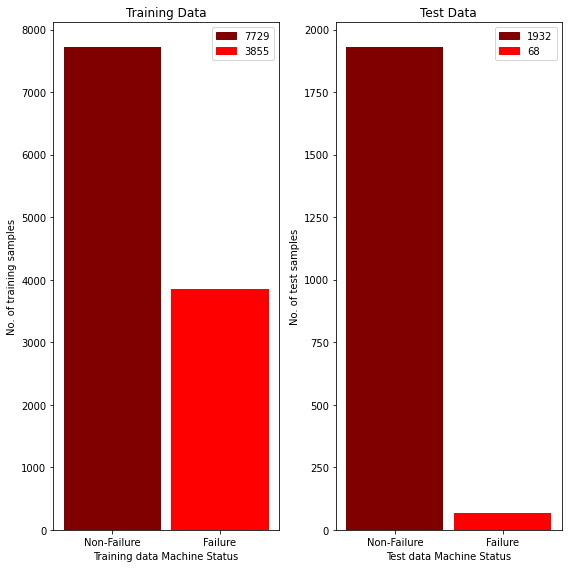

In [ ]:
plot_data_bar(Y_train, Y_test)

## SMOTE

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data in training and validation dataset
X_train, X_test, Y_train, Y_test = train_test_split(x_all,y_all, train_size=0.8, random_state=13, stratify=y_all)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train, Y_train = smote.fit_resample(X_train, Y_train)

Y_train.value_counts()

0    7729
1    7729
Name: Machine failure, dtype: int64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

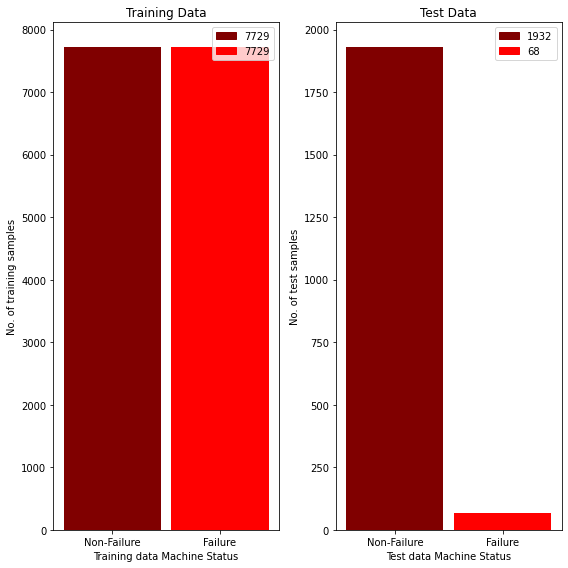

In [ ]:
plot_data_bar(Y_train, Y_test)

# Linear SVM

## SVM Model

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
import time


model = LinearSVC()
print('Training Support Vector Machine with {} data'.format(len(X_train)))
start = time.time()
model.fit(X_train,Y_train)
end = time.time()
print("Training Over in: ", end-start)

Training Support Vector Machine with 15458 data
Training Over in:  0.9654486179351807


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## Linear SVM Model Statistical Analysis

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(testLabels,testPred,title):
    cm = confusion_matrix(testLabels,testPred)
    cm_df = pd.DataFrame(cm,
                         index = ['Non-Failure','Failure'], 
                         columns = ['Non-Failure','Failure'])
    sns.heatmap(cm_df, annot=True, fmt="d", cmap = "Reds")
    plt.title(title)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.savefig('Confusion_Matrix')
    plt.show()

Classification Report for Linear SVM model


              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1932
           1       0.13      0.81      0.23        68

    accuracy                           0.81      2000
   macro avg       0.56      0.81      0.56      2000
weighted avg       0.96      0.81      0.87      2000

recall: 0.8088235294117647 
precision: 0.13095238095238096 
f1: 0.2254098360655738


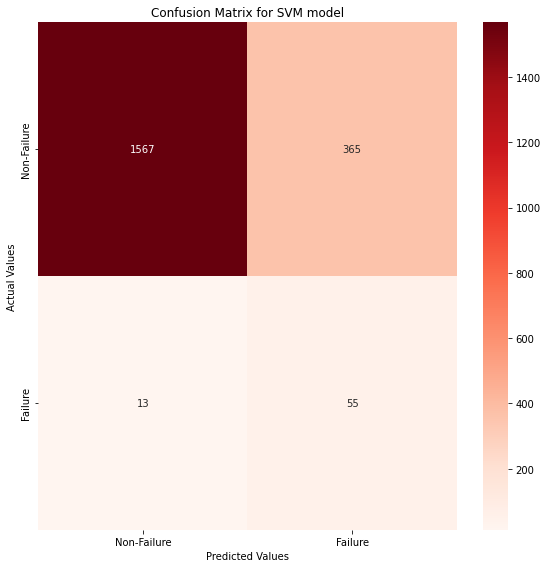

In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

Y_testpred = model.predict(X_test)

print("Classification Report for Linear SVM model\n\n")
print(classification_report(Y_test,Y_testpred))

recall = recall_score(Y_test,Y_testpred)
precision = precision_score(Y_test,Y_testpred)
f1 = f1_score(Y_test,Y_testpred) 

print('recall:', recall, '\nprecision:', precision, '\nf1:',f1)

plot_confusion_matrix(Y_test,Y_testpred,"Confusion Matrix for SVM model")


# Multi Layer Perceptron (MLP)

## MLP Model

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_84 (Dense)            (None, 64)                576       
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_85 (Dense)            (None, 32)                2080      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_86 (Dense)            (None, 16)                528       
                                                                 
 dropout_18 (Dropout)        (None, 16)                0  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


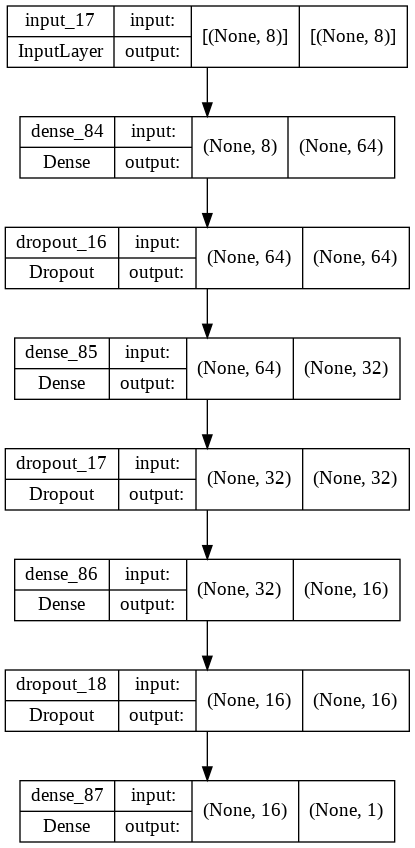

In [ ]:
from keras.datasets import mnist
import visualkeras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, LeakyReLU, Reshape, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils



def mlp_arch():

  # set the precision for the network
  tf.keras.backend.set_floatx('float64')
  
  # specify metrics to use
  recall = tf.keras.metrics.Recall()
  
  # precision = tf.keras.metrics.Precision()
  fp = tf.keras.metrics.FalsePositives()
  
  inp = Input(shape=(8,))
  x = Dense(64, activation='relu')(inp)
  x = Dropout(0.5)(x)
  x = Dense(32, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(16, activation='relu')(x)
  x = Dropout(0.5)(x)
  
  op = Dense(1, activation="sigmoid")(x)
  
  model = Model(inp, op)
  model.compile(
      optimizer = Adam(lr=0.0002, beta_1=0.5),
      loss="binary_crossentropy",
      metrics=['accuracy', recall, fp])
    
  return model

mlp_model = mlp_arch()
mlp_model.summary()

utils.plot_model(mlp_model, show_shapes=True, to_file="mlp_model.png")

#visualkeras.layered_view(mlp_model) 

## MLP Model Training

In [ ]:
Y_train_MLP = Y_train.values.reshape(len(Y_train), 1)

Y_test_MLP = Y_test.values.reshape(len(Y_test), 1)

train_data = (X_train, Y_train_MLP)

valid_data = (X_test, Y_test_MLP)

In [ ]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from tensorflow.keras.callbacks import 
from tqdm import tqdm

# set early stopping criterian
es = EarlyStopping(monitor='val_recall_4', mode='max', 
                   verbose=1, patience=1500)


#mlp_model.fit(train_data, epochs = 80, validation_data=valid_data)

start = time.time()

#tqdm(mlp_model.fit(X_train, Y_train_MLP, epochs=100, validation_split=0.1))

# train the model
history = mlp_model.fit(X_train, Y_train_MLP,
                        epochs=3000,
                        batch_size=64,
                        verbose=0, 
#                       #class_weight={0:0.2, 1:0.8},
                        workers=20,
                        validation_split=0.1,
                        callbacks=[es]
                 )

end = time.time()

print("Training Over in: ", end-start)

Epoch 1721: early stopping
Training Over in:  1204.8329660892487


In [ ]:
mlp_model.save('/content/drive/My Drive/mlp_model_1004_gan_2000_5108.h5')

## MLP Model Statistical Analysis

In [ ]:
import tensorflow as tf

#load the model

mlp_model = tf.keras.models.load_model('/content/drive/My Drive/mlp_model_1004_gan_2000_5108.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(testLabels,testPred,title):
    cm = confusion_matrix(testLabels,testPred)
    cm_df = pd.DataFrame(cm,
                         index = ['Non-Failure','Failure'], 
                         columns = ['Non-Failure','Failure'])
    sns.heatmap(cm_df, annot=True, fmt="d", cmap = "Reds")
    plt.title(title)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.savefig('Confusion_Matrix')
    plt.show()

Classification Report for MLP model Validation Data


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.81      0.68      0.74        68

    accuracy                           0.98      2000
   macro avg       0.90      0.84      0.86      2000
weighted avg       0.98      0.98      0.98      2000

recall: 0.6764705882352942 
precision: 0.8070175438596491 
f1: 0.736


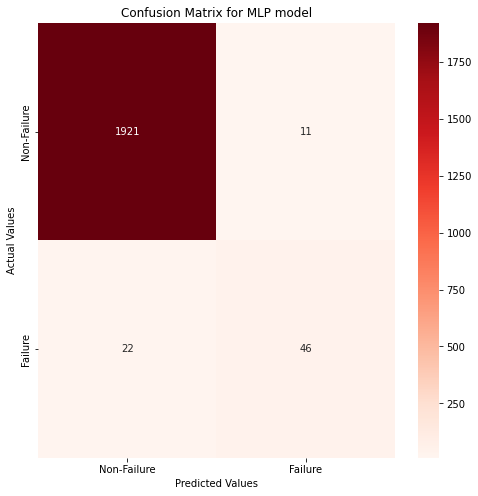

In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

Y_predict = mlp_model.predict(X_test)
Y_predict = Y_predict.reshape(len(Y_predict))
Y_predict = (Y_predict >= 0.5).astype("float")

print("Classification Report for MLP model Validation Data\n\n")
print(classification_report(Y_test_MLP,Y_predict))

recall = recall_score(Y_test_MLP,Y_predict)
precision = precision_score(Y_test_MLP,Y_predict)
f1 = f1_score(Y_test_MLP,Y_predict) 

print('recall:', recall, '\nprecision:', precision, '\nf1:',f1)

plot_confusion_matrix(Y_test,Y_predict,"Confusion Matrix for MLP model")

In [ ]:
mlp_model.evaluate(X_test, Y_test_MLP)

63/63 [==============================] - 1s 4ms/step - loss: 0.0631 - accuracy: 0.9835 - recall_4: 0.6765 - false_positives_4: 11.0000


[0.06308554090559483, 0.9835, 0.6764705882352942, 11.0]

In [ ]:
# evaluate
_, _, tr_recall, tr_fp = mlp_model.evaluate(X_train, Y_train_MLP, verbose=0)
_, _, test_recall, test_fp = mlp_model.evaluate(X_test, Y_test_MLP, verbose=0)
print('Train_recall: %.3f, Test_recall: %.3f' % (tr_recall, test_recall))
print('Train_fp: %.3f, Test_fp: %.3f' % (tr_fp, test_fp))

Train_recall: 0.978, Test_recall: 0.676
Train_fp: 34.000, Test_fp: 11.000


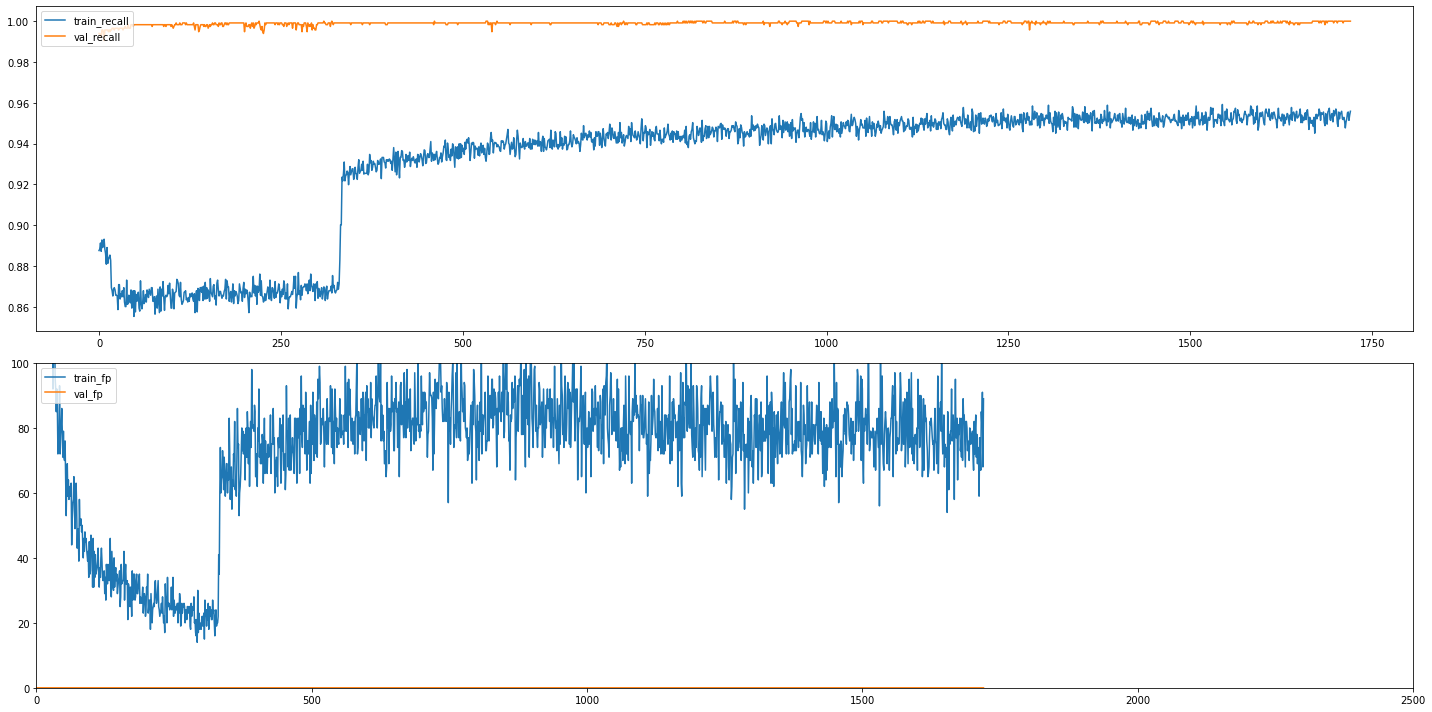

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 20, 10


# plot training and validation history
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(history.history['recall_4'], label='train_recall')
ax1.plot(history.history['val_recall_4'], label='val_recall')
ax2.plot(history.history['false_positives_4'], label='train_fp')
ax2.plot(history.history['val_false_positives_4'], label='val_fp')

ax2.set_xlim([0, 2500])
ax2.set_ylim([0, 100])

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.tight_layout();

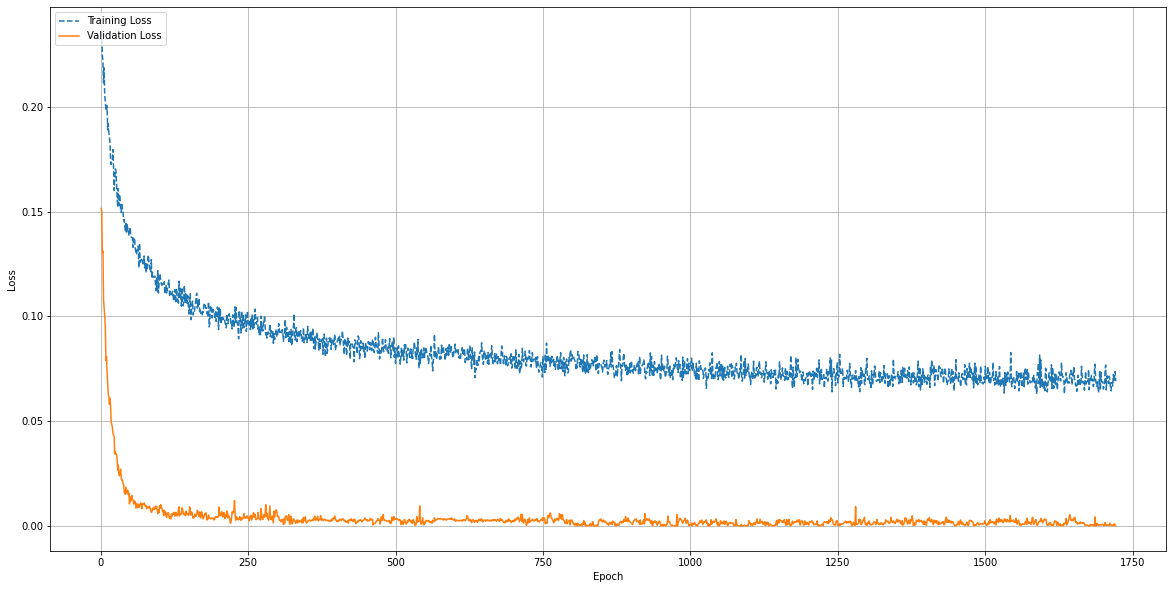

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
valid_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, '--')
plt.plot(epoch_count, valid_loss, '-')
plt.grid()
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

No Skill: ROC AUC=0.500
MLP: ROC AUC=0.970


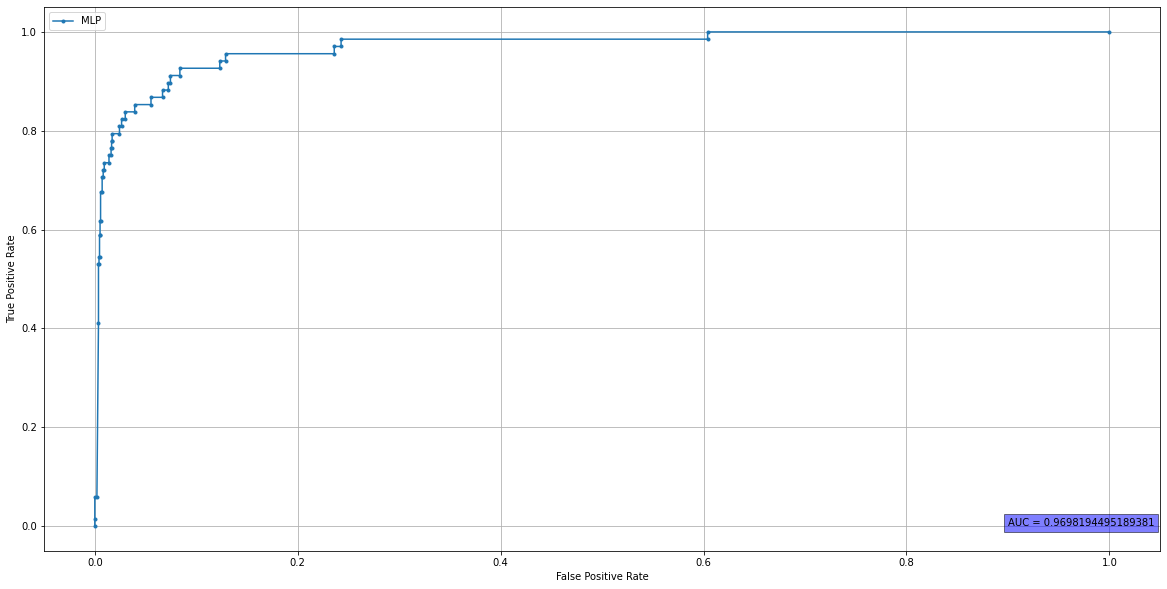

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test_MLP))]

# predict probabilities
lr_probs = mlp_model.predict(X_test)

# keep probabilities for the positive outcome only
#lr_probs = lr_probs[lr_probs>=0.5]

# calculate scores
ns_auc = roc_auc_score(Y_test_MLP, ns_probs)
lr_auc = roc_auc_score(Y_test_MLP, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test_MLP, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_MLP, lr_probs)

# plot the roc curve for the model
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

s = 'AUC = ' + str(lr_auc)

pyplot.text(0.9, 0, s, bbox=dict(facecolor='blue', alpha=0.5))

pyplot.grid()

# show the legend
pyplot.legend(loc='upper left')
# show the plot
pyplot.show()